# Introduction
Hello. This is the notebook I developed for my entry in the Kaggle Titanic competition. Being relatively new to machine learning and to Kaggle, I thought it might be useful to capture my thought processes as I worked through the exercise. 

For some initial guidance, naurally I followed the [Titanic tutorial](https://www.kaggle.com/code/alexisbcook/titanic-tutorial) (by Alexis Cook) available on Kaggle . In addition I also found a useful reference in the book [The Art of Statistics: Learning from Data](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y) by David Spiegelhalter (Penguin Books, 2019). Here, Chapter 6 "Algorithms, Analytics and Prediction" actually makes reference to the Kaggle Titanic competiton, and describes many of the concepts that may be used to approach the problem. Highly recommended reading should you wish to understand more about the topic!

Other book references that I found useful are: [Python for Data Analysis](https://www.google.co.uk/books/edition/Python_for_Data_Analysis/BCc3DwAAQBAJ?hl=en&gbpv=0) by Wes McKinney (Published by O'Reilly 2nd Edition 2017), [Python Data Science Handbook](https://www.google.co.uk/books/edition/Python_Data_Science_Handbook/6omNDQAAQBAJ?hl=en&gbpv=0) by Jake VanderPlas (Published by O'Reilly 2016) and [Practical Statistics for Data Scientists](https://www.google.co.uk/books/edition/Practical_Statistics_for_Data_Scientists/k2XcDwAAQBAJ?hl=en&gbpv=0) by Peter Bruce, Andrew Bruce & Peter Gedeck (Published by O'Reilly 2nd Edition 2020). And when occasionally I felt like a good cry in the corner, the academic tome [Probabilistic Machine Learning: An Introduction](https://www.google.co.uk/books/edition/Probabilistic_Machine_Learning/wrZNEAAAQBAJ?hl=en&gbpv=0) by Kevin P. Murphy (Published by The MIT Press 2022) brought tears to my eyes!

Important Note: the links to the book references above simply point to "Google Books" entries for each book. They are NOT intended as "click bait". I do not earn any commission!

Aside from these references I also made frequent use of Google's Gemini to ask questions and get clarification on certain topics, such as explanations for modelling concepts and occasional checks on my Python code and syntax. A very handy tool to have by your side as you work through the problem! I also refered to several articles on [Medium](https://medium.com/) for additonal background about certain subject areas.

In terms of content and the topics covered, I start by making a brief exploration of the provided training data set to assess its coverage and quality. As part of this, I derive some new features from the data table columns to further characterise the data, and perform some quick calculations on overall survival rates for a number of different categories. Next, I move on to run some baseline tests using 'simple' (trivial) models to make survival predictions. After this, I start entering the world of random forest classification models, and dive into the subject of model performance. Here, I explore the concept of the 'error matrix' and how a variety of corresonding metrics may be derived in order to assess model prediction accuracy and quality. This leads on to a detailed ('ground up') examination of how the survival 'probabilities' generated by a model may be used to develop ROC curves and associated AUC metrics. Finally, I embark on a sequence of model optimisation attempts, firstly testing out different feature combinations, then changing the hyperparameter configuration settings on the models.

As for topics *not* covered, well, where do I begin? Intentionally I kept the scope of my analyses restricted to random forest models, and even then I know that I've only scratched the surface. I did not venture into other modelling techniques, such as logistic regression, support vector machines (SVMs), neural networks, etc. I'll have to leave the exploration of those for another day.

With regard to layout and style, this notebook is intentionally verbose by nature. I'm sure that there are "quicker", "shorter", and "smarter" ways to do stuff. But that's not the point of this exercise. I'm using the opportunity to explore and play around with ideas, and it's for this reason that the notebook commentary sounds as if I'm speaking to myself, or perhaps some invisible friend is whispering in my ear! Consequently the result is that the notebook is rather lengthy. However, I've endevoured to keep the document structured (using headings) and to keep the storyline flowing. So, for the outside observer, it should be fairly "readable" (perhaps not all in one sitting?), and may I suggest even occasionally act as a useful reference for others, especially those new to machine learning like myself.

Finally, as you read through this notebook, you may take issue with some of my reasoning and / or find problems with my code. Naturally, all errors and mistakes are my own. That being said, I would welcome any feedback, and I am more than happy to answer any questions that you may have via the comments section.

As for my final score in the Titanic competition, well, let's just say "I could have done better"! For example, with the benefit of hindsight, if I had spent additional time cleaning up the data and making a more detailed assessment of feature importance, then I might have improved my chances for a higher score. But, never mind. In my view, the real benefit and reward is purely in the learning!

Happy Kaggling!

# Setup
## Default Libraries
These code in the cell below is automatically provided when you create a new notebook in Kaggle.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Other Libraries

These are additonal libraries that will be used later.

In [2]:
# Standard libraries
import matplotlib.pyplot as plt # for data visualisation plots
from matplotlib.patches import Rectangle # for adding geometrical shape (rectangle) to plots
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier from the Scikit Learn library
from sklearn.metrics import roc_curve, auc # for ROC curve plots and AUC calculation
from itertools import product # to create an iterator from a selection of python lists.
import time # to capture start and end times for certain code blocks

print ("Libraries installed successfully")

Libraries installed successfully


# Load Data

## Load Training Data

Training data has 891 rows.

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Load Test Data

Test data has 418 rows.

In [4]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Explore Data

We will run various quick checks on the test data set to gather ideas for strong feature candidates.

## Plot Helper Function

First we will define a function that can be used to generate some "quick" plots.


In [5]:
def quickplot (categories_input, data_input, title):
    # Define the plot
    plt.figure(figsize=(3,2)) # Specify a small sized plot
    plt.barh(categories_input, data_input) # Use a horizontal bar chart
    
    # Set the x-axis range. 
    min_value = 0  
    max_value = 100 # We are considering percentage totals.
    plt.xlim(min_value, max_value)  # Set the x-axis limits
    
    # Add labels and title
    plt.xlabel('Proportion Survived %')
    plt.title(title)

    # Show the plot
    plt.show()
    
    return


## Generate Quick Plots

Let's generate a bunch of plots so that we can get a feel for the data.

### Survival Rate by Gender
​
Simply look at the proportion of female and male survivors.

% of women who survived: 74.20382165605095
% of men who survived: 18.890814558058924


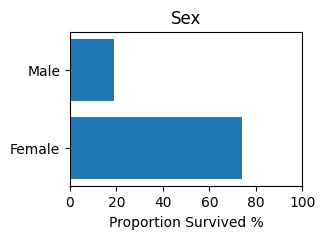

In [6]:
# Calculate the total proportion of women and men who survived

# First split the data by women and men to create a series of "Survived" values for each.
women = train_data.loc[train_data.Sex == 'female']["Survived"]
men = train_data.loc[train_data.Sex == 'male']["Survived"]

# The Survived values are boolean (0 or 1). Conveniently this allows us simply to add up 
# the values for each series to determine how many survived. 
# For example, sum(women) tells us how many women survived.
# Also we can deduce the total number of women (survived or not) simply by grabbing 
# the total length of the series using len(women).
rate_women = sum(women)/len(women) * 100 # Proportion % of women who survived
rate_men = sum(men)/len(men) * 100 # Proportion % of men who survived

print("% of women who survived:", rate_women)
print("% of men who survived:", rate_men)

# Define plot labels and data
categories = ["Female", "Male"]
data = [rate_women, rate_men]
title = 'Sex'

# Call plot function
quickplot (categories, data, title)


### Survival Rate by Passenger Ticket Class
Proportion of survivors in each passenger ticket class.

% of first class passengers who survived: 62.96296296296296
% of second class passengers who survived: 47.28260869565217
% of third class passengers who survived: 24.236252545824847


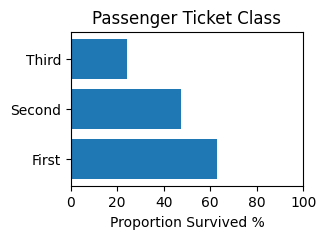

In [7]:
# This is a similar calculation as we used above.

# Calculate the proportion of survivors in each passenger ticket class
first = train_data.loc[train_data.Pclass == 1]["Survived"]
second = train_data.loc[train_data.Pclass == 2]["Survived"]
third = train_data.loc[train_data.Pclass == 3]["Survived"]

rate_first = sum(first)/len(first) * 100 # Proportion % of first class passengers who survived
rate_second = sum(second)/len(second) * 100  # Proportion % of second class passengers who survived
rate_third = sum(third)/len(third) * 100 #  Proportion % of third class passengers who survived

print("% of first class passengers who survived:", rate_first)
print("% of second class passengers who survived:", rate_second)
print("% of third class passengers who survived:", rate_third)

# Define plot labels and data
categories = ["First", "Second", "Third"]
data = [rate_first, rate_second, rate_third]
title = 'Passenger Ticket Class'

# Call plot function
quickplot (categories, data, title)


### Survival Rate by Age Group
Survival rate by age range.

Note that 20% of the training data has missing values for age. You can see this by visitng the Input tab. Select the train.csv file in the right panel, then click on the Column view. Scroll down to the # Age entry.

Our approach here requires a number of steps to transform the data before we can generate a plot. To make this instructive, the steps are divided into seperate code cells so that the output of each step can be viewed. Hopefully this makes it easier to understand how the data has been transformed at each stage.

We will start by adding a new column called "Age Group" to the training data set.

In [8]:
# For this analysis we will use a different approach.

# First we define the age ranges and corresponding labels
bins = [0, 11, 21, 31, 41, 51, 61, 71, 81, 100]  # Adjust the bins according to your desired age groups
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80', 'Unknown']

# Now add the new column. We use the pd.cut function to categorise the Age based on the Age Group bins.
train_data['Age_group'] = pd.cut(train_data['Age'], bins=bins, labels=labels, right=False)

# Note that 20% of the training data has missing values for age. So we need to categorise these to the "Unknown" Age Group.
# Here we simply replace the null Age Group values with "Unknown".
train_data['Age_group'] = train_data['Age_group'].fillna('Unknown')

# Quick check on the resulting Age Group column and corresponding Age values. Remark out if not needed.
columns = ['Age_group', 'Age']
train_data[columns].head(100)

,Age_group,Age
0,21-30,22.0
1,31-40,38.0
2,21-30,26.0
3,31-40,35.0
4,31-40,35.0
...,...,...
95,Unknown,NaN
96,71-80,71.0
97,21-30,23.0
98,31-40,34.0


Next we will attempt to group the data by Age Group and check the results.

In [9]:
# Group the data by Age Group and use the size() function to count the total records in each bin. Name the column as "Count".
grouped_data = train_data.groupby('Age_group', observed=True).size().to_frame(name='Count').reset_index()
grouped_data.head(10)

,Age_group,Count
0,0-10,64
1,11-20,116
2,21-30,231
3,31-40,155
4,41-50,84
5,51-60,42
6,61-70,18
7,71-80,4
8,Unknown,177


The output above shows us the total count of passengers in each age group, whether they survived or not. For our analysis we are interested in the proportion of survivors in each age group relative to the total number of passengers in the same age group. So we need to do some more data manipulation.

First let's modify our grouped data to differentiate between those passengers who survived and those that did not in each age group.

In [10]:
# We are interested in the proportion of survivors in each age group bin. So let's modify our code.
grouped_data = train_data.groupby(['Age_group', 'Survived'], observed=True).size().to_frame(name='Count').reset_index()
grouped_data.head(10)

,Age_group,Survived,Count
0,0-10,0,26
1,0-10,1,38
2,11-20,0,72
3,11-20,1,44
4,21-30,0,147
5,21-30,1,84
6,31-40,0,86
7,31-40,1,69
8,41-50,0,51
9,41-50,1,33


So now we have two rows for each age group. The first row counts the number of passengers who died (Survived = 0). The second row counts the number of passengers who survived (Survived = 1).

With the data is presented in this way, this is in so-called "long form". For our analysis it will be more helpful to provide the same data in so-called "short form", otherwise known as a pivot table.

Let's start building the pivot table.

In [11]:
# We will generate a pivot table to show columns for 'Survived' (0 or 1) for each age group.
pivot_table = grouped_data.pivot_table(index='Age_group', columns='Survived', values='Count', observed=True)
pivot_table.head(10)

Survived,0,1
Age_group,,
0-10,26.0,38.0
11-20,72.0,44.0
21-30,147.0,84.0
31-40,86.0,69.0
41-50,51.0,33.0
51-60,25.0,17.0
61-70,14.0,4.0
71-80,3.0,1.0
Unknown,125.0,52.0


The output table above shows our data pivoted into "short from", and it's starting to take shape. We will now do something about the column labels in the pivot table. Currently the columns are labelled "0" and "1". We should rename these for greater clarity (see note).

(Note: if we leave the column names as "0" and "1", this will give us problems later because of the way in which pandas handles string numerics in column labels).

In [12]:
# Rename the "0" and "1" columns to "Num_Died" and "Num_Survived"
pivot_table.columns = ['Num_Died', 'Num_Survived']
pivot_table.head(10)

,Num_Died,Num_Survived
Age_group,,
0-10,26.0,38.0
11-20,72.0,44.0
21-30,147.0,84.0
31-40,86.0,69.0
41-50,51.0,33.0
51-60,25.0,17.0
61-70,14.0,4.0
71-80,3.0,1.0
Unknown,125.0,52.0


Next we will add a new column to the pivot table to sum the total passengers for each age group.

In [13]:
# Add a new column to the pivot table to give us the total count for each age group
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table.head(10)

,Num_Died,Num_Survived,Total
Age_group,,,
0-10,26.0,38.0,64.0
11-20,72.0,44.0,116.0
21-30,147.0,84.0,231.0
31-40,86.0,69.0,155.0
41-50,51.0,33.0,84.0
51-60,25.0,17.0,42.0
61-70,14.0,4.0,18.0
71-80,3.0,1.0,4.0
Unknown,125.0,52.0,177.0


Our table is nearly ready. Now we will add another new column that captures the calculated survival rate for each age group. Here we make use of a convenient lamda function to perform the calculation on each row.

In [14]:
# For each row in the pivot table calculate the survival rate (= number survived / total)
# Add 'Rate' column using assign and lambda. Multiply the result by 100 to give a percentage.
pivot_table = pivot_table.assign(Rate=lambda x: x['Num_Survived'] / x['Total']*100)
pivot_table.head(10)

,Num_Died,Num_Survived,Total,Rate
Age_group,,,,
0-10,26.0,38.0,64.0,59.375000
11-20,72.0,44.0,116.0,37.931034
21-30,147.0,84.0,231.0,36.363636
31-40,86.0,69.0,155.0,44.516129
41-50,51.0,33.0,84.0,39.285714
51-60,25.0,17.0,42.0,40.476190
61-70,14.0,4.0,18.0,22.222222
71-80,3.0,1.0,4.0,25.000000
Unknown,125.0,52.0,177.0,29.378531


Finally we are ready to generate our plot.

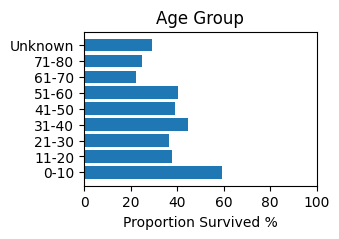

In [15]:
# Define plot labels and data
categories = pivot_table.index.tolist() # The Age_group "column" is actually the index for the pivot table
data = pivot_table['Rate'].tolist()
title = 'Age Group'

# Call plot function
quickplot (categories, data, title)

### Survival Rate by Family Size
The family size for a individual pasenger is determined by adding together the number of siblings / spouses (SibSp) onboard and the number of parents / children (Parch) onboard for that passenger. 

So, for example, if an adult passenger has a spouse and 3 children onboard, then the family size is 5 (adult + spouse + 3 children). And if we then consider this from the perspective of one of the children from the same family, then the family size is again 5. In this case the passenger is the child, and the child has 2 parents and 2 siblings (child + 2 parents + 2 siblings).

We will determine the survival rate of passengers for a range of family sizes. 

The first step is to add a new column "Family_size" to the training data set.

In [16]:
# Add a new column 'Family_size' to the training data.
train_data['Family_size'] = train_data['SibSp'] + train_data['Parch'] + 1 # We add 1 to include the passenger as well.
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-40,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,51-60,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0-10,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,21-30,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,11-20,2


Now let's check what is the maximum family size.

In [17]:
# Find the maximum Family_size
print('The maximum family size is:')
train_data['Family_size'].max()

The maximum family size is:


11

In addition, let's look at the general statisitcs for the Family_size

In [18]:
# Stats for the Family_size column
train_data['Family_size'].describe()

count    891.000000
mean       1.904602
std        1.613459
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       11.000000
Name: Family_size, dtype: float64

In the stats above, we see an average family size of around 2 (mean 1.9), and a standard deviation of 1.6. So, most family sizes are in the range 1 to 4. 

So for our analysis we will choose family size "groupings" to be:
1, 2, 3, 4, 5 and >5.

% of individual passengers who survived: 30.353817504655495
% of passengers from family size 2 who survived: 55.27950310559007
% of passengers from family size 3 who survived: 57.84313725490197
% of passengers from family size 4 who survived: 72.41379310344827
% of passengers from family size 5 who survived: 20.0
% of passengers from family size >5 who survived: 14.893617021276595


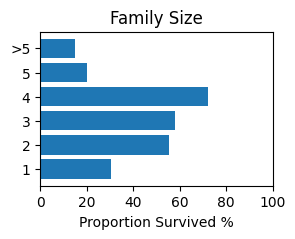

In [19]:
# We will use our earlier approach to perform this analysis

# First split the data by family size to create a series of "Survived" values for each.
one = train_data.loc[train_data.Family_size == 1]["Survived"]
two = train_data.loc[train_data.Family_size == 2]["Survived"]
three = train_data.loc[train_data.Family_size == 3]["Survived"]
four = train_data.loc[train_data.Family_size == 4]["Survived"]
five = train_data.loc[train_data.Family_size == 5]["Survived"]
more = train_data.loc[train_data.Family_size > 5]["Survived"]

# Now calcuate the proportion of passengers who survived for each family size
rate_one = sum(one)/len(one) * 100 #  Survival rate % of passengers with no other family members onboard
rate_two = sum(two)/len(two) * 100 #  Survival rate % of passengers with 1 other family member onboard
rate_three = sum(three)/len(three) * 100 #  Survival rate % of passengers with 2 other family members onboard
rate_four = sum(four)/len(four) * 100 #  Survival rate % of passengers with 3 other family members onboard
rate_five = sum(five)/len(five) * 100 #  Survival rate % of passengers with 4 other family members onboard
rate_more = sum(more)/len(more) * 100 #  Survival rate % of passengers with >4 other family members onboard

print("% of individual passengers who survived:", rate_one)
print("% of passengers from family size 2 who survived:", rate_two)
print("% of passengers from family size 3 who survived:", rate_three)
print("% of passengers from family size 4 who survived:", rate_four)
print("% of passengers from family size 5 who survived:", rate_five)
print("% of passengers from family size >5 who survived:", rate_more)

# Define plot labels and data
categories = ["1", "2", "3", "4", "5", ">5"]
data = [rate_one, rate_two, rate_three, rate_four, rate_five, rate_more]
title = 'Family Size'

# Call plot function
quickplot (categories, data, title)



### Survival Rate by Fare Paid
Intuitively an analysis of survival rates based on the ticket fare paid should yield similar results to the analysis based on passenger ticket class we performed earlier. The reasonable assumption is that the fare paid is directly related to the ticket class. A first class ticket costs considerably more than a third class ticket. 

The fare paid might also relate to the port where the passenger boarded. The [tutorial](https://www.kaggle.com/code/alexisbcook/titanic-tutorial?scriptVersionId=99170538&cellId=5) shows that there is a column for "Embarked" in the training data set. However, for the time being we will ignore this and spare ourselves the extra work here.

So, let's do some preliminary analysis.

First we will determine the average fare paid for each passenger ticket class.

In [20]:
# A quick way to do this is as follows.

# First split the data by passenger ticket class to create a series of "Fare" values for each.
fare_first = train_data.loc[train_data.Pclass == 1]["Fare"]
fare_second = train_data.loc[train_data.Pclass == 2]["Fare"]
fare_third = train_data.loc[train_data.Pclass == 3]["Fare"]

# Now to determine the distribution of fare prices for each class we can simply use describe()
fare_comparison=pd.DataFrame([fare_first.describe(), fare_second.describe(), fare_third.describe()])
fare_comparison.index = ['1st Class', '2nd Class', '3rd Class']
fare_comparison.head()

,count,mean,std,min,25%,50%,75%,max
1st Class,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2nd Class,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3rd Class,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


Taking an initial glance at the table above, we kind of see what we expected. The mean value of the fare paid by a passenger with a first class ticket is much higher than that of a second class ticket. In turn, the average fare paid by a passenger in second class is higher than the average fare paid in third class, although the difference is not as great. 

Further inpection reveals there is some overlap in fare prices paid between ticket classes, particularly between 2nd class and 3rd class. For example, the mean fare paid in 2nd class is around 20. The standard deviation is around 13. So the range of fares in 2nd class would be a low of 7 and a high of 33 for one standard deviation. In the case of 3rd class, the mean fare paid is around 13. With a standard deviation of, say, 12 then the range in 3rd class is from 1 to 25. 

Another observation is that the minimum fare paid by a passenger in each of the ticket classess is 0. Cross-checking this by going back to the training data reveals this to be true. Some passengers did not pay anything, as shown by running the code below.



In [21]:
# Passengers who did not pay any fare
no_fare_paid = train_data[(train_data['Fare'] == 0)]
no_fare_paid.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S,31-40,1
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S,31-40,1
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S,21-30,1
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S,Unknown,1
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S,11-20,1


The upshot is that trying to make a direct correlation between fare paid and passenger ticket class does not appear to be reliable based on the data presented and our cursory analysis. So we will focus purely on the fare paid, and by doing so attempt to establish whether paying more money actually increased your chances of survival?!

Let's take an overall look at the distribution of fares paid. We will generate a histogram plot.

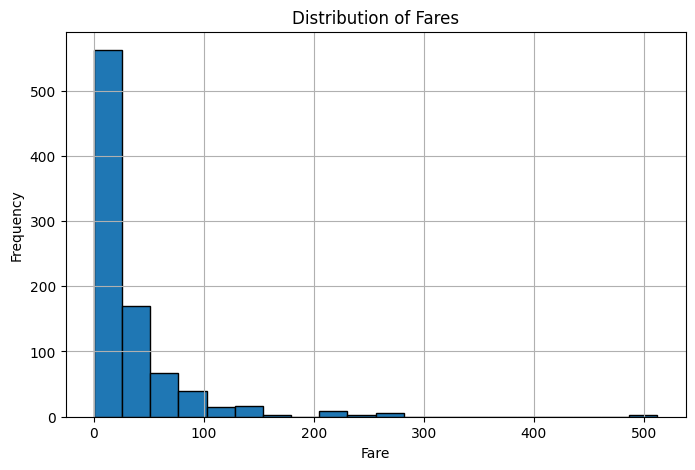

In [22]:
# Define plot size
plt.figure(figsize=(8, 5))  # Set the figure size (optional)

# Create the histogram
train_data['Fare'].plot.hist(bins=20, edgecolor='black')  # Adjust 'bins' as needed

# Customize the plot (optional)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Fares')
plt.grid(True)

# Display the plot
plt.show()

In [23]:
# Look at the stats for Fares
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

For our purposes here, we will simply divide the fares based on the quartile values shown in the table above.

To do this we follow a similar method to that used in our analysis of survival rates by age group earlier.

In [24]:
# First we define the fare ranges and corresponding labels
bins = [0, 8, 15, 30, 600]  # Roughly corresponding to quartile fare values in the table above.
labels = ['0-8', '9-15', '16-30', '>30']

# Now add a new column. We use the pd.cut function to categorise the Fare based on the Fare Group bins.
train_data['Fare_group'] = pd.cut(train_data['Fare'], bins=bins, labels=labels, right=False)

# Quick check on the resulting Age Group column and corresponding Age values. Remark out if not needed.
columns = ['Fare_group', 'Fare']
train_data[columns].head(100)

,Fare_group,Fare
0,0-8,7.2500
1,>30,71.2833
2,0-8,7.9250
3,>30,53.1000
4,9-15,8.0500
...,...,...
95,9-15,8.0500
96,>30,34.6542
97,>30,63.3583
98,16-30,23.0000


In [25]:
# Group the data by Fare Group and use the size() function to count the total records in each bin. Name the column as "Count".
grouped_fare_data = train_data.groupby('Fare_group', observed=True).size().to_frame(name='Count').reset_index()
grouped_fare_data.head(10)

,Fare_group,Count
0,0-8,241
1,9-15,216
2,16-30,194
3,>30,240


The above grouped table shows that we have roughly the same number of values in each fare group bin. This is to be expected because we defined our bin ranges guided by the quartile values we established earlier.

Now we need to find out how many passengers survived in each fare group.

In [26]:
# We are interested in the proportion of survivors in each fare group bin. So let's modify our code.
grouped_fare_data = train_data.groupby(['Fare_group', 'Survived'], observed=True).size().to_frame(name='Count').reset_index()
grouped_fare_data.head(10)

,Fare_group,Survived,Count
0,0-8,0,189
1,0-8,1,52
2,9-15,0,154
3,9-15,1,62
4,16-30,0,107
5,16-30,1,87
6,>30,0,99
7,>30,1,141


As we did earlier during the agre group analysis, we will similarly convert the above output from "long form" to "short form" using a pivot table. We will then tidy up the pivot table as required.

In [27]:
# We will generate a pivot table to show columns for 'Survived' (0 or 1) for each age group.
fare_pivot_table = grouped_fare_data.pivot_table(index='Fare_group', columns='Survived', values='Count', observed=True)
fare_pivot_table.head(10) 

# Rename the "0" and "1" columns to "Num_Died" and "Num_Survived"
fare_pivot_table.columns = ['Num_Died', 'Num_Survived']
fare_pivot_table.head(10)

# Add a new column to the pivot table to give us the total count for each fare group
fare_pivot_table['Total'] = fare_pivot_table.sum(axis=1)
fare_pivot_table.head(10)

# For each row in the pivot table calculate the survival rate (= number survived / total)
# Add 'Rate' column using assign and lambda. Multiply the result by 100 to give a percentage.
fare_pivot_table = fare_pivot_table.assign(Rate=lambda x: x['Num_Survived'] / x['Total']*100)
fare_pivot_table.head(10)

,Num_Died,Num_Survived,Total,Rate
Fare_group,,,,
0-8,189.0,52.0,241.0,21.576763
9-15,154.0,62.0,216.0,28.703704
16-30,107.0,87.0,194.0,44.845361
>30,99.0,141.0,240.0,58.750000


Now we are ready to generate our plot.

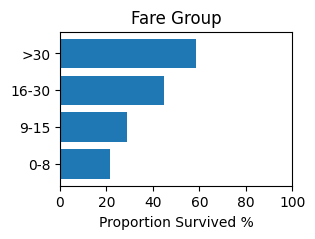

In [28]:
# Define plot labels and data
categories = fare_pivot_table.index.tolist() # The Fare_group "column" is actually the index for the pivot table
data = fare_pivot_table['Rate'].tolist()
title = 'Fare Group'

# Call plot function
quickplot (categories, data, title)

### Survival Rate by Title
We will now consider whether a passenger's title (eg, Mr., Mrs., Miss., Lady, Major, Dr., etc) had any bearing on survival rate. Again we will need to some data preparation. The main task will be to extract and normlise each passenger's title from the Name column, and then to categorise these for analysis of survival rates.

First we will set about creating a new column to house each passenger's title.

In [29]:
# Let's assess how the title is formatted in the existing Name column
train_data['Name'].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

The output above suggests that the name format begins with surname then title. after which the first names are given. Hopefully this is consistent through all of the data. We shall check.

In [30]:
# We will create a new column called "Title" in the training data set
# Use the str.split() method to convert each name to a list of words.
# Then grab the word at index position [1], which is the second word in the string.
train_data['Title'] = train_data.Name.str.split().str[1]
train_data['Title'].head(10)

# Now we will remove the "." from the end of each title (eg "Mrs." becomes "Mrs")
for i in range(len(train_data)):
    if train_data.loc[i, 'Title'].split()[0][-1] == '.':
        train_data.loc[i, 'Title'] = train_data.loc[i, 'Title'].split()[0][:-1] # Slice all characters except the last one
        
train_data['Title'].head(10)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

We will now do a few more checks.

In [31]:
# Check unique titles
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Planke,', 'Don', 'Rev',
       'Billiard,', 'der', 'Walle,', 'Dr', 'Pelsmaeker,', 'Mulder,', 'y',
       'Steen,', 'Carlo,', 'Mme', 'Impe,', 'Ms', 'Major', 'Gordon,',
       'Messemaeker,', 'Mlle', 'Col', 'Capt', 'Velde,', 'the', 'Shawah,',
       'Jonkheer', 'Melkebeke,', 'Cruyssen,'], dtype=object)

We see above that there are some strange values in the titles. For example: 'Velde,'. Running a quick check below the issue becomes clear. The title is not necessarily the second word in the name string. So we need to modify our code.

In [32]:
check = train_data.query ("Title == 'Velde,'")[['Name', 'Title']]
print(check)

                                 Name   Title
752  Vande Velde, Mr. Johannes Joseph  Velde,


In [33]:
# Modify how extract the Title from the Name string
# Our new strategy will be to find the index location of the first comma (,) in the Name string, 
# then grab the following word (ie, the title), which happens to occur just before the first full stop (.) in the Name string.

for i in range(len(train_data)):
    idx_1 = train_data.loc[i,'Name'].find(',') # find the index of the first comma (",") in the Name string
    idx_2 = train_data.loc[i,'Name'].find('.') # find the index of the first full stop (".") in the Name string
    if idx_2 > idx_1: # which should be the case for all of the Name data
        train_data.loc[i,'Title'] = train_data.loc[i,'Name'][idx_1+1:idx_2].strip() # Slice the string and strip any whitespace

train_data['Title'].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

In [34]:
# Check unique titles again
train_data['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

Our values for title are now looking better. Let's just check for missing values in the Title column.

In [35]:
# Test if Title is null for each row, then return unique results for the column.
# If no missing values then only False is returned. 
train_data['Title'].isnull().unique()

array([False])

At this stage we have a bit more work to do. We need to normalise some of the titles. We will do this by creating another new column to group the various titles.

In [36]:
# Normalise Titles using a new column called Title_group

for i in range(len(train_data)):
    if train_data.loc[i,'Title'] == 'Mr':
        train_data.loc[i,'Title_group'] = 'Mr'  
    elif train_data.loc[i,'Title'] == 'Master':
        train_data.loc[i,'Title_group'] = 'Master'
    elif train_data.loc[i,'Title'] in ('Mrs','Mme'):
        train_data.loc[i,'Title_group'] = 'Mrs'
    elif train_data.loc[i,'Title'] in ('Miss','Mlle', 'Ms'):
        train_data.loc[i,'Title_group'] = 'Miss'
    else:
        train_data.loc[i,'Title_group'] = 'Rare Title'
        
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30,2,0-8,Mr,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40,2,>30,Mrs,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30,1,0-8,Miss,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40,2,>30,Mrs,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-40,1,9-15,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21-30,1,9-15,Rev,Rare Title
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,11-20,1,>30,Miss,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Unknown,4,16-30,Miss,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21-30,1,>30,Mr,Mr


We are now ready to analyse the survival rates by "normalised" titles.

% of passengers with title 'Mr' who survived: 15.667311411992262
% of passengers with title 'Mrs' who survived: 79.36507936507937
% of passengers with title 'Master' who survived: 57.49999999999999
% of passengers with title 'Miss' who survived: 70.27027027027027
% of passengers with Rare Title who survived: 34.78260869565217


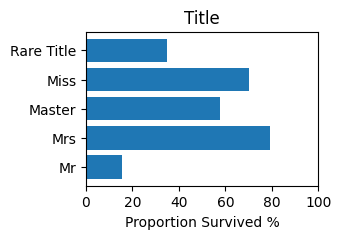

In [37]:
# First split the data by title group to create a series of "Survived" values for each.
mr = train_data.loc[train_data.Title_group == 'Mr']["Survived"]
mrs = train_data.loc[train_data.Title_group == 'Mrs']["Survived"]
master = train_data.loc[train_data.Title_group == 'Master']["Survived"]
miss = train_data.loc[train_data.Title_group == 'Miss']["Survived"]
rare = train_data.loc[train_data.Title_group == 'Rare Title']["Survived"]

# Now calcuate the proportion of passengers who survived for each title group
rate_mr = sum(mr)/len(mr) * 100 #  Survival rate % of passengers with title "Mr".
rate_mrs = sum(mrs)/len(mrs) * 100 #  Survival rate % of passengers with title "Mrs".
rate_master = sum(master)/len(master) * 100 #  Survival rate % of passengers with title "Master".
rate_miss = sum(miss)/len(miss) * 100 #  Survival rate % of passengers with title "Miss".
rate_rare = sum(rare)/len(rare) * 100 #  Survival rate % of passengers with a Rare Title.

print("% of passengers with title 'Mr' who survived:", rate_mr)
print("% of passengers with title 'Mrs' who survived:", rate_mrs)
print("% of passengers with title 'Master' who survived:", rate_master)
print("% of passengers with title 'Miss' who survived:", rate_miss)
print("% of passengers with Rare Title who survived:", rate_rare)

# Define plot labels and data
categories = ["Mr", "Mrs", "Master", "Miss", "Rare Title"]
data = [rate_mr, rate_mrs, rate_master, rate_miss, rate_rare]
title = 'Title'

# Call plot function
quickplot (categories, data, title)

### Survival Rate by "Women and Children First"

We will now perform one final analysis before moving on. Here we consider whether a simple premise of "women and children first" (in terms of evacuating the ship) might be a factor in survival rates.

So, we will need to assign each passenger as being "a woman or a child" or "a man". We will add a new column (IsWoCh) with a simple boolean value to indicate this. Firstly, though, we need to establish the maximum age for a child. While we could assume the age of 18 years old (which is the current "age of majority" in many countries), let's see what the training data tells us.

In [38]:
# Use the Title_group column to find the minimum and maximum ages of passengers in each group.
title_age_range = train_data.groupby(['Title_group'])['Age'].agg(['min', 'max']) # Use the agg() method to run min and max functions simultaneously
title_age_range

,min,max
Title_group,,
Master,0.42,12.0
Miss,0.75,63.0
Mr,11.00,80.0
Mrs,14.00,63.0
Rare Title,23.00,70.0


The output table above is interesting. The min and max values for "Master" seem reasonable. Yet, for "Miss" we have a maximum age of 63. Presumably the title "Miss" still holds true for an unmarried woman "of a certain age"!

We also see a minimum age for the "Mr" group as 11 years old. Perhaps this should have been registered as "Master"? Also we have a minimum for "Mrs" at age 14? Let's run a quick check on passengers aged 14 to see.

In [39]:
train_data.query("Age == 14")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,11-20,2,>30,Mrs,Mrs
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S,11-20,1,0-8,Miss,Miss
39,40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C,11-20,2,9-15,Miss,Miss
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S,11-20,4,>30,Miss,Miss
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S,11-20,8,>30,Mr,Mr
686,687,0,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,11-20,6,>30,Mr,Mr


The output above shows that we do indeed have a female passenger aged 14 who is married (title is Mrs.).

Let's also check passengers aged 11 years old.

In [40]:
train_data.query("Age == 11")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,11-20,8,>30,Master,Master
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S,11-20,7,>30,Miss,Miss
731,732,0,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,11-20,1,16-30,Mr,Mr
802,803,1,1,"Carter, Master. William Thornton II",male,11.0,1,2,113760,120.0000,B96 B98,S,11-20,4,>30,Master,Master


Again we see a young gentleman aged 11 with the title "Mr".

So what does this tell us? Simply that using Title is not a reliable way to check whether a passenger is a child. We will have to consider the Age column directly. In doing so, we need to assign our own definition for the maximum age of a child. Earlier we suggested using the current "age of majority", which is 18 years old in many countries nowadays. However, back in the times of the Titanic disaster (the year 1912), things were different. For example, the age of majority in England and Wales at this time was 21 years old, while in Scotland it seems that the age of majority for females was lower, at 14 if married and 16 if single (although this needs further verification). And then there's the question of what other countries defined the age of majority at this time, given that we seem to have passengers from various countries onboard (although the data does not provide this information directly).

For our purposes here, we'll just make the simple assumption that the age of majority was 21 years old. Above this age, a passenger will be classifed as an adult. This seems straight forward, however we do have an issue in that some passenger ages are unknown (20% of the data) as we established earlier in our age group analysis. Let's check these records.

In [41]:
# Passnengers with missing age values
train_data[pd.isnull(train_data.Age)] # use pd.isnull() method

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown,1,9-15,Mr,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Unknown,1,9-15,Mr,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Unknown,1,0-8,Mrs,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Unknown,1,0-8,Mr,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Unknown,1,0-8,Miss,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Unknown,1,0-8,Mr,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Miss,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Unknown,1,9-15,Mr,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Unknown,1,0-8,Mr,Mr


The above table shows that there are 177 passengers in the training data set with missing age values. Maybe there is a way to "guess" whether the age is likely to be above or below 21 years old? We shall see in a moment.

However, before we get to work on that, there is one row here (index number 863) that warrants some further investigation. A certain Miss Dolly Sage (of unknown age) is a member of a family size of 11 passengers onboard. The fare paid by Miss Sage was 69.55, and that was for a ticket in 3rd Class?? That does not feel right, given that the average price for a 3rd Class Ticket was of the order of 13.7 (as we discovered in our earlier analysis of fare paid). 

Let's try to find the other members of Dolly's family. A reasonable search might be on fare paid (69.55) or by family size (11).

In [42]:
# Find Dolly's family
# train_data.query("Fare == 69.55") # This works
# train_data.query("SibSp == 8") # So does this
train_data.query("Family_size == 11") # And this

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S,Unknown,11,>30,Master,Master
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S,Unknown,11,>30,Miss,Miss
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S,Unknown,11,>30,Mr,Mr
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S,Unknown,11,>30,Mr,Mr
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S,Unknown,11,>30,Miss,Miss
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S,Unknown,11,>30,Mr,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S,Unknown,11,>30,Miss,Miss


So our large family onboard are "the Sages". And we see that in the training data set there are records for 7 of the family members. Presumably the records for the other 4 members are in the test data set (and, indeed, a quick check below confirms this).

All family members here are in 3rd Class. And all paid the extortionate amount of 69.55 for a ticket!! Here it seems more likely that the 69.55 fare was for ALL of the family members, which would equate to 69.55 / 11 = 6.32 per ticket. That seems more reasonable. 

Consequently, this finding has rather scuppered (no pun intended!) our earlier analysis of fare paid. Perhaps we should have adjusted (corrected) the values for the Sage family before generating our categorisation plot? At the same time it does call into question whether there are other "hidden" anomalies with the records for fares, or indeed other records? 

And now the question is what to do about it? It may be fine to adjust the records in the training data, but what happens when it comes to the test data set? Do we correct these values as well? Or, is there a smarter way to deal with these anomalies? We will consdier this later, once we have completed our initial exploration of the training data set.

In [43]:
# Check for Sage family members in the TEST data set
test_data.query("Fare ==69.55")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
188,1080,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
342,1234,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
360,1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S
365,1257,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S


So let's get back to our "women and children" classification. Our immediate problem with missing age values remains. Our strategy is to try and guess whether these passengers are over the age of 21.

In [44]:
# Passengers with missing age values
train_missing_age = train_data[pd.isnull(train_data.Age)] # Create a new dataframe for experimentation purposes.
train_missing_age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown,1,9-15,Mr,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Unknown,1,9-15,Mr,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Unknown,1,0-8,Mrs,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Unknown,1,0-8,Mr,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Unknown,1,0-8,Miss,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Unknown,1,0-8,Mr,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Miss,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Unknown,1,9-15,Mr,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,Unknown,1,0-8,Mr,Mr


In [45]:
# Check on likely candidates for being under 21 years old
train_missing_age.query("Title_group in ('Master', 'Miss')")

# We are trying to find clues for determining age

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Unknown,1,0-8,Miss,Miss
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Unknown,1,0-8,Miss,Miss
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,Unknown,1,0-8,Miss,Miss
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Unknown,3,16-30,Master,Master
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,Unknown,1,0-8,Miss,Miss
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,Unknown,2,16-30,Miss,Miss
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Unknown,3,16-30,Miss,Miss
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Master,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Unknown,5,16-30,Master,Master
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Miss,Miss


Our list of "Masters" and "Miss-es" does not reveal anything obvious that applies to all of the records. However, there are some indicators for a selection of the records. For example, those belonging to a family onboard, as shown below.

In [46]:
# Check on likely candidates for being under 21 years old. Those belonging to families onboard.
train_missing_age.query("Title_group in ('Master', 'Miss') and Family_size > 1")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Unknown,3,16-30,Master,Master
109,110,1,3,"Moran, Miss. Bertha",female,NaN,1,0,371110,24.1500,NaN,Q,Unknown,2,16-30,Miss,Miss
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C,Unknown,3,16-30,Miss,Miss
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Master,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Unknown,5,16-30,Master,Master
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Miss,Miss
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,Unknown,5,16-30,Miss,Miss
240,241,0,3,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,Unknown,2,9-15,Miss,Miss
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q,Unknown,2,16-30,Miss,Miss
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q,Unknown,3,16-30,Miss,Miss


Looking at the filtered records above, we can see members of the Lefebre family here. Let's hone in.

In [47]:
# The Lefebre family
train_missing_age.query("Name.str.startswith ('Lefebre')")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Unknown,5,16-30,Master,Master
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S,Unknown,5,16-30,Miss,Miss
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S,Unknown,5,16-30,Miss,Miss
485,486,0,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S,Unknown,5,16-30,Miss,Miss


There should be 5 Lefebre family members onboard in total. So the remaining member must be in the test data set (as confirmed below).

In [48]:
# The Lefebre family
test_data.query("Name.str.startswith ('Lefebre')")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
132,1024,3,"Lefebre, Mrs. Frank (Frances)",female,NaN,0,4,4133,25.4667,NaN,S


So for the Lefebre family we see that the record for Mrs. Lefebre (in the test data) shows that she has 4 parents and/or children (Parch) onboard. And the records for the other family members (1 Master, 3 Miss-es) show that they each have 3 siblings and/or spouses (SibSp) and 1 parent and/or child (Parch). Resolving this it is clear that Mrs. Lefebre has 4 children onboard. Other possible interpretations do not make sense (eg, Mrs. Lefebre having 4 parents!).

Anyway. The point here is that we can make the reasonable guess that the 4 children are likely to be under 21 years old. And that Mrs. Lefebre is likely to be over 21 years old (though we cannot be certain!).

And by the same analysis of the other family groups with missing age records, we might be able to deduce a similar result as well?

Now what about the single "possibly young" travellers with missing age records? Those with no other family members onboard.

In [49]:
# Check on likely candidates for being under 21 years old. Those with no family members onboard.
train_missing_age.query("Title_group in ('Master', 'Miss') and Family_size == 1")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Unknown,1,0-8,Miss,Miss
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,Unknown,1,0-8,Miss,Miss
47,48,1,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,Unknown,1,0-8,Miss,Miss
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q,Unknown,1,0-8,Miss,Miss
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.7500,NaN,Q,Unknown,1,0-8,Miss,Miss
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.5500,NaN,S,Unknown,1,0-8,Miss,Miss
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,NaN,Q,Unknown,1,0-8,Miss,Miss
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,NaN,Q,Unknown,1,0-8,Miss,Miss
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q,Unknown,1,0-8,Miss,Miss
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q,Unknown,1,9-15,Miss,Miss


Well. For the passengers above, there's no way of determining whether they might be under 21 years old or not. It so happens that all of the passengers listed above are female. And the term "Miss" may be applied equally to both young females and adult (unmarried) females. So we simply have no way of knowing for sure. Nevertheless, given that these passengers are travelling "alone" (although some might be travelling with friends or companions), it might seem reasonable to assume they are, say, at least 16 years old? 

With all that said, however, let's just take a step back for a moment. We are trying to determine survival rates based on the premise of "women and children first". So, in the case of females, it actually doen't matter what age they are. All females belong to the category "women and children" by default. It's the men that are the problem!

So let's focus on the male passengers with missing age records.

In [50]:
# Males with missing age records
train_missing_age.query("Sex =='male'") 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Unknown,1,9-15,Mr,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Unknown,1,9-15,Mr,Mr
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Unknown,1,0-8,Mr,Mr
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S,Unknown,1,0-8,Mr,Mr
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,Unknown,1,0-8,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C,Unknown,1,16-30,Mr,Mr
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Mr,Mr
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,Unknown,1,0-8,Mr,Mr
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,Unknown,1,9-15,Mr,Mr


We have 124 males with missing age records. Of these, how many have other family members onboard?

In [51]:
# Males with missing age records with other family members onboard
train_missing_age.query("Sex =='male' and Family_size>1") 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group
46,47,0,3,"Lennon, Mr. Denis",male,NaN,1,0,370371,15.5000,NaN,Q,Unknown,2,16-30,Mr,Mr
48,49,0,3,"Samaan, Mr. Youssef",male,NaN,2,0,2662,21.6792,NaN,C,Unknown,3,16-30,Mr,Mr
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Unknown,3,16-30,Master,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Master,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Unknown,5,16-30,Master,Master
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Mr,Mr
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,Unknown,2,0-8,Mr,Mr
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q,Unknown,3,16-30,Mr,Mr
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Unknown,11,>30,Mr,Mr
364,365,0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q,Unknown,2,16-30,Mr,Mr


Looking at the table above, it might be possible to squeeze out a few good guesses on ages (ie, less than 21). The "Masters" are probably under 21. For the "Misters" (Mr), we could go into further detail to look at their respective siblings / spouses. But that would take quite some effort.

Suffice to say that for our immediate practical purposes here we will simply exclude the male passengers that do not have age records.

So here we go.

In [52]:
# Classify passengers based on as being "a female or a child" or "a male above 21 years old"
for i in range(len(train_data)):
    if train_data.loc[i,'Sex'] == 'female': # All females
        train_data.loc[i,'IsWoCh'] = True
    else:
        if train_data.loc[i,'Sex'] == 'male' and train_data.loc[i,'Age'] <= 21: # All males up to age 21
            train_data.loc[i,'IsWoCh'] = True
        elif train_data.loc[i,'Sex'] == 'male' and train_data.loc[i,'Age'] > 21: # All males over age 21
            train_data.loc[i,'IsWoCh'] = False    

# Where Male Age values are missing then the IsWoCh column will also contain a corrresponding missing value.
# So let's explicitly handle the missing values
train_data['IsWoCh'] = train_data['IsWoCh'].fillna('Unknown')

train_data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group,Family_size,Fare_group,Title,Title_group,IsWoCh
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30,2,0-8,Mr,Mr,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,31-40,2,>30,Mrs,Mrs,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30,1,0-8,Miss,Miss,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,31-40,2,>30,Mrs,Mrs,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,31-40,1,9-15,Mr,Mr,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,21-30,1,9-15,Rev,Rare Title,False
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,11-20,1,>30,Miss,Miss,True
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Unknown,4,16-30,Miss,Miss,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,21-30,1,>30,Mr,Mr,False


In [53]:
# Check the counts in the IsWoCh column
train_data.groupby(['Sex','IsWoCh'], observed=True).size().to_frame(name='Count')

Count
Sex    IsWoCh        
female True       314
male   False      333
       True       120
       Unknown    124

We can cross check these counts by running each of the lines in the cell below.

In [54]:
# Total females in training data should be 314 according to table above
print(len(train_data.query("Sex == 'female'")))

# Total males with ages > 21 in training data should be 333 according to table above
print(len(train_data.query("Sex == 'male' and Age >21")))

# Total males with ages <= 21 in training data should be 120 according to table above
print(len(train_data.query("Sex == 'male' and Age <=21")))

# Total males with missing age records in training data should be 124 according to table above
print(len(train_data.query("Sex == 'male' and Age.isnull()")))

314
333
120
124


Out of curiosity, we can also check the data types in the IsWoCh column. We see that if the value is True or False it is classed as a boolean, but if the value is Unknown then it is classed as a string. So we have mixture, which is probably not good practice? In future perhaps it's best to leave the missing values alone rather than replace them with a string.

In [55]:
# Check the value in the first row [0] which has a known value of False --> Type is Boolean
print(type(train_data.loc[0,'IsWoCh']))

# Check the value in the second row [1] which has a known value of True --> Type is Boolean
print(type(train_data.loc[0,'IsWoCh']))

# Check the value in the sixth row [5] which has a known value of Unknown --> Type is String
print(type(train_data.loc[5,'IsWoCh']))

<class 'bool'>
<class 'bool'>
<class 'str'>


Finally we can get ready to generate our plot.

% of women and children who survived: 60.59907834101382
% of men aged >21 who survived: 18.91891891891892
% of males with unknown ages who survived: 12.903225806451612


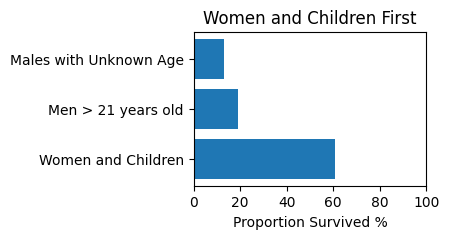

In [56]:
# First split the data by IsWoCh column to create a series of "Survived" values for each.
# We need to be explicit with the booleans because of the existence of "Unknown" strings in the column.
womch = train_data.loc[train_data.IsWoCh == True]["Survived"]
men = train_data.loc[train_data.IsWoCh == False]["Survived"]
unk = train_data.loc[train_data.IsWoCh == 'Unknown']["Survived"]

# Now calcuate the proportion of passengers who survived for group
rate_womch = sum(womch)/len(womch) * 100 #  Survival rate % of passengers who are women or children
rate_men = sum(men)/len(men) * 100 #  Survival rate % of passengers who are men aged >21
rate_unk = sum(unk)/len(unk) * 100 #  Survival rate % of passengers who are males with unknown ages

print("% of women and children who survived:", rate_womch)
print("% of men aged >21 who survived:", rate_men)
print("% of males with unknown ages who survived:", rate_unk)

# Define plot labels and data
categories = ["Women and Children", "Men > 21 years old", "Males with Unknown Age"]
data = [rate_womch, rate_men, rate_unk]
title = 'Women and Children First'

# Call plot function
quickplot (categories, data, title)

# Feature Selection

Having completed our initial exploration of the training data, let's summarize the main findings so far. Notwithstanding the data quality issues we discovered while performing our analysis, some general trends did emerge with the various features:

* There is a clear difference in survival rates when categorised by sex. Females exhibited a 74% survival rate while men only 19%.
* A First Class ticket holder had a 63% rate of survival, against 47% in Second Class and only 24% in Third Class.
* The survival rate for children under 10 years old was 59%, while most other age groups hovered between 36% and 45%. For those over 60 years old, the rate dropped to between 22% and 25%.
* Families onboard with 4 members showed a 72% survival rate, followed by 58% for 3 members, and 55% for 2 members. "Single" travellers only had a 15% chance of survival.
* The more a passenger paid for a fare, the greater the survival rate. Here survival rates ranged from around 21% (low price) to 59% (high price).
* Titles of passengers also exhibited marked differences. Highest survival rates were 79% (Mrs), 70% (Miss) and 57% (Master). The rate for passengers with rare titles was lower at 35%, and for those with the title "Mr" the rate was only 16%.
* And with regards to the maxim "women and children first", the division was again emphasised. Women and children had a combined survival rate of around 60%. Men over 21 years old just 19%.

As David Spiegelhalter puts it in his book [The Art of Statistics: Learning from Data](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y): "All of these features have predictive ability on their own, with higher survival rates among passengers who are travelling in a better class of the ship, are female, children, paid more for their ticket, had a moderate family size, and had the title Mrs, Miss. or Master. All of this matches what we might already suspect."

However, the author continues: "But these features are not independent. Better-class passengers presumably paid more for their tickets, and may be expected to be travelling with fewer children than would poorer emigrants. Many men were travelling on their own." 

So in order to achieve any sort of reasonable accuracy for predicting passenger survival, we will need to consider the interaction of multiple features, not just individual features. Here, our selection of which features to incorporate will be key to gettings "accurate" results. We will need to experiment accordingly.

However, before embarking on devising algorithms that employ multiple features, it will be useful to establish some baseline predictions by just using simpler techniques.

# Baseline Tests

In this section we will run a series of simple models to predict which passengers survived. We will gauge how well each model prediction compares with the actual survival rates and thereby generate a preliminary score for each model. 

So, what exactly do we mean by 'score'? A quick check with the [competition instructions](https://www.kaggle.com/competitions/titanic/overview/evaluation) reveals that the metric being used for the public score is 'accuracy' - ie, simply the percentage of passengers correctly predicted to survive or not. Now, it is worth mentioning at this stage, that using 'accuracy' as an indicator of overall model performance is a rather superficial measure and not without its limitations. As David Spiegelhalter's [book](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y) explains "[a]lthough the overall accuracy is simple to express, it is a very crude measure of performance and takes no account of the confidence with which a prediction is made." And we shall discover later that there are other more-refined model performance metrics available that allow us to assess the 'quality' of our model predictions at a lower level of granularity. We shall explore these other metrics in due course.

Because these first set of models are "simple" (or "unrealistic" or "trivial") we do not expect a high level of accuracy in the predictions. As such the results of running these models  will merely provide us with baseline scores against which we can assess the effectiveness of the predictions from more "complex" models later on.

We will run our simple (trivial) models on the training data itself, rather than the test data. There are several reasons for doing it this way.  Firstly, the training data set has the actual answers (so called "ground truth" data). It tells us who actually survived and who did not (the test data does not have this). Secondly, this is just a simple experiment to get some baseline metrics about model "accuracy". We just wish to see how a very basic and unrealistic model might perform. Finally, it's much quicker to do it this way, because otherwise if we used the test data set we would need to make multiple competiton submissions to get the calculated results for each iteration.  

So before we start to build our simple models, let's set up a score card.

In [57]:
# Set up a score card table for capturing the results of model predictions

# Create a new dataframe simply by copying the "PassengerID" and "Survived" columns from the training data set.
# Use copy() method to ensure that we are working with a seperate copy of the data
score_card = train_data[["PassengerId","Survived"]].copy() 

# Rename the copied Survived column
new_col_name = {"Survived":"Actual"} # Dictionary with old name as key and new name as value
score_card.rename(columns=new_col_name, inplace=True) # Use inplace=True to ensure dataframe is modified with the renamed column

score_card

,PassengerId,Actual
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,0
889,890,1


## Baseline Test - Model 1: Nobody Survived

Here we will make the nonsense prediction that nobody survived, which of course we know is not true.

In [58]:
# Make the prediction that nobody survived.
# Add a new column to the score card with the predicted results
# Simply set all of the values in the new column to 0 (ie, nobody survived)
score_card['Model_01'] = 0
score_card

,PassengerId,Actual,Model_01
0,1,0,0
1,2,1,0
2,3,1,0
3,4,1,0
4,5,0,0
...,...,...,...
886,887,0,0
887,888,1,0
888,889,0,0
889,890,1,0


Now let's compute the overall score for the predictions made using Model 1. For each row in the score card table we simply check if the model prediction is equivalent to the actual data.

In [59]:
# Check results from Model 1 and calculate total "accuracy".
total_score = 0
for i in range(len(score_card)):
    if score_card.loc[i, 'Model_01'] == score_card.loc[i,'Actual']:
        total_score += 1 # Add 1 to the running total score
print(f"The total score is: {total_score}")
score_accuracy = total_score / len(score_card)
print (f"The score accuracy is: {score_accuracy}")

The total score is: 549
The score accuracy is: 0.6161616161616161


So our very basic model above gave us a predictive accuracy of around 62% when run against the training data. We will try some alternative simple models in just a moment. To help us with this, let's first define a function to calculate the score accuracy to save on code repetition.

In [60]:
# Function to calculate score accuracy
def check_score(model_name, score_card_input):
    total_score = 0
    for i in range(len(score_card_input)):
        if score_card_input.loc[i, model_name] == score_card_input.loc[i,'Actual']:
            total_score += 1 # Add 1 to the running total score
    
    score_accuracy = total_score / len(score_card_input)
    
    return score_accuracy

In [61]:
# Let's modify the code so that we can capture the score accuracy for later use
# Create an empty Python dictionary
model_scores = {}

# Check score accuracy using the function and add the result to the dictionary
model_name = 'Model_01'
model_scores[model_name] = check_score(model_name, score_card)

print (model_scores)

{'Model_01': 0.6161616161616161}


## Baseline Test - Model 2: All Females Survived and All Males Died.
This model will use the "Sex" feature in the training_data to determine predictions for survival.

In [62]:
# Make the prediction that only females survived.
# Add a new column to the score card for the predicted results from Model_2
# Initialise all values to zero.

score_card['Model_02'] = 0

# Now run through the rows in the training data set to find all the females and set the predicted values to 1

for i in range(len(train_data)): 
    if train_data.loc[i, 'Sex'] == 'female':
        score_card.loc[i,'Model_02'] = 1
        
score_card # Show the updated score card just for demonstration purposes

,PassengerId,Actual,Model_01,Model_02
0,1,0,0,0
1,2,1,0,1
2,3,1,0,1
3,4,1,0,1
4,5,0,0,0
...,...,...,...,...
886,887,0,0,0
887,888,1,0,1
888,889,0,0,1
889,890,1,0,0


In [63]:
# Check score accuracy for Model_2 using the function we defined earlier and add the result to the model_scores dictionary
model_name = 'Model_02'
model_scores[model_name] = check_score(model_name, score_card)

# Check dictionary contents
print (model_scores)

{'Model_01': 0.6161616161616161, 'Model_02': 0.7867564534231201}


Our second model gave us an accuracy of around 79% on the training data set. This is a significant improvement on our first model which yielded a 62% prediction accuracy. Of course, whether this level of accuracy would be maintained when predicting against the test data set remains to be seen?

Let's try one more simple model, but with an added twist.

## Baseline Test - Model 3: Women and Children First
As part of our earlier exploration of the training data set, we added new categorisations (features) to the data set such as 'Age Group, 'Family Size', 'Fare Group' and 'Title Group'. We also added a new category called 'IsWoCh', which is used to flag whether a passenger is either "a woman or a child" or a "male above 21 years old'. One issue here, however, was that the ages for some passengers were missing. Where this applied to males, we assigned the value "Unknown" to the 'IsWoCh' column. This raises the question about what we do about these passengers when making survival predictions based on the 'IsWoCh' feature? For simplicity, to get around this let's just assume that males with "Unknown" ages all died. 

In [64]:
# Make the prediction that only women and children survived.
# Add a new column to the score card for the predicted results from Model_3
# Initialise all values to zero.

score_card['Model_03'] = 0

# Now run through the rows in the training data set to find all passengers with 'IsWoCh'=True and set the predicted values to 1

for i in range(len(train_data)): 
    if train_data.loc[i, 'IsWoCh'] == True:
        score_card.loc[i,'Model_03'] = 1
        
# Check the score accuracy for Model_3 using the function we created earlier
model_name = 'Model_03'
model_scores[model_name] = check_score(model_name, score_card)

# Check dictionary contents
print (model_scores)

{'Model_01': 0.6161616161616161, 'Model_02': 0.7867564534231201, 'Model_03': 0.7194163860830527}


The prediction accuracy of our third model is around 72%. This represents a drop in accuracy from the previous model (all women survived), which came in at 79%. Yet it was still much better than the first model (nobody survived) that scored just 62%. 

So it just goes to show that despite applying some intuitive reasoning when we generated our new feature called "IsWoCh" (which essentially combines the "Age" and "Sex" features), it did not appear to gain us anything (in fact we saw it was detrimental versus considering "Sex" alone). Conseqently this adds weight to the argument that we need to think carefully how we should combine *multiple* features when attempting to improve prediction accuracy. 

We will move on to exploring more 'intelligent' models later. In the meantime, we have now established that our baseline target to beat is 79% predictive accuracy, subject to validation against the test data set (which we will do next).

Let's just summarise the scores so far using a plot.

In [65]:
# Define a function to plot the model scores from a dictionary
def plot_model_scores (dict_input, plot_title_input):
    data = dict_input

    # Create a pandas DataFrame from the dictionary
    df = pd.DataFrame.from_dict(data, orient='index', columns=['Accuracy'])
    print(df)
    
    # Define plot size
    if len(df) <= 6:
        plt.figure(figsize=(6, 4)) 
    else:
        plt.figure(figsize=(12, 8)) # For use with greater number of models

    # Create the horizontal bar chart
    plt.barh(df.index, df['Accuracy'], height=0.8)
    
    
    # Set the x-axis range. 
    min_value = 0.5  # Only interested in scores > 0.5.
    max_value = 1 #
    plt.xlim(min_value, max_value)  # Set the x-axis limits

    # Customize the chart (optional)
    # plt.xlabel('Accuracy')
    # plt.ylabel('Model Name')
    # Customize the chart (optional)
    plt.xlabel('Accuracy', fontsize=10)  # Set font size for x-axis label
    plt.yticks(fontsize=10)  # Set font size for all y-axis ticks (including category labels)

    plt.title(plot_title_input)
    plt.grid(axis='x', linestyle='--', alpha=0.6)

    # Display the chart
    plt.show()
    
    return

          Accuracy
Model_01  0.616162
Model_02  0.786756
Model_03  0.719416


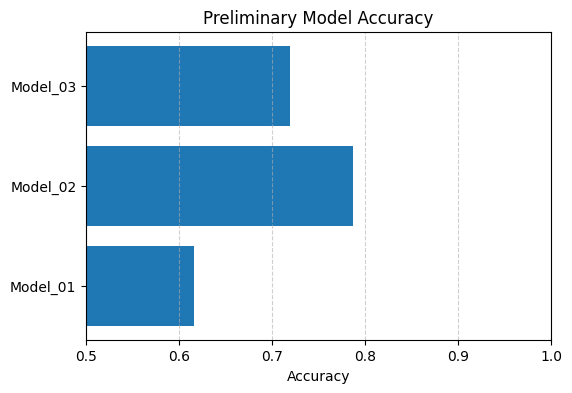

In [66]:
# Plot the current model scores
plot_model_scores(model_scores, "Preliminary Model Accuracy")

# Model 1: Nobody Survived
Having performed some quick tests on our baseline models using the training data set, we will now run the 3 models on the test data set. In order to get our "official" score we will need to submit our prediction results to the Titanic competition for assessment. So this will be a chance to practice going through the submission process.

We start with Model 1 with the simple premise that nobody survived. Our baseline score for this was 62% against the training data set.

In [67]:
# Create a new dataframe by copying the PassengerId column from the TEST data set. There is no "Survived" column in the test data set.
# Use copy() method to ensure that we are working with a seperate copy of the data
predictions_model_1 = test_data[["PassengerId"]].copy() 

predictions_model_1 # Check it looks okay. Should be 418 rows.

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [68]:
###### Model 1 Nobody Survived #######
# Add a new column for the predicted results
# NOTE: the new column MUST be named "Surivived" so that it complies with the submission format required by Kaggle
# Simply set all of the values in the new column to 0 (ie, nobody survived)

predictions_model_1['Survived'] = 0
predictions_model_1

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [69]:
# Save the predicted data to a csv file ready for submission
model_name = 'Model_01'
output = predictions_model_1
output_file_name = f"submission_{model_name.lower()}.csv"
output.to_csv(output_file_name, index=False)
print(f"Your {output_file_name} file was successfully saved!")

Your submission_model_01.csv file was successfully saved!


Having saved our submission file (which we named submission_model_01.csv), we may now submit our results to the competition. To do this, follow the instructions in the Titanic Tutorial [here](https://www.kaggle.com/code/alexisbcook/titanic-tutorial?scriptVersionId=99170538&cellId=14). Obviously when it comes to selecting the file to submit, choose the submission_model_1.csv file.

Once submitted, then check the returned score and report back here!

Okay. The results are in from the jury. The Public Score for the submitted predictions from Model 1 was: 0.622 . So that's a score of 62% against the test data set, compared with the same model yielding a score of 62% against the training data set. So at least it is *consistently* bad!!

# Model 2: All Females Survived and All Males Died
Now let's run our so-far best performing Model 2 (All Females Survived and All Males Died) against the test data set. This time we will condense all of the code into one cell, rather than work through step-by-step as we did for Model 1.

In [70]:
###### Model 2 All Females Survived and All Males Died #######
# Make the prediction that only females survived.

# Create a new dataframe by copying the PassengerId column from the TEST data set.
# Use copy() method to ensure that we are working with a seperate copy of the data
predictions_model_2 = test_data[["PassengerId"]].copy() 

# Add a new column "Survived" for the predicted results
# Initialise all values to zero.

predictions_model_2['Survived'] = 0

# Run our model on the test data set and populate the predictions table

for i in range(len(test_data)): 
    if test_data.loc[i, 'Sex'] == 'female':
        predictions_model_2.loc[i,'Survived'] = 1 # All females survived
        
predictions_model_2 # Check it looks okay. Should be 418 rows.

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [71]:
# Save the predicted data to a csv file ready for submission
model_name = 'Model_02'
output = predictions_model_2
output_file_name = f"submission_{model_name.lower()}.csv"
output.to_csv(output_file_name, index=False)
print(f"Your {output_file_name} file was successfully saved!")

Your submission_model_02.csv file was successfully saved!


Having saved our submission file for Model 2, we may now submit our results to the competition. We follow the same procedure as before.

Results: The Public Score for the submitted predictions from Model 2 was: 0.76555. So that's a score of 77% against the test data set, compared with the same model yielding a score of 79% against the training data set.

# Model 3: Women and Children First
Now let's run our Model 3 (Women and Children First) against the test data set. However, this will require some additional work. Just as we did in the training data set, we need to generate a new column in the test data set for the "IsWoCh" feature that classifies whether a passenger is a woman or child, or a male over 21 years old.

In [72]:
# Classify passengers based on as being "a female or a child" or "a male above 21 years old"
for i in range(len(test_data)):
    if test_data.loc[i,'Sex'] == 'female': # All females
        test_data.loc[i,'IsWoCh'] = True
    else:
        if test_data.loc[i,'Sex'] == 'male' and test_data.loc[i,'Age'] <= 21: # All males up to age 21
            test_data.loc[i,'IsWoCh'] = True
        elif test_data.loc[i,'Sex'] == 'male' and test_data.loc[i,'Age'] > 21: # All males over age 21
            test_data.loc[i,'IsWoCh'] = False    

# Where Male Age values are missing then the IsWoCh column will also contain a corrresponding missing value.
# So let's explicitly handle the missing values
test_data['IsWoCh'] = test_data['IsWoCh'].fillna('Unknown')

test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsWoCh
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Unknown
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Unknown


In [73]:
###### Model 3 Women and Children First #######
# Make the prediction that only women and children survived. Males > 21 years old did not survive.

# Create a new dataframe by copying the PassengerId column from the TEST data set.
# Use copy() method to ensure that we are working with a seperate copy of the data
predictions_model_3 = test_data[["PassengerId"]].copy() 

# Add a new column "Survived" for the predicted results
# Initialise all values to zero.

predictions_model_3['Survived'] = 0

# Run our model on the test data set and populate the predictions table
for i in range(len(test_data)): 
    if test_data.loc[i, 'IsWoCh'] == True:
        predictions_model_3.loc[i,'Survived'] = 1
        
predictions_model_3 # Check it looks okay. Should be 418 rows.

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
# Save the predicted data to a csv file ready for submission
model_name = 'Model_03'
output = predictions_model_3
output_file_name = f"submission_{model_name.lower()}.csv"
output.to_csv(output_file_name, index=False)
print(f"Your {output_file_name} file was successfully saved!")

Your submission_model_03.csv file was successfully saved!


Submit our predictions to the competition as before.

Results: The Public Score for the submitted predictions from Model 3 was: 0.71052. So that's a score of 71% against the test data set, compared with the same model yielding a score of 72% against the training data set. So a close match.

# Model 4: Random Forest (Pclass, Sex, SibSp, Parch)
So far the models we have run have been very "simple" by nature. A more intelligent approach would be to devise a model that makes predictions based on *multiple* features simultaneously. One such modelling technique is to use so-called "Random Forest Classification", which is a type of machine learning (ML) model. A brief overview of how this type of model works is provided in the Titanic Tutorial [here](https://www.kaggle.com/code/alexisbcook/titanic-tutorial?scriptVersionId=99170538&cellId=12). Essentially, we will use this ML model to search for complex patterns in the Titanic training data set, and then to make predictions for the test data set.

For our first run of this type of ML model, we will simply follow the example given in the tutorial. Here we shall train the model based on four of the features (columns) in the data set, namely: Passenger Ticket Class ("Pclass"), "Sex", No of Siblings / Spouse onboard ("SibSp"), and No of Parents / Children onboard ("Parch"). During training, the model will construct 100 "classification trees" based on different combinations of our specified features. It will then consider the data for each individual passenger in turn, and reach consensus on whether they survived or not.

In [75]:
# Import the Random Forest Classifier from the Scikit Learn library
# from sklearn.ensemble import RandomForestClassifier

# Set the target variable y as the 'Survived' column. This is what the model is being trained to predict.
y_train = train_data["Survived"]

# Select the list of features to be used as predictors in the model.
features = ["Pclass", "Sex", "SibSp", "Parch"]

# The get_dummies function from the pandas library is used to transform categorical data into a one-hot encoded format.
# One-hot encoding creates new binary columns for each category within a categorical feature.
# For example, "Sex" might be converted into separate columns for "male" and "female". 
# This helps machine learning models understand these features better.

X_train = pd.get_dummies(train_data[features]) # Training data Features
X_test = pd.get_dummies(test_data[features]) # Test Data Features

# Create a Random Forest Classifier model
# n_estimators=100 specifies the number of decision trees to use in the forest (100 in this case).
# max_depth=5 sets the maximum depth for each individual tree (limited to 5 levels here).
# random_state=1 sets a random seed for reproducibility (ensuring the same results when running the code multiple times).
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Train the model using the features (X) and the target variable (y). 
# The model learns the relationships between the features and the survival outcome.
model.fit(X_train, y_train)

# Use the trained model to predict the survival outcome (predictions) 
# for the passengers in the test_data after it's been one-hot encoded in X_test
y_predict = model.predict(X_test)

# Prepare output data for submission
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_predict})

# Save the predicted data to a csv file ready for submission
model_name = 'Model_04'
output_file_name = f"submission_{model_name.lower()}.csv"
output.to_csv(output_file_name, index=False)
print(f"Your {output_file_name} file was successfully saved!")

Your submission_model_04.csv file was successfully saved!


Once the model has been run and the submission csv file has been saved, we can now submit this for scoring.

Results: The Public Score for the submitted predictions from Model 4 was: 0.77511. So that's a score of 77.5%, our best so far! Although we should note that our Model 2 predictions were not far behind. Our much simpler model scored 76.5%.

# Assess Multiple Random Forest Models
Having familiarised ourselves with Random Forest Classification, let's explore whether we can improve on the predictive accuracy of the model. Here we will experiment by varying the selection of features and see how the model performs for each feature set.

Our initial assessement of each model will be based on using the *training* data set for BOTH training and testing. We took a similar approach earlier when we were conducting our baseline tests for Models 1, 2 and 3. By using the training data set for model testing, we can quickly generate scores for each model run without having to make a competition submisssion for each iteration. Afterall, at this stage, we are merely looking for a quick comparison of model performance. 

So, let's clean up and prepare our code.

In [76]:
# Define a function to run the Random Forest Classification model
def run_random_forest(features_input, train_data_input, test_data_input):
    
    y_train = train_data_input["Survived"]
    
    X_train = pd.get_dummies(train_data_input[features_input]) # Model Training Features
    X_test = pd.get_dummies(test_data_input[features_input]) # Model Testing Features
    
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    
    return y_predict

In [77]:
# Run the Random Forest Model for various feature sets
# Collect the predictions for each model in the score card

# Model 4
model_name = 'Model_04'
features = ["Pclass", "Sex", "SibSp", "Parch"] # The same features as used in our initial run previously
score_card[model_name] = run_random_forest(features, train_data, train_data) # train_data used for BOTH model training and testing
model_scores[model_name] = check_score(model_name, score_card) # Check score accuracy and add result to model_scores dictionary

# Model 5
model_name = 'Model_05'
features = ["Pclass", "Sex", "Family_size"]
score_card[model_name] = run_random_forest(features, train_data, train_data)
model_scores[model_name] = check_score(model_name, score_card)

# Model 6
model_name = 'Model_06'
features = ["Pclass", "Family_size", "IsWoCh"]
score_card[model_name] = run_random_forest(features, train_data, train_data)
model_scores[model_name] = check_score(model_name, score_card)

# Print a message once complete
print(f"Models successfully run!")

Models successfully run!


          Accuracy
Model_01  0.616162
Model_02  0.786756
Model_03  0.719416
Model_04  0.815937
Model_05  0.813692
Model_06  0.797980


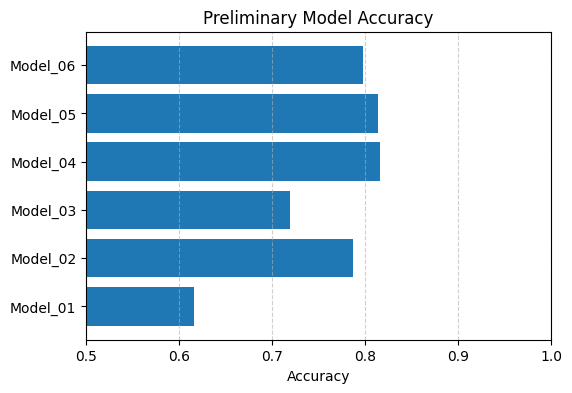

In [78]:
# Plot the comparison of model scores
plot_model_scores(model_scores, "Preliminary Model Accuracy")

The above plot compares the accuracy of all of the models we have run so far, including those that we ran earlier when establishing a baseline (Models 1, 2 &3). Remember that these model runs were all performed using the *training* data set for BOTH model training and model testing. The purpose here is to gauge a quick comparison of model accuracy before we run the models on the test data set (for which we will need to make submissions of the predicted results to the Kaggle competition to calculate the scores).

As we can see, the current leader is Model 4 with an accuracy of around 81.6% when run against the training data. Earlier this same model gave us a public score of 77.5% when run against the test data. Naturally, we expect such differences in computed scores.

We also note that Model 5 came a close second place with 81.4% accuracy. This model used a derived feature of "family size" rather than the two separate features for number of siblings / spouses (SibSp) and number of parents / children (Parch) used by Model 4.

Model 6 was also in the same ballpark with an accuracy of 79.8%. The features used for this model were a slight variation of those used for Model 5. Here we replaced the "Sex" feature (ie, male or female) with the refined feature "Is Woman or Child" (IsWoCh) to see if this would give a better fit. However this did not transpire when running the model on the training data. Perhaps it might perform better on the "proper" test data?

So, having set some expectations here, let's now run Models 5 and 6 on the test data and make submissions to the competition for scores to be calculated.

# Model 5: Random Forest (Pclass, Sex, Family Size)
Let's run this model against the test data set, make a submission, then obtain our competition score.

First we need to remind ourselves which features (columns) are already in the test data set.

In [79]:
# Show the existing features in the test data set
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsWoCh
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Unknown
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Unknown


Our derived feature for "Family Size" is not yet calculated for the test data set. So we run the following code to add it.

In [80]:
# Add a new column 'Family_size' to the test data.
test_data['Family_size'] = test_data['SibSp'] + test_data['Parch'] + 1 # We add 1 to include the passenger as well.

# Check the table
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsWoCh,Family_size
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Unknown,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,1
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Unknown,1


In [81]:
# Run Model 5 on the test data set.
# We will use our function as we did before.
# This time we will save our returned predicted results to a csv file ready for submission.

model_name = 'Model_05'
features = ["Pclass", "Sex", "Family_size"]
model_predictions = run_random_forest(features, train_data, test_data) # Train using *training* data, test using *test* data

# Prepare output data for submission
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': model_predictions})

# Save the predicted data to a csv file ready for submission
output_file_name = f"submission_{model_name.lower()}.csv"
output.to_csv(output_file_name, index=False)
print(f"Your {output_file_name} file was successfully saved!")

# We will submit our output file to the competition to get our public score in due course.

Your submission_model_05.csv file was successfully saved!


The public score for Model 5 is 0.77511. Interestingly this is the same public score as for Model 4.

# Model 6: Random Forest (Pclass, Family Size, IsWoCh)
Run Model 6 on the test data. Note that we already added the caclulated feature "IsWoCh" to the test data set earlier on.

In [82]:
# Run the model
model_name = 'Model_06'
features = ["Pclass", "Family_size", "IsWoCh"]
model_predictions = run_random_forest(features, train_data, test_data) # Train using *training* data, test using *test* data

# Prepare output data for submission
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': model_predictions})

# Save the predicted data to a csv file ready for submission
output_file_name = f"submission_{model_name.lower()}.csv"
output.to_csv(output_file_name, index=False)
print(f"Your {output_file_name} file was successfully saved!")

Your submission_model_06.csv file was successfully saved!


The public score for Model 6 is 0.7488, lower than that for Model 5.

# Public Scores Summary So Far
Let's collect the public scores for each of the our models and plot these to make comparisons easier.

In [83]:
# Create an empty dictionary
public_scores = {}

public_scores["Model_01"] = 0.622   # Nobody survived
public_scores["Model_02"] = 0.76555 # All females survived, all males died
public_scores["Model_03"] = 0.71052 # Women and children first (all males > 21 died)
public_scores["Model_04"] = 0.77511 # Random Forest - Pclass, Sex, SibSp, Parch
public_scores["Model_05"] = 0.77511 # Random Forest - Pclass, Sex, Family Size
public_scores["Model_06"] = 0.7488  # Random Forest = Pclass, Family Size, IsWoCh

print (public_scores)

{'Model_01': 0.622, 'Model_02': 0.76555, 'Model_03': 0.71052, 'Model_04': 0.77511, 'Model_05': 0.77511, 'Model_06': 0.7488}


          Accuracy
Model_01   0.62200
Model_02   0.76555
Model_03   0.71052
Model_04   0.77511
Model_05   0.77511
Model_06   0.74880


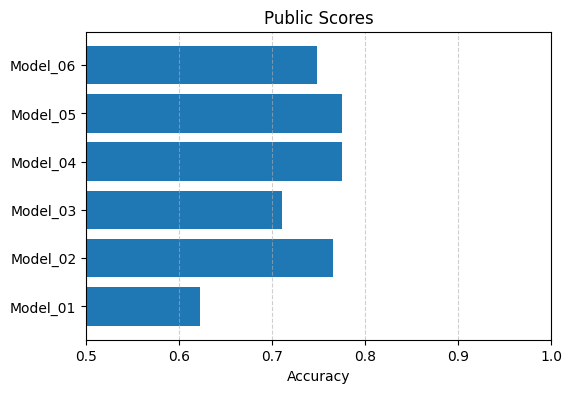

In [84]:
# Plot the public scores using our predefined function
plot_model_scores(public_scores, "Public Scores")

The plot shows that Models 4 and 5 are current joint leaders at an accuracy of 77.5%. Both these models were based on random forest classification using several features. Interestingly, coming up directly behind is our "simpler" Model 2 with a score of 76.5%. This model used just one feature ("Sex") for classification: simply that all females survived and all males perished.

# Public Scores versus Preliminary Scores
In passing, let us now take a look at how the public scores computed by Kaggle compare with our preliminary scores. Remember that we obtained our public scores by running each model and making predictions for the *test* data set. The preliminary scores were calculated locally by running each model and making predictions for the *training* data set.

In [85]:
# The preliminary scores are stored in a dictionary called 'model_scores'.
# The public scores are stored in a dictionary called 'public_scores'.

# Create a dataframe to store the both sets of scores
# Use 'dictionary comprehension' technique to create the dataframe. Avoids issue with order of dictionary keys.
# Automatically assigns the (common) dictionary keys (ie model name) as the table index.

score_comparison = pd.DataFrame({'Preliminary': model_scores,'Public': public_scores})

# Check resulting table
score_comparison

,Preliminary,Public
Model_01,0.616162,0.62200
Model_02,0.786756,0.76555
Model_03,0.719416,0.71052
Model_04,0.815937,0.77511
Model_05,0.813692,0.77511
Model_06,0.797980,0.74880


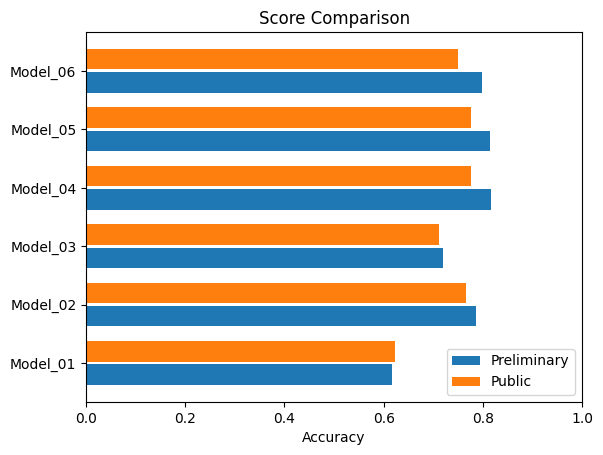

In [86]:
# Plot the score comparison in a bar chart

# Use short hand
df = score_comparison

# Grab the model names from the dataframe index
Y = df.index

# Define width for each bar (adjust as needed)
bar_width = 0.35

# We wish to plot seperate bars for the preliminary and public scores for each model
# First generate a range of values corresponding to the number of models in the dataframe
Y_axis = np.arange(len(df))

# Also specify desired bar offset
offset = 0.2

# Create horizontal bars
p1 = plt.barh(Y_axis - offset, df['Preliminary'], bar_width, label='Preliminary')
p2 = plt.barh(Y_axis + offset, df['Public'], bar_width, label='Public')

# Set the x-axis range. 
min_value = 0  
max_value = 1
plt.xlim(min_value, max_value)  # Set the x-axis limits

# Set the Y tick marks and labels
plt.yticks(Y_axis, Y)

# Set axis labels and title
plt.xlabel('Accuracy')
# plt.ylabel('Category')
plt.title('Score Comparison')

# Add legend
plt.legend()

# Show plot
plt.show()

The plot confirms that in general the public scores (derived by running the model against the test data set) are lower than the preliminary scores (where the model was run against the training data set). As for whether the *rankings* of the preliminary scores and the public scores for the models are the same, this does not necessarily hold true (as we shall see later when we introduce additional models). Nevertheless, we may still continue to experiment "locally" with multiple iterations of different models on the training data set, and then choose which of these to run against the test dat set. That way, we can avoid having to make competition submissions every time we test a new model.

# Feature Importance
At this stage, before we set about exploring other model permutations, we will take a step back and consider how influencial each of our selected features were on the results predicted by the random forest models. Here, we may use the 'feature importances' attribute that is provided with Scikit-learn's random forest classifier.

For the sake of clarity, let's define a new function to capture the feature importances (rather than go back and modify our previous code).

In [87]:
# Define a function to run the Random Forest Classification model and determine feature importance
def run_rf_feature_importance(features_input, train_data_input):
    
    y_train = train_data_input["Survived"]
    
    X_train = pd.get_dummies(train_data_input[features_input])
    
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    model.fit(X_train, y_train)
    
    # Capture feature importances
    feature_importances = model.feature_importances_
    feature_names = X_train.columns
    
    # Create data frame to store feature names and their respective importance.
    importance_df = pd.DataFrame({'Feature': feature_names, 'Importance':feature_importances})
    
    # Sort by feature importance
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
    
    # print(importance_df['Importance'].sum()) # Sums to 1.0
    
    return importance_df

In [88]:
# Determine feature importance for each of our random forest models

# Model 4
model_name = 'Model_04'
features = ["Pclass", "Sex", "SibSp", "Parch"] 
run_rf_feature_importance(features, train_data)

,Feature,Importance
3,Sex_female,0.342297
4,Sex_male,0.284667
0,Pclass,0.215508
2,Parch,0.080406
1,SibSp,0.077122


In [89]:
# Model 5
model_name = 'Model_05'
features = ["Pclass", "Sex", "Family_size"]
run_rf_feature_importance(features, train_data)

,Feature,Importance
2,Sex_female,0.315227
3,Sex_male,0.305501
0,Pclass,0.224353
1,Family_size,0.154918


In [90]:
# Model 6
model_name = 'Model_06'
features = ["Pclass", "Family_size", "IsWoCh"]
run_rf_feature_importance(features, train_data)

,Feature,Importance
0,Pclass,0.353934
3,IsWoCh_True,0.299034
1,Family_size,0.168599
2,IsWoCh_False,0.128233
4,IsWoCh_Unknown,0.050200


In the output tables above we see that gender ("Sex") is the main influencer for Model 4 and Model 5, with passenger ticket class in third place. In Model 4, the influence of Parch (0.080) and SibSp (0.077) has a combined importance of around 0.157, which tallies with the 0.155 value for Family Size in Model 5. This makes sense because the family size feature is a derived by combining the seperate Parch and SibSp features. 

In Model 6, passenger class comes in at first place with an importance of around 0.35. Unlike the previous models, Model 6 does not use the "Sex" feature explicitly. Instead it uses the derived feature IsWoCh, which indicates whether a passenger is a woman or a child. The key influencer here is when this value is true, giving an importance of just under 0.30. This again makes sense because most passengers in this group are female, and just like the "Sex" feature, we expect this to be a key determinator of survival likelihood.

So, we have seen that by using Scikit's built-in "feature importance" method we can get a feel for which features are the main drivers in making the classification for a particular model. However, while the built-in method is convenient, we should instead consider using "permutation feature importance" for a more robust measure. This technique involves shuffling a single feature's values and measuring the performance drop. Libraries like SHAP can be used for this purpose. So may be we should try this later.

Anyway, regardless of technique used, the question now is what do we actually do with this information? Feature importance helps identify influential features, but it doesn't necessarily explain the relationship between the feature and the target variable ("Survived" in our case). Perhaps if we consider this information alongside the calculated "accuracy" of the model, this may yield clues as to which selection of features is likely to provide the best predictive results? Further experimentation and analysis will be required here, which we will get to in due course.

Right now, we need to dive deeper into how we measure model "accuracy". Our current definition is rather crude. So the next few sections explore more rigorous approaches to assessing model performance.

# Accuracy and the Error Matrix (Confusion Matrix)
In Chapter 6 of his book  [The Art of Statistics: Learning from Data](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y), David Spiegelhalter discusses how to go about "Assessing the Performance of an Algorithm". The discussion opens with the following statement: "If algorithms are going to compete to be the most accurate, someone has to decide what 'accurate' means".  The author then provides a brief introduction to the generation of an "error matrix", which helps to explain why our current measure of 'accuracy' is too simplistic. 

Accordingly, let's try to expand our understanding of what we mean by 'accuracy' by working through some calculations. We will start by generating a so-called 'error matrix' (aka 'confusion matrix') for each of our models, and try to explain what these matrices tell us. Later, we will move on to introduce other performance metrics and consider how these may alter our perception of model 'accuracy'.

So, working from scratch (rather than using available functions such as the Scikit Learn metrics.confusion_matrix) , let's generate an error matrix for the first of our models. The hidden cell below defines our function to construct an error matrix.

In [91]:
# Function to generate an error matrix

def get_error_matrix(model_name, predictions_input):
    
    # Initialise counters
    predict_perish_actual_perish = 0 
    predict_survive_actual_perish = 0
    predict_perish_actual_survive = 0
    predict_survive_actual_survive = 0
    
    
    # Generate error matrix
    for i in range(len(predictions_input)):
        
        # Passenger predicted to perish and actually perished
        if predictions_input.loc[i, model_name] == predictions_input.loc[i,'Actual'] and predictions_input.loc[i, model_name] == 0:
            predict_perish_actual_perish += 1 # Add 1 to the running total score
    
        # Passenger predicted to survive but actually perished
        if predictions_input.loc[i, model_name] != predictions_input.loc[i,'Actual'] and predictions_input.loc[i, model_name] == 1:
            predict_survive_actual_perish += 1 # Add 1 to the running total score
   
        # Passenger predicted to perish but actually survived
        if predictions_input.loc[i, model_name] != predictions_input.loc[i,'Actual'] and predictions_input.loc[i, model_name] == 0:
            predict_perish_actual_survive += 1 # Add 1 to the running total score

        # Passenger predicted to survive and actually survived
        if predictions_input.loc[i, model_name] == predictions_input.loc[i,'Actual'] and predictions_input.loc[i, model_name] == 1:
            predict_survive_actual_survive += 1 # Add 1 to the running total score
    
   
    ####### Store results in a dataframe #######
    
    # Create dataframe
    error_matrix = pd.DataFrame({'Predict_Perish': [predict_perish_actual_perish, predict_perish_actual_survive],
                                'Predict_Survive':[predict_survive_actual_perish, predict_survive_actual_survive]})
    
    # Add column for row totals
    error_matrix['Total']=error_matrix.sum(axis=1)
    
    # Calculate column totals using temp dataframe
    df_totals = error_matrix.sum().to_frame().T # Transpose the table
    
    # Concatenate the original table with the totals row
    error_matrix = pd.concat([error_matrix, df_totals], ignore_index=True)
    
    # Set new index on rows
    new_index = ['Actual_Perish', 'Actual_Survive', 'Total']
    error_matrix = error_matrix.set_axis(new_index, axis=0)
    
    return error_matrix
    

In [92]:
# Test our new function against our "simple" Model_1 which assumes Nobody Survived

# Caclulate error matrix for the model
model_name = 'Model_01'
model_predictions = score_card # The predictions are stored in the score_card table
error_matrix_model_1 = get_error_matrix(model_name, model_predictions) 

# View error matrix
error_matrix_model_1

,Predict_Perish,Predict_Survive,Total
Actual_Perish,549,0,549
Actual_Survive,342,0,342
Total,891,0,891


The above table is the error matrix for Model 1. This model simply predicted that "nobody survived", which was obviously not true. Even so, the table shows us that we correctly predicted that 549 of the passengers did actually perish. We were just plain wrong about 342 of the passengers who actually survived.

Let's do the same for Model 2, which took the view that all females survived and all males died.

In [93]:
# Call function against our "simple" Model_2 which assumes All Females Survived, All Males Perished

# Calculate error matrix for the model
model_name = 'Model_02'
model_predictions = score_card 
error_matrix_model_2 = get_error_matrix(model_name, model_predictions) 

# View error matrix
error_matrix_model_2

,Predict_Perish,Predict_Survive,Total
Actual_Perish,468,81,549
Actual_Survive,109,233,342
Total,577,314,891


The error matrix for Model 2 now looks a bit more interesting. This model correctly predicted that 468 (male) passengers perished, and also that 233 (female) passengers survived. The model got it wrong in the case 81 of the (female) passengers, who were predicted to survive but actually perished. Similarly, for another 109 (male) passengers who actually survived, our model predicted they would perish.

Now we've got the gist of this, let's generate the error matrices for the remainder of our models. This time, however, we are going to present the results in an alternative format so that we can compare the results for all of the models in one table. To facilitate this, we will define a new function. This is shown in the hidden cell below. Note that the function calculates a wide range of model performance metrics in one go. This is for convenience, so that we only need to maintain one 'central' function as we progress through our subsequent analyses. We shall introduce each of these additional metrics in due course.

In [94]:
# Function to calculate an expanded set of model performance metrics from an error matrix
def get_performance_metrics(model_name, error_matrix):
    
    # Initialise an empty dictionary to capture model performance metrics
    performance_metrics ={}
    
    ##### Set up variables #####
    # For greater clarity, use these terms for identifying the cells in the error matrix
    
    True_Pos = error_matrix.loc['Actual_Survive', 'Predict_Survive']   # Number of True Positives
    True_Neg = error_matrix.loc['Actual_Perish', 'Predict_Perish']     # Number of True Negatives
    False_Pos = error_matrix.loc['Actual_Perish', 'Predict_Survive']   # Number of False Positives
    False_Neg = error_matrix.loc['Actual_Survive', 'Predict_Perish']   # Number of False Negatives
    
    Tot_Actual_Neg = error_matrix.loc['Actual_Perish', 'Total']        # Total number of passengers who actually perished
    Tot_Actual_Pos = error_matrix.loc['Actual_Survive', 'Total']       # Total number of passengers who actually survived
    
    Tot_Predict_Neg = error_matrix.loc['Total', 'Predict_Perish']      # Total number of passengers predicted to perish
    Tot_Predict_Pos = error_matrix.loc['Total', 'Predict_Survive']     # Total number of passengers predicted to survive
    
    Total = error_matrix.loc['Total', 'Total']                         # Total number of passengers in data set
    
    
    ##### Calculate 'rates' (proportions) #####
    
    # True Positive Rate (TPR) - also known as 'Recall' or 'Sensitivity'
    # The proportion of actual positive cases that were correctly identified
    TPR = True_Pos / Tot_Actual_Pos
    
    # True Negative Rate (TNR) - also known as 'Specificity'
    # The proportion of actual negative cases that were correctly identified
    TNR = True_Neg / Tot_Actual_Neg
    
    # False Positive Rate (FPR) - also known as 'Type I Error' or 'Fall-out'
    # The proportion of actual negative cases that were incorrectly classified as positive
    FPR = False_Pos / Tot_Actual_Neg
    
    # False Negative Rate (FNR) - also known as 'Type II Error' or 'Miss Rate'
    # The proportion of actual positive cases that were incorrectly classified as negative
    FNR = False_Neg / Tot_Actual_Pos
    
    
    ##### Calculate metrics of interest using our prefered terminology #####
    
    # Accuracy
    # Simply the percentage of *correct* predictions. 
    accuracy = (True_Pos + True_Neg) / Total
    
    # Sensitivity or Recall
    # The term 'sensitivity' is used in biostatics and medical diagnostics.
    # The term 'recall' is used more in the machine learning community
    sensitivity = TPR
    recall = TPR
    
    # Specificity
    specificity = TNR
    
    # Prevalence
    # Proportion of total passengers *in the data set* who actually survived
    prevalence = Tot_Actual_Pos / Total
    
    # Precision
    # The proportion of predicted positive cases that were actually positive
    if Tot_Predict_Pos != 0: # Skip calc if divisor is zero
        precision = True_Pos / Tot_Predict_Pos
    else:
        precision = 1 # The 'limit' when threshold is 100%. No postitive cases are predicted.
    
    # F1 Score
    # The F1 score is the harmonic mean of precision and recall. 
    # A perfect F1 score of 1 indicates the model perfectly predicts both positive and negative cases.
    f1score = 2 * (precision * recall) / (precision + recall)
    
    
    # ROC Distance
    # The closeness of a specific data point on an ROC plot 
    # to the ideal scenario of perfect sensitivity and specificity at the top-left corner of the plot.
    roc_dist = np.sqrt(((1.0 - specificity) ** 2) + ((1.0 - sensitivity) ** 2))
    
    # PR Distance
    # The closeness of a specific data point on an Precision-Recall (PR) plot 
    # to the ideal scenario of perfect precision and recall (sensitivity) at the top-right corner of the plot.
    prc_dist = np.sqrt(((1.0 - precision) ** 2) + ((1.0 - recall) ** 2))
    
    ##### Store the performance metrics in a dictionary #####
    performance_metrics[model_name] = {'Accuracy': accuracy, 'Prevalence' : prevalence,
                                    'Sensitivity': sensitivity, 'Specificity': specificity, 'ROC_Dist' : roc_dist,
                                    'Precision': precision, 'Recall' : recall, 'PRC_Dist' : prc_dist, 'F1_Score': f1score,
                                    'TPR': TPR, 'TNR' : TNR, 'FPR' : FPR, 'FNR' : FNR,
                                    'TP': True_Pos, 'TN': True_Neg, 'FP': False_Pos, 'FN' : False_Neg,
                                    'Tot_Act_Pos' : Tot_Actual_Pos, 'Tot_Pred_Pos' : Tot_Predict_Pos,
                                    'Tot_Act_Neg' : Tot_Actual_Neg, 'Tot_Pred_Neg' : Tot_Predict_Neg,
                                    'Total': Total,
                                   }
    
    return performance_metrics

Using our new function, let's generate the error matrix for each model, and present the results in single table. The code for this is in the hidden cell below.

In [95]:
# Initialise an empty "master" dictionary to store model performance metrics
model_performance_metrics_dict ={}

# Grab the list of models
model_names = list(score_card.columns[2:]) # Grab column names from index 2 onwards

# Set location of model predictions table
model_predictions = score_card 

# Calculate error matrix and model performance metrics
for model_name in model_names:
    
    # Note the call to the get_error_matrix function as an input parameter for the get_performance_metrics function
    performance_metrics = get_performance_metrics (model_name, get_error_matrix(model_name, model_predictions))
    
    # Append the returned performance metrics for the current model to the 'master' dictionary
    model_performance_metrics_dict.update(performance_metrics)

# Create a dataframe for the 'master set' of model performance metrics
model_performance_metrics = pd.DataFrame.from_dict(model_performance_metrics_dict, orient='index')
    
# Select required columns for error matrix summary 
error_matrix_columns = ['TP', 'TN', 'FP', 'FN', 'Tot_Act_Pos', 'Tot_Pred_Pos', 'Tot_Act_Neg', 'Tot_Pred_Neg', 'Total']

# Create new dataframe using selected columns
error_matrix_summary = model_performance_metrics[error_matrix_columns]

# View dataframe
error_matrix_summary

,TP,TN,FP,FN,Tot_Act_Pos,Tot_Pred_Pos,Tot_Act_Neg,Tot_Pred_Neg,Total
Model_01,0,549,0,342,342,0,549,891,891
Model_02,233,468,81,109,342,314,549,577,891
Model_03,263,378,171,79,342,434,549,457,891
Model_04,235,492,57,107,342,292,549,599,891
Model_05,233,492,57,109,342,290,549,601,891
Model_06,221,490,59,121,342,280,549,611,891


So let's explain each of the columns in the table in the context of our survival predicitons.

First we have the calculated values in the error matrix:
* Number of True Positives (TP): the number of cases where true survivors were correctly predicted.
* Number of True Negatives (TN): the number of cases where true non-survivors were correctly predicted.
* Number of False Positives (FP): the number of cases where predicted survivors actually perished.
* Number of False Negatives (FN): the number of cases where predicted non-survivors actually survived.

Then we have the totals:
* Total Actual Positives : total number of actual survivors in the data set (a constant value for the data set).
* Total Predicted Positives: total number of passengers in the data set predicted to survive using the model.
* Total Actual Negatives: total number of passengers in the data set that actually perished (a constant value for the data set).
* Total Predicted Negatives: total number of passengers in the data set predicted to perish using the model.
* Total: total number of passengers in the data set (a constant value for the data set).

If we now compare the values in the table above against the error matrices we created earlier for Model 1 and Model 2, we see that we have simply "flattened" the matrix for each model. The values shown here match with our previous tables.

So, at this stage, we should now be able to appreciate how the error matrix for each model can provide us with some additional insight into how well our models performed. 
This additonal level of performance detail provide by the error matrix is clearly more refined than our previous 'accuracy' measure. Essentially, 'accuracy' merely adds up the number of correct predictions and presents this as a single metric value to characterise the overall model performance. It tells us nothing about the 'quality' of our predictions and "[t]he numbers of different types of errors made by the [model] algorithm" (Spiegelhalter [book](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y), page 157). Whereas, by offering an extra level of granularity, the error matrix actually highlights "what we got right" and "what we got wrong" with our predictions, which should be of more use when trying to establish an optimum model.

Incidentally, model accuracy may be back-calculated from the error matrix values as follows:

> **Accuracy = (TP + TN) / Total**

So, in the case of Model 1, accuracy = (0 + 549) / 891 = 0.6161. This is the same as our preliminary score for Model 1. Voila!

Okay. Let's move on. What else might we deduce from the values in the error matrix?

# Sensitivity and Specificity

We now introduce two additonal metrics, 'sensitivity' and 'specificity". Refering once again to the [book](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y) by David Spiegelhalter, he explains: "If we are trying to detect survivors, the percentage of true survivors that are correctly predicted is known at the **sensitivity** of the algorithm, while the percentage of true non-survivors that are correctly predicted is known as the **specificity**. These terms arise from medical diagnostic testing."

So, sensitivity focuses on the model's ability to correctly identify "positive" cases (ie, Survived = True). It's also known as the **True Positive Rate (TPR)**. Specificity, on the other hand, looks at the model's ability to correctly identify "negative" cases (ie, Survived = False). It's also known as the **True Negative Rate (TNR)**.

Let's see how these metrics are caclulated from the values in the model error matrix. The relevent formulae are as follows:

> **True Positive Rate (TPR) = TP / Tot_Act_Pos = 'Sensitivity' (aka 'Recall' or 'Hit Rate')**

> **True Negative Rate (TNR) = TN / Tot_Act_Neg = 'Specificity'**

Two other related metrics are the **False Positive Rate (FPR)** , which is the proportion of actual negative cases that are incorrectly classified as positive, and the **False Negative Rate (FNR)**, which is the proportion of actual positive cases that were incorrectly classified as negative. 

> **False Positive Rate (FPR) = FP / Tot_Act_Neg = 'Type I Error' (aka 'Fall-out')**

> **False Negative Rate (FNR) = FN / Tot_Act_Pos = 'Type II Error' (aka 'Miss Rate')**

We should also introduce another term at this stage, namely **Prevalence**, which in our context is simply the proportion of total passengers *in the data set* who actually survived (a constant value for a given data set). The relevance of of this metric will become apparent a little later.

> **Prevalence = Tot_Act_Pos / Total**

So, let's extract these additonal metrics from our 'master' performance metrics table that we prepared earlier.

In [96]:
# Select required columns for metrics table
metrics_columns = ['Accuracy', 'Sensitivity', 'Specificity','Prevalence',] 
error_rates_columns = ['TPR', 'TNR', 'FPR', 'FNR']
error_matrix_columns = ['TP', 'TN', 'FP', 'FN', 'Tot_Act_Pos', 'Tot_Pred_Pos', 'Tot_Act_Neg', 'Tot_Pred_Neg', 'Total']
selected_columns = metrics_columns + error_rates_columns + error_matrix_columns

# Create new dataframe using selected columns
metrics_summary = model_performance_metrics[selected_columns]

# View dataframe
metrics_summary

,Accuracy,Sensitivity,Specificity,Prevalence,TPR,TNR,FPR,FNR,TP,TN,FP,FN,Tot_Act_Pos,Tot_Pred_Pos,Tot_Act_Neg,Tot_Pred_Neg,Total
Model_01,0.616162,0.000000,1.000000,0.383838,0.000000,1.000000,0.000000,1.000000,0,549,0,342,342,0,549,891,891
Model_02,0.786756,0.681287,0.852459,0.383838,0.681287,0.852459,0.147541,0.318713,233,468,81,109,342,314,549,577,891
Model_03,0.719416,0.769006,0.688525,0.383838,0.769006,0.688525,0.311475,0.230994,263,378,171,79,342,434,549,457,891
Model_04,0.815937,0.687135,0.896175,0.383838,0.687135,0.896175,0.103825,0.312865,235,492,57,107,342,292,549,599,891
Model_05,0.813692,0.681287,0.896175,0.383838,0.681287,0.896175,0.103825,0.318713,233,492,57,109,342,290,549,601,891
Model_06,0.797980,0.646199,0.892532,0.383838,0.646199,0.892532,0.107468,0.353801,221,490,59,121,342,280,549,611,891


Using Model 1 as an example (which simply stated that "nobody survived"), the table shows that the 'Accuracy' for Model_1 on the training data set is just under 62%. This is the same value we calculated for its preliminary score earlier in our analysis. The accuracy is simply the total percentage of predictions that were correctly classified. In this simple case, the accuracy is 549 (correctly predicted as perished) divided by the Total Passengers (891) = 0.616162. 

The sensitivity of the algorithm for Model 1 is zero (0), because we simply did not predict any survivors. However, at the other end of the scale, we did manage to correctly predict that 549 of the passengers perished, exactly matching the total number of passengers who actually died. Hence we obtained an algorithm specificity of 1 (ie, 100% correct).

Now let's consider the results for Model 2, which took the view that all females survived and all males died. The overall accuracy for Model 2 improves on Model 1 (78.7 % versus 61.6%). We also observe a marked increase in the sensitivity by using Model 2. Here we see that out of the total (342) passengers who actually survived, we made correct predictions for 68% of these passengers (equates to 233). However, our increase in sensitivity came at the expense of a descrease in specificity compared with Model 1. Of the 549 passengers who actually perished, our predictions were correct for only 85% (468) of them this time around, compared with 100% using Model 1.

As for the other models, the table confirms once again that Model 4 is the most 'accurate' model running against the training data set. It displays an accuracy of 81.6%, with a corresponding sensitivity of 68.7% and a specificity of 89.6%. Very close in second place is Model 5 with similar results.

Notably, the model with the highest sensitivity is Model 3. Remember this model was based on the premise that women and children would be more likely to survive. Here we see that of the total (342) passengers in the training data set who actually survived, the model made correct predictions for 76.9% (263) of these passengers. However, the same model was much less effective than the others when it came to correctly predicting the number of passengers who perished. Out of the total (549) passengers who actually perished, Model 3 only got it right for 68.9 % (378) of these lost souls.

So, looking at this table, it appears that the challenge is to try to maximise both the algorithm's sensitivity and the specificity at the same time. However, in practice, there is always a trade-off between sensitivity and specificity, and it's a matter of finding a workable balance dependant on the specific use case.

Now, what might be interesting at this stage is if we now make a plot of sensitivty versus specificity, rather than only staring at numbers in a table.

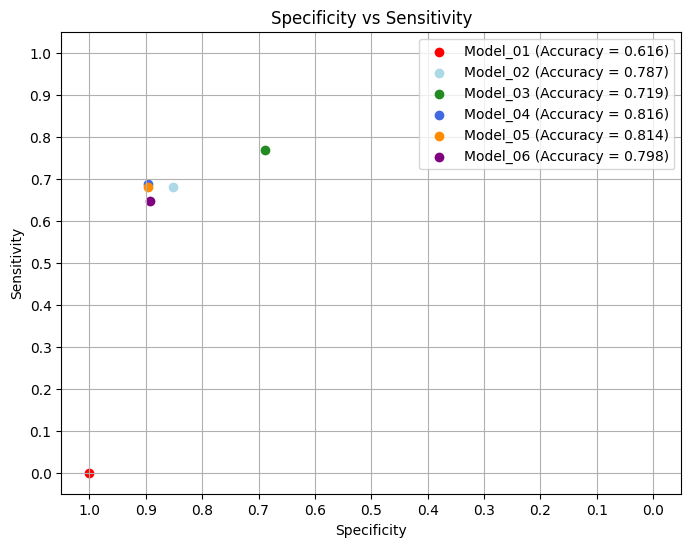

In [97]:
# Plot Sensitivity versus Specificity

# Create a list of colors for data points and lines for general use (now and later)
colors = ['red', 'lightblue', 'forestgreen', 'royalblue', 'darkorange',
          'purple', 'gold', 'teal', 'magenta', 'limegreen', 'darkred', 'dodgerblue']

# Configure the plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Location of data table
data_table = model_performance_metrics

# Iterate through the data table
for i, (model_name, row) in enumerate(data_table.iterrows()):
    x_data = row['Specificity']
    y_data = row['Sensitivity']
    accuracy = row['Accuracy']

    # Use the color list for efficient color assignment
    color = colors[i % len(colors)]  # Cycle through colors

    plt.scatter(x_data, y_data, label=f"{model_name} (Accuracy = {accuracy:.3f})", c=color)

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("Specificity vs Sensitivity")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

The resulting plot shows that, as of right now, we only have one single data point for each model. And for each data point, we can calculate a corresponding accuracy. Ultimately, the values of 'accuracy', 'sensistivity' and 'specificity' are derived directly from the error matrix for each model, as we have seen above.

Notice that the data points for Model_4 and Model_5 are plotted almost on top of each other. That's because the calculated values for 'sensitivity' and 'specificity' for each model happen to be very similar, despite them being different models. Also note that the 'accuracy' of these two models is also very close (0.816 versus 0.814). So, it follows that, regardless of which model is used to calculate a set of 'sensitivity & specificity' pairs, if the values from two (or more) different models turn out to be exactly the same, then the corresponding 'accuracy' should be exactly the same, assuming the models are run on exactly the same data set.

Now, by looking at the plot, what values of sensitivity and specificity represent a 'perfect classifier'? Obviously, it would be a point that is located at the top-left of the plot, where both sensitivity and specificity are equal to 1. So we should expect that in order to achieve higher model 'accuracy' overall, we need to devise models that push our data points nearer and nearer to the top-left corner.

Conversely,what constitues a "poor classifier"? Any set of sensitivity and specificity value pairs that land further away from the top-left corner. For example, our data point for Model 1 seems to be very distant. It has zero sensitivity, so it is pushed to the bottom of the y-axis. And if we look at the corresponiong accuracy, we see our value of 0.62, which makes it our worst performing model so far. The only reason it managed a 62% score was that it got predictions right for the actual negative cases, giving it a specifity value of 1.

Now, before we move on, it would be reasonable to ask whether we can possibly back-calculate 'accuracy' from a set of sensitivity and specificity values shown on the plot?

## Back-calculate Accuracy from Sensitivity and Specificity
Let's work through our previous equations. Earlier we noted:

> **Accuracy = (TP + TN) / Total (Eq.1)**

> **Sensitivity = TP / Tot_Act_Pos (Eq.2)**

> **Specificity = TN / Tot_Act_Neg (Eq.3)**

From Eq.2 and Eq.3 we get:

> **TP = Sensitivity \* Tot_Act_Pos (Eq.4)**

> **TN = Specificity \* Tot_Act_Neg (Eq.5)**

Substituting these into Eq.1, we now have:

> **Accuracy = ((Sensitivity \* Tot_Act_Pos) + (Specificity \* Tot_Act_Neg)) / Total (Eq.6)**

We can now split Eq.6 into the following terms :

> **Accuracy = Sensitivity \* (Tot_Act_Pos) / Total) + Specificity \* (Tot_Act_Neg) / Total) (Eq.7)**

Now we recognise one of the terms in Eq.7 from earlier when we noted:

> **Prevalence = Tot_Act_Pos / Total (Eq.8)**

Now, if 'prevalence' is the proportion of actual *positve* cases in the total population, then it follows that (1 - prevalance) is the proportion of actual *negative* cases in the same population. So we may re-write Eq.7 as:

> **Accuracy = (Sensitivity \* Prevalence) + (Specificity \* (1 - Prevalence)) (Eq.9)**

So, let's put this to the test and back-calculate the accuracy for each of our models.


In [98]:
# Extract relevant data from our master performance metrics table into a new table
selected_columns = metrics_columns
df = model_performance_metrics[selected_columns].copy() # Explicitly create a copy
df['Back_Calc_Acc'] = df['Sensitivity'] * df['Prevalence'] + df['Specificity'] * (1 - df['Prevalence'])

# View table
df

,Accuracy,Sensitivity,Specificity,Prevalence,Back_Calc_Acc
Model_01,0.616162,0.000000,1.000000,0.383838,0.616162
Model_02,0.786756,0.681287,0.852459,0.383838,0.786756
Model_03,0.719416,0.769006,0.688525,0.383838,0.719416
Model_04,0.815937,0.687135,0.896175,0.383838,0.815937
Model_05,0.813692,0.681287,0.896175,0.383838,0.813692
Model_06,0.797980,0.646199,0.892532,0.383838,0.797980


The above table confirms that we may back calculate accuracy from the sensitivity, specificity and prevalence values. So why might this be useful? Let's go explore.

Refering back to our plot of sensitivity versus specificity, it would be interesting to overlay a plot of accuracy calculations for a wide range of sensitivity / specificity value pairs. That way we should be able to determine where the "sweet spots" are. The code to calculate the accuracy values is below. 

In [99]:
# Generate a table of accuracy values for a range of sensitivity and specificity values
# Use NumPy vectorized operations for efficiency

prevalence = 0.383838
sensitivity_range = np.arange(0, 1.05, 0.05)
specificity_range = np.arange(0, 1.05, 0.05)

# The meshgrid function creates arrays with a specific orientation:
# Rows correspond to variations in the first input array (usually the y-axis variable).
# Columns correspond to variations in the second input array (usually the x-axis variable).
# We want sensitivity on the y-axis, and specificity on the x-axis.

sensitivity_grid, specificity_grid = np.meshgrid(sensitivity_range, specificity_range)

# Create data array of accuracy values
# For plotting, the data array is expected to have rows corresponding to y-axis points and columns corresponding to x-axis points.
# So we will need tranpose the accuracy table because its columns correspond to sensitivity variations (y-axis)

accuracy_table = (sensitivity_grid * prevalence) + (specificity_grid * (1 - prevalence))
accuracy_table = np.transpose(accuracy_table)

##### View the calculated values in a dataframe #####

# Combine grids into a single 3D array for easier manipulation
data_3d = np.stack((sensitivity_grid, specificity_grid, accuracy_table), axis=2)

# Flatten the first two dimensions (resulting in a 2D array)
data_2d = data_3d.reshape(-1, 3)  # -1 infers the number of rows from the data

# Create column names
column_names = ['Sensitivity', 'Specificity', 'Accuracy']

# Create the DataFrame
accuracy_data_table = pd.DataFrame(data_2d, columns=column_names)

# View table
accuracy_data_table

,Sensitivity,Specificity,Accuracy
0,0.00,0.0,0.000000
1,0.05,0.0,0.030808
2,0.10,0.0,0.061616
3,0.15,0.0,0.092424
4,0.20,0.0,0.123232
...,...,...,...
436,0.80,1.0,0.876768
437,0.85,1.0,0.907576
438,0.90,1.0,0.938384
439,0.95,1.0,0.969192


Now let's plot the data. The code to generate the plot is in the hidden cell below.

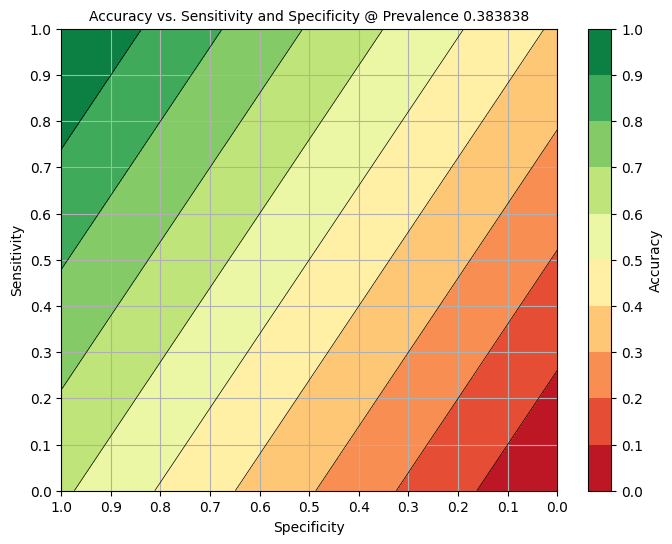

In [100]:
# Configure the plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Configure contour map
levels = np.linspace(0,1,11) # Set number of contour levels
plt.contourf(specificity_range, sensitivity_range, accuracy_table, cmap='RdYlGn', levels = levels)
plt.colorbar(label='Accuracy', ticks=np.arange(0, 1.1, 0.1))  # Add a colorbar for legend

# Set the x-axis and y-axis ranges
plt.xlim(1, 0) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(0, 1)

# Set labels
plt.xlabel('Specificity') 
plt.ylabel('Sensitivity')
plt.title(f'Accuracy vs. Sensitivity and Specificity @ Prevalence {prevalence}', fontsize=10)
plt.grid(True)

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

# Optional: Add contour lines for better visualization
plt.contour(sensitivity_range, specificity_range, accuracy_table, levels=np.arange(0.1, 1, 0.1), linewidths=0.5, colors='black')

plt.show()


###### Debug Tools ######

# Print values using nditer
# for x, y, z in np.nditer([specificity_grid, sensitivity_grid, accuracy_table]):
  # Customize output format here (e.g., f-strings)
#  print(f"Specificity: {x:.2f}, 'Sensitivity' : {y:.2f}, Accuracy: {z:.4f}")


The above plot shows the ranges of accuracy values that are obtained for different specificity and sensitivity data pairs using the given prevalence value. It confirms that in order to get an improved model performance we need to be aiming for the top-left corner of the plot. 

We can now overlay the data for our current models on this plot to see where they lie. This is shown below.

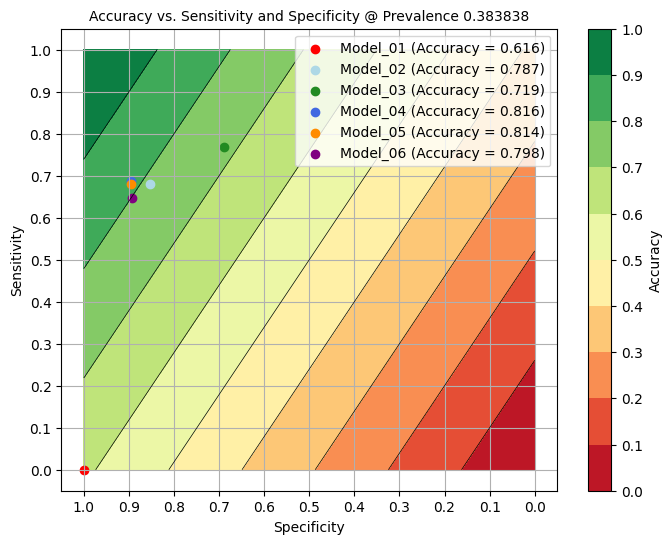

In [101]:
# Overlay sensitivity and sensitivity values for each of our models

# Configure the plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot contour map
levels = np.linspace(0,1,11) # Set number of contour levels
plt.contourf(specificity_range, sensitivity_range, accuracy_table, cmap='RdYlGn', levels = levels)
plt.colorbar(label='Accuracy', ticks=np.arange(0, 1.1, 0.1))  # Add a colorbar for legend

# Optional: Add contour lines for better visualization
plt.contour(sensitivity_range, specificity_range, accuracy_table, levels=np.arange(0.1, 1, 0.1), linewidths=0.5, colors='black')

# Location of data table
data_table = model_performance_metrics

# Use colors from the general colors list we created earlier

# Iterate through the data table
for i, (model_name, row) in enumerate(data_table.iterrows()):
    x_data = row['Specificity']
    y_data = row['Sensitivity']
    accuracy = row['Accuracy']

    # Use the color list for efficient color assignment
    color = colors[i % len(colors)]  # Cycle through colors

    plt.scatter(x_data, y_data, label=f"{model_name} (Accuracy = {accuracy:.3f})", c=color)

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title(f'Accuracy vs. Sensitivity and Specificity @ Prevalence {prevalence}', fontsize=10)
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

The above plot clearly shows that Model 4 and Model 5 are our top performing models right now, with their accuracy values just inside the 0.8 to 0.9 band. Our worst performing algorithm comes with Model 1, with its data point located at the bottom-left corner (the axes ranges have been extended to display this point more clearly, even though, aesthetically, the plot starts to look a bit horrible!)

So, at this stage, let's move on and explore some additional ways to measure model performance. 

# ROC Curves
We will now explore the concept of **Receiver Operating Chararcteristic (ROC) curves**.

Ignoring our "simple" models (Models 1, 2 and 3) for now, let us focus on the models that used a random forest classifier (Models 4, 5 and 6). We were introduced earlier to how this type of model works, as provided in the Titanic Tutorial [here](https://www.kaggle.com/code/alexisbcook/titanic-tutorial?scriptVersionId=99170538&cellId=12). Essentially, the model constructs a 100 classification trees (in our case) "that will individually consider each passenger's data and vote on whether the individual survived. Then, the random forest model makes a democratic decision: the outcome with the most votes wins!". In other words, the model simply assigns a survival prediction of 'true' (1) or 'false' (0) for each passenger based on the votes from each of the trees used by the model. However, as David Spiegelhalter's suggests in his [book](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y) (page 157), "[t]he crude allocation rule simply chooses the outcome in the majority, but instead we could assign to new cases a *probability* of surviving corresponding to the proportion in the training set."

Spiegelhalter continues: "Algorithms that give a probability (or any number) rather than a simple classification are often compared using Receiver Operating Charactersitic (ROC) curves, which were originally developed in the Second World War to analyse radar signals. The crucial insight is that we can vary the threshold at which people are predicted to survive."

So, let's try to understand this by working through an example. Again, just as for the error matrix, we shall build an ROC curve from scratch rather than use any available functions (eg, Scikit Learn metrics.roc_curve). That way we can get a better 'feel' for what's going on. (We shall start exploring the Scikit Learn functions later on).

We will use Model 4 (our "best" performing model so far) as an initial worked example. Our new function for calculating the 'probabilities' of survival for each passenger is provided in the hidden cell below.

In [102]:
# Define a function to train a random forest model and extract probabilities
def get_random_forest_probs(features_input, train_data_input, test_data_input):
    
    # Set target variable
    y_train = train_data_input["Survived"]
    
    # Grab the list of features and perform one-hot encoding
    X_train = pd.get_dummies(train_data_input[features_input])
    X_test = pd.get_dummies(test_data_input[features_input])
    
    # Define model parameters and train the model
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
    model.fit(X_train, y_train)
    
    # Predict class labels (Survived = 0 or Surived = 1) as we have done previously
    y_predict = model.predict(X_test)
    
    # Predict probabilities using 'proba' argument. This is an in-built method of the RandomForestClassifier.
    # The proba argument controls the output format of the predictions
    # By default (proba=False), the predict_proba method returns the predicted class labels for each data point.
    # These labels correspond to the index of the most probable class in the model's internal representation.
    # Setting proba=True instructs the model to return the probability estimates for each class label. This results in a 2D array where:
            # Each row represents a data point from the input.
            # Each column represents a predicted class probability.
    
    y_proba_false = model.predict_proba(X_test)[:, 0] # The first column (index 0) of the output array
    y_proba_true = model.predict_proba(X_test)[:, 1] # The second column (index 1) of the output array
    
    # Store the results in a dataframe along with PassengerId and Actual Survival data.
    model_probs = pd.DataFrame({'PassengerId': test_data_input.PassengerId, 'Predict_Survived': y_predict, 
                                'Prob_False': y_proba_false, 'Prob_True': y_proba_true})
    
    return model_probs

In [103]:
# We will use Model 4 (our "best" performing model so far) as an example

# Model 4
model_name = 'Model_04'
features = ["Pclass", "Sex", "SibSp", "Parch"]

# Calculate probabilities
probs_model_4 = get_random_forest_probs(features, train_data, train_data) # We are testing against the *training* data

# Add the Actual Survival data to the table
probs_model_4['Actual'] = train_data.Survived

# View results
probs_model_4


,PassengerId,Predict_Survived,Prob_False,Prob_True,Actual
0,1,0,0.877790,0.122210,0
1,2,1,0.033557,0.966443,1
2,3,1,0.381135,0.618865,1
3,4,1,0.033557,0.966443,1
4,5,0,0.879821,0.120179,0
...,...,...,...,...,...
886,887,0,0.885587,0.114413,0
887,888,1,0.038619,0.961381,1
888,889,0,0.585198,0.414802,0
889,890,0,0.665378,0.334622,1


The resulting table helps to explain how the random forest model decides which class to predict for each passenger (in the training data set). For example, Passenger 1 (row 0) was predicted to perish (Survived = 0). Behind the scenes, the random forest model deduced this fact by assessing the probabilities of this being the case. The probability of this passenger not surviving was 87.8 %, compared with a 12.2% chance of surviving. So, the algorithm selected the "winner" as being "did not survive", hence the Survived value was set to 0.

Contrast this with Passenger 2 (row 1). This passenger was predicted to survive (Survived = 1), based on the calculated probability of survival being 96.6% versus a probability of dying set at 3.4%.

This raises the question about how the threshold (otherwise known as 'cutoff') is set within the algorithm. Intuitively, with a binary classification (either 0 or 1), we expect the threshold to be set at 50%. So, for example, if the Prob_True value comes in at 60%, then the Prob_False value would be 40% (the total of the proabilities for a particular passenger will add to unity). Expressing this another way, we can say that if the Prob_True value is greater than 50% (the threshold), then the passenger is deemed to survive. If the Prob_True value is less than 50%, then the passenger is predicted to perish. Quite what happens if the both the Prob_True and Prob_False values are exactly 50% each is anyone's guess? But we won't dwell on this.

Let's run a quick query on the table to look at those passengers with probabilites near the 50% mark. The results below confirm our suspicions that the threshold is set at 50%. We only need to go under or over the 50% threshold by a small amount for the switch to flick.

In [104]:
# View passengers with probabilities around 50%
probs_model_4.query('Prob_True >0.48 and Prob_True < 0.52')

,PassengerId,Predict_Survived,Prob_False,Prob_True,Actual
78,79,1,0.496514,0.503486,1
148,149,1,0.496514,0.503486,0
377,378,0,0.509238,0.490762,0
445,446,0,0.509238,0.490762,1
550,551,0,0.509238,0.490762,1
659,660,0,0.509238,0.490762,0
827,828,1,0.496514,0.503486,1


So, just to recap. Our model predictions (survived or not) were based on the random forest classifier using a threshold probability of 50% to determine the resulting classification for each passenger. 

And as we saw earlier, in the case of Model 4, this model yielded an 'Accuracy' of 0.815937, a 'Sensitivity' of 0.687135, and a 'Specificity' of 0.896175 when the model was run against the training data set.

David Spiegelhalter suggests that "we could have demanded a higher probability in order to predict someone survives, say 70%,...". This would result in a different set of "Survived" values, and accordingly a different set of results for accuracy, sensitivity and specificity. In fact, we could explore the results for a whole range of thresholds. So, let's now give this a try.

First, we will define a new function to calculate passenger survival for specified thresholds. This sets up a new table based on the probabilities table we generated above. We only require the PassengerId, Actual and Prob_True columns. Then the function generates some new columns by running calculations across a whole range of thresholds. To do this, for each passenger we simply check if Prob_True value is above or below each new threshold iteration, then populate the resulting column with '1' (Survived) or '0' (Did not survive) accordingly. The code for the new function is in the hidden cell below.

In [105]:
# Define function to calculate passenger survival for specified thresholds
def get_survival_for_threshold_range (model_probs, thresh_range_input): 
    
    # thresh_range_input is a tuple
    min_thresh = thresh_range_input[0]
    max_thresh = thresh_range_input[1]
    steps_thresh = thresh_range_input[2]
    
    # Set up new table
    # Grab the PassengerId, Actual Survival and Prob_True columns from the calculated probabilities table
    threshold_predictions = model_probs[['PassengerId', 'Actual', 'Prob_True']].copy()
    
    # Caclulate passenger survival based on different probability thresholds
    for threshold in range (min_thresh, max_thresh, steps_thresh): # Explore a range of thresholds expressed as percentage
        # Initialise new column
        new_col_name = f"Thresh_{threshold}"
        threshold_predictions[new_col_name] = 0 # Set all values in column to zero
        for i in range (len(threshold_predictions)):
            if threshold_predictions.loc[i, 'Prob_True'] >= threshold/100:
                threshold_predictions.loc[i, new_col_name] = 1
                
    return threshold_predictions

In [106]:
# Calculate model predictions for a range of thresholds
thresh_range = (0, 110, 10) # From 0 to 100 in steps of 10%
thresh_predict_model_4 = get_survival_for_threshold_range (probs_model_4, thresh_range)

# View table
thresh_predict_model_4


,PassengerId,Actual,Prob_True,Thresh_0,Thresh_10,Thresh_20,Thresh_30,Thresh_40,Thresh_50,Thresh_60,Thresh_70,Thresh_80,Thresh_90,Thresh_100
0,1,0,0.122210,1,1,0,0,0,0,0,0,0,0,0
1,2,1,0.966443,1,1,1,1,1,1,1,1,1,1,0
2,3,1,0.618865,1,1,1,1,1,1,1,0,0,0,0
3,4,1,0.966443,1,1,1,1,1,1,1,1,1,1,0
4,5,0,0.120179,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0.114413,1,1,0,0,0,0,0,0,0,0,0
887,888,1,0.961381,1,1,1,1,1,1,1,1,1,1,0
888,889,0,0.414802,1,1,1,1,1,0,0,0,0,0,0
889,890,1,0.334622,1,1,1,1,0,0,0,0,0,0,0


Having calculated whether a passenger survives or not based on different model probability thresholds, we may now proceed to calculate the corresponding model performance metrics.

In [107]:
# Calculate the model performance metrics for each of the threshold values

# Set where to grab the model predictions
model_predictions = thresh_predict_model_4

# Select columns which will represent our model names for each threshold
model_names = list(model_predictions.columns[3:]) # Grab column names from index 3 onwards

# Initialise a new dictionary to capture the performance metrics for each of the threshold models (for later comparison)
thresh_performance_metrics_model_4 ={}

# Generate metrics using the functions we created earlier
for model_name in model_names:
    performance_metrics = get_performance_metrics (model_name, get_error_matrix(model_name, model_predictions))
    
    # Append the returned accuracy metrics for each iteration to the main dictionary
    thresh_performance_metrics_model_4.update(performance_metrics)
    
# Create dataframe from the main dictionary
threshold_performance_metrics_model_4 = pd.DataFrame.from_dict(thresh_performance_metrics_model_4, orient='index')

# Select required columns for metrics table
selected_columns = ['Accuracy', 'Sensitivity', 'Specificity'] 

# Create new dataframe using selected columns
threshold_calcs_model_4 = threshold_performance_metrics_model_4[selected_columns]

# View dataframe
threshold_calcs_model_4

,Accuracy,Sensitivity,Specificity
Thresh_0,0.383838,1.000000,0.000000
Thresh_10,0.411897,1.000000,0.045537
Thresh_20,0.760943,0.868421,0.693989
Thresh_30,0.765432,0.859649,0.706740
Thresh_40,0.810325,0.754386,0.845173
Thresh_50,0.815937,0.687135,0.896175
Thresh_60,0.803591,0.590643,0.936248
Thresh_70,0.786756,0.470760,0.983607
Thresh_80,0.786756,0.470760,0.983607
Thresh_90,0.773288,0.423977,0.990893


The above table shows the calculated Accuracy, Sensitivity and Specificity for Model 4 using varying thresholds (cutoffs) in the range 0% to 100%. We may now proceed to generate the ROC curve for this model. The code to plot the curve is in the hidden cell below.

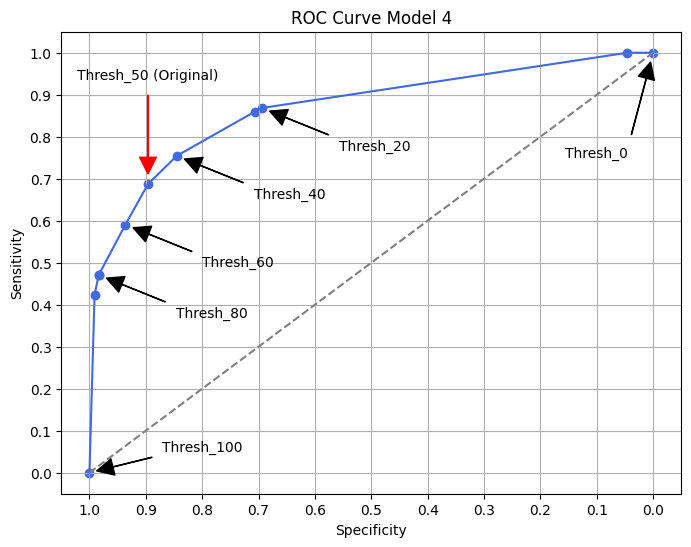

In [108]:
# Plot ROC Curve

# Plot size
plt.figure(figsize=(8,6))

# Location of data table
data_table = threshold_performance_metrics_model_4 

# Set X and Y
x_data = data_table['Specificity']
y_data = data_table['Sensitivity']

# Plot ROC curve
plt.plot(x_data,y_data, color = 'royalblue') # Plot as a line

# Plot as a scatter plot and apply labels to data points
# Format labels and arrows for clarity
plt.scatter(x_data, y_data, color = 'royalblue') 

# Plot data labels
labels = data_table.index # The threshold labels are in the dataframe index

for i, (x, y, label) in enumerate(zip(x_data, y_data, labels)):
    if i == 0: # Label first data point
        plt.annotate(label, (x, y), xytext=(x + 0.1, y - 0.25),  # Adjust offsets
              arrowprops=dict(facecolor='black', width = 0.2, shrink = 0.1), ha='center')
        
    elif i == 10: # Label last data point
        plt.annotate(label, (x, y), xytext=(x - 0.2, y + 0.05),  # Adjust offsets
              arrowprops=dict(facecolor='black', width = 0.2, shrink = 0.1), ha='center')
    
    elif i == 5: # Label the original data point (threshold 50%)
        plt.annotate(f"{label} (Original)", (x, y), xytext=(x, y + 0.25),  # Adjust offsets
              arrowprops=dict(color = 'red', width = 0.2, shrink = 0.1), ha='center')
    
    elif i%2 == 0: # Label data point when i is an even number
        plt.annotate(label, (x, y), xytext=(x - 0.2, y - 0.1),  # Adjust offsets
              arrowprops=dict(facecolor='black', width = 0.2, shrink = 0.1), ha='center')
        
    
# Plot Reference Curve
# This correspond to a classifier no better than random chance
plt.plot((1,0),(0,1), color= 'grey', linestyle='--')

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Model 4")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.show()

Let's understand what this plot is telling us. We see the blue ROC curve constructed with the individual data points shown along the curve, including our original data point (calculated at threshold 50%). For clarity, only the "even" points (so to speak) are labelled with the threshold. By convention, as we saw earlier, the Specificity (x-axis) is plotted in reverser order from 1 to 0.

The grey dashed line has been superimposed on the plot. In the reference book  [Practical Statistics for Data Scientists](https://www.google.co.uk/books/edition/Practical_Statistics_for_Data_Scientists/k2XcDwAAQBAJ?hl=en&gbpv=0), the authors explain that this line "corresponds to a classifier no better than random chance". The authors continue "[a]n extremely effective classifier... will have an ROC that hugs the upper-left corner - it will correctly identify lots of 1s without misclassifying lots of 0s as 1s."

So, looking at our plot above, purely from visual inspection, it looks as if the predictions calculated using a threshold of 40% result in a combination of sensitivity and specificity that is closest to the top-left corner (a perfect classifier). So did it perform better (on the training data set) than the original 50% threshold model? Let's do a quick calculation to explore this.

In [109]:
# Calculate nearest point to the top-left corner of the ROC plot.
# Find the point with the least straight-line distance.

df = threshold_calcs_model_4.copy() # Make explicit copy

for i in range(len(df)):    
    df['ROC_Dist'] = np.sqrt(((1.0 - df['Specificity']) ** 2) + ((1.0 - df['Sensitivity']) ** 2))

# View results
df


,Accuracy,Sensitivity,Specificity,ROC_Dist
Thresh_0,0.383838,1.000000,0.000000,1.000000
Thresh_10,0.411897,1.000000,0.045537,0.954463
Thresh_20,0.760943,0.868421,0.693989,0.333100
Thresh_30,0.765432,0.859649,0.706740,0.325115
Thresh_40,0.810325,0.754386,0.845173,0.290341
Thresh_50,0.815937,0.687135,0.896175,0.329643
Thresh_60,0.803591,0.590643,0.936248,0.414291
Thresh_70,0.786756,0.470760,0.983607,0.529494
Thresh_80,0.786756,0.470760,0.983607,0.529494
Thresh_90,0.773288,0.423977,0.990893,0.576095


Indeed we confirm that the data point for the 40% threshold is the closest to the top-left corner of the ROC plot, with an ROC_Dist of 0.29. So, we might expect this to give us better predictions. However, if we look at the accuracy of this 'Thresh_40' model, it is 81.0 %. And this value is just slightly less than the 81.6% accuracy of the 'Thresh_50' model, which happens to be slightly further away from the top-left corner (ROC_Dist 0.33). This seems rather counter intuitive?? 

The answer lies in the fact that, as explained earlier, 'accuracy' is a simple metric that just tells us the overall proportion of correct predictions. It doesn't distinguish between the types of errors (false positives vs. false negatives). So, while the 'Thresh_50' model scores higher in terms of overall 'accuracy' (perhaps by pure luck on this particular data set?), the 'Thresh_40' model is likely to provide the optimum balance in detecting true positives and true negatives, because of its closer proximity to the top-left corner of the ROC plot. Indeed, we shall verify this in due course.

Let's now overlay the plot of the ROC curve for Model 4 on to our 'accuracy' contour map that we created earlier.

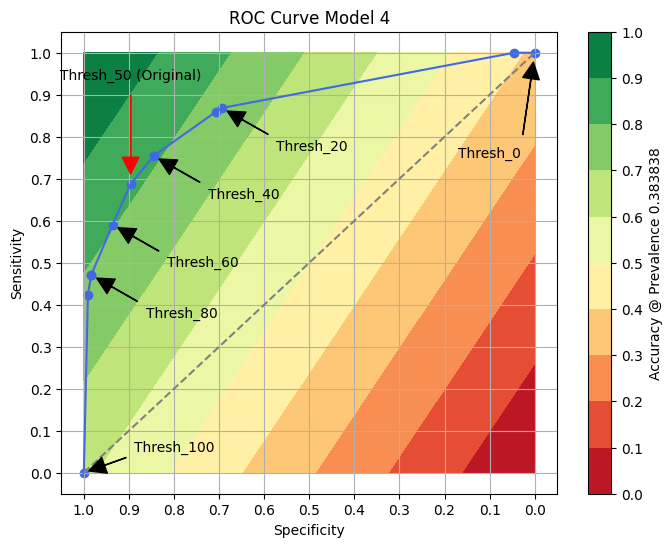

In [110]:
# Plot ROC Curve

# Plot size
plt.figure(figsize=(8,6))

# Plot contour map
levels = np.linspace(0,1,11) # Set number of contour levels
plt.contourf(specificity_range, sensitivity_range, accuracy_table, cmap='RdYlGn', levels = levels)
plt.colorbar(label=f"Accuracy @ Prevalence {prevalence}", ticks=np.arange(0, 1.1, 0.1))  # Add a colorbar for legend

# Location of data table
data_table = threshold_performance_metrics_model_4 

# Set X and Y
x_data = data_table['Specificity']
y_data = data_table['Sensitivity']

# Plot ROC curve
plt.plot(x_data,y_data, color = 'royalblue') # Plot as a line

# Plot as a scatter plot and apply labels to data points
# Format labels and arrows for clarity
plt.scatter(x_data, y_data, color = 'royalblue') 

# Plot data labels
labels = data_table.index # The threshold labels are in the dataframe index

for i, (x, y, label) in enumerate(zip(x_data, y_data, labels)):
    if i == 0: # Label first data point
        plt.annotate(label, (x, y), xytext=(x + 0.1, y - 0.25),  # Adjust offsets
              arrowprops=dict(facecolor='black', width = 0.2, shrink = 0.1), ha='center')
        
    elif i == 10: # Label last data point
        plt.annotate(label, (x, y), xytext=(x - 0.2, y + 0.05),  # Adjust offsets
              arrowprops=dict(facecolor='black', width = 0.2, shrink = 0.1), ha='center')
    
    elif i == 5: # Label the original data point (threshold 50%)
        plt.annotate(f"{label} (Original)", (x, y), xytext=(x, y + 0.25),  # Adjust offsets
              arrowprops=dict(color = 'red', width = 0.2, shrink = 0.1), ha='center')
    
    elif i%2 == 0: # Label data point when i is an even number
        plt.annotate(label, (x, y), xytext=(x - 0.2, y - 0.1),  # Adjust offsets
              arrowprops=dict(facecolor='black', width = 0.2, shrink = 0.1), ha='center')

    
# Plot Reference Curve
# This correspond to a classifier no better than random chance
plt.plot((1,0),(0,1), color= 'grey', linestyle='--')

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Model 4")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.show()

The above plot clearly shows that we expect to get the better 'accuracy' performance from Model 4 when it is configured to make survival predictions using either a threshold of 40% or a threshold of 50%. The accuracy values are very close for these two model configurations. Our earlier table showed these values to be 0.810325 (Thresh_40) and 0.815937 (Thresh_50), the latter model configuration being our "default" model.

So, at this stage, it might be worth revisiting our selection of metrics, and expanding these to include additional ways of assessing the model's performance. A key question is to examine is the overall 'accuracy' of predictions compared with the corresponding 'precision' of the results.

# Expanded Model Performance Metrics
We will now explore additonal model performance metrics, as suggested above. Let's view the extended table of metrics that has been calculated for Model 4. We need to split this into two table views, because there are too many columns to display for the page width.

In [111]:
# View extended set of model performance metrics

# Select required columns for metrics table
roc_columns = ['Accuracy', 'Prevalence', 'Sensitivity', 'Specificity','ROC_Dist']
prc_columns = ['Precision', 'Recall', 'PRC_Dist', 'F1_Score']
error_rates_columns = ['TPR', 'TNR', 'FPR', 'FNR']
error_matrix_columns = ['TP', 'TN', 'FP', 'FN', 'Tot_Act_Pos', 'Tot_Pred_Pos', 'Tot_Act_Neg', 'Tot_Pred_Neg', 'Total']

selected_columns = roc_columns + prc_columns + error_rates_columns

# Create new views using selected columns
thresh_metrics_model_4 = threshold_performance_metrics_model_4[selected_columns]
thresh_error_matrix_model_4 = threshold_performance_metrics_model_4[error_matrix_columns] # We output this in just a moment

# View dataframe
thresh_metrics_model_4

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Thresh_0,0.383838,0.383838,1.000000,0.000000,1.000000,0.383838,1.000000,0.616162,0.554745,1.000000,0.000000,1.000000,0.000000
Thresh_10,0.411897,0.383838,1.000000,0.045537,0.954463,0.394919,1.000000,0.605081,0.566225,1.000000,0.045537,0.954463,0.000000
Thresh_20,0.760943,0.383838,0.868421,0.693989,0.333100,0.638710,0.868421,0.384505,0.736059,0.868421,0.693989,0.306011,0.131579
Thresh_30,0.765432,0.383838,0.859649,0.706740,0.325115,0.646154,0.859649,0.380665,0.737767,0.859649,0.706740,0.293260,0.140351
Thresh_40,0.810325,0.383838,0.754386,0.845173,0.290341,0.752187,0.754386,0.348909,0.753285,0.754386,0.845173,0.154827,0.245614
Thresh_50,0.815937,0.383838,0.687135,0.896175,0.329643,0.804795,0.687135,0.368768,0.741325,0.687135,0.896175,0.103825,0.312865
Thresh_60,0.803591,0.383838,0.590643,0.936248,0.414291,0.852321,0.590643,0.435181,0.697755,0.590643,0.936248,0.063752,0.409357
Thresh_70,0.786756,0.383838,0.470760,0.983607,0.529494,0.947059,0.470760,0.531881,0.628906,0.470760,0.983607,0.016393,0.529240
Thresh_80,0.786756,0.383838,0.470760,0.983607,0.529494,0.947059,0.470760,0.531881,0.628906,0.470760,0.983607,0.016393,0.529240
Thresh_90,0.773288,0.383838,0.423977,0.990893,0.576095,0.966667,0.423977,0.576987,0.589431,0.423977,0.990893,0.009107,0.576023


And here are the corresponding error matrix columns.

In [112]:
# View table
thresh_error_matrix_model_4

,TP,TN,FP,FN,Tot_Act_Pos,Tot_Pred_Pos,Tot_Act_Neg,Tot_Pred_Neg,Total
Thresh_0,342,0,549,0,342,891,549,0,891
Thresh_10,342,25,524,0,342,866,549,25,891
Thresh_20,297,381,168,45,342,465,549,426,891
Thresh_30,294,388,161,48,342,455,549,436,891
Thresh_40,258,464,85,84,342,343,549,548,891
Thresh_50,235,492,57,107,342,292,549,599,891
Thresh_60,202,514,35,140,342,237,549,654,891
Thresh_70,161,540,9,181,342,170,549,721,891
Thresh_80,161,540,9,181,342,170,549,721,891
Thresh_90,145,544,5,197,342,150,549,741,891


So now we have generated an expanded set of performance metrics for Model 4 using a range of thresholds. The first thing to observe is that some of the columns are repetitive. For example, the 'Recall', 'Sensitivity' and 'TPR' columns are exactly the same. Likewise for the 'Specificity' and 'TNR' columns. It's just a question of prefered terminology. The purpose here was to offer some clarity, especially when different reference books use the terms interchangeably.

Thus, we see our original metrics that we have been considering up until now:
* Accuracy: simply the percentage of *correct* predictions (true positives and true negatives) relative to the total number of passengers.
* Prevalence: the proportion of actual positve cases in the total population (constant for a given data set)
* Sensitivity: the percentage of true survivors that are correctly predicted.
* Specificity: the percentage of true non-survivors that are correctly predicted.
* ROC Distance: the closeness of a data point on an ROC plot to the ideal scenario of perfect sensitivity and specificity (top-left corner of the ROC plot).

Then we see that we have introduced a couple of new metrics of interest, which we will discuss in just a moment:
* Precision: the proportion of predicted positive cases that were actually positive.
* Recall: same as Sensitivity, just different terminology.
* PRC Distance : The closeness of a specific data point on an PRC plot to the ideal scenario of perfect precision and recall (top-right corner of the PRC plot).
* F1 Score: the harmonic mean of precision and recall (sensitivity). It addresses a shortcoming of using just accuracy by aiming to balance between precision and recall.

Then, for completeness, the other metrics in the table are:
* True Positive Rate (TPR): The proportion of actual positive cases that were correctly identified. Same as 'Recall' and 'Sensitivity'. Also known as 'Hit Rate'.
* True Negative Rate (TNR): The proportion of actual negative cases that were correctly identified. Same as "Specificity'.
* False Positive Rate (FPR): The proportion of actual negative cases that were incorrectly classified as positive. Also known as 'Type I Error' or 'Fall-out'.
* False Negative Rate (FNR): The proportion of actual positive cases that were incorrectly classified as negative. Also known as 'Type II Error' or 'Miss Rate'.

Finally, the remaining columns in the table come directly from the error matrix (confusion matrix):

* Number of True Positives: the number of cases where true survivors were correctly predicted.
* Number of True Negatives: the number of cases where true non-survivors were correctly predicted.
* Number of False Positives: the number of cases where predicted survivors actually perished.
* Number of False Negatives: the number of cases where predicted non-survivors actually survived.

And the corresponding totals from the error matrix:
* Total Actual Positives: total number of actual survivors in the data set (a constant value).
* Total Predicted Positives: total number of passengers in the data set predicted to survive (depending on threshold value).
* Total Actual Negatives: total number of passengers in the data set that actually perished (a constant value).
* Total Predicted Negatives: total number of passengers in the data set predicted to perish (depending on threshold value).


# Precision-Recall (PR) Curve

So, picking up on our previous analysis, we found that the 'Thresh_40' model had the minimum 'ROC_Dist' value of 0.29, and a corresponding 'Accuracy' of 81.0%. Contrast this to the orginal 'Thresh_50' model which had a higher 'Accuracy' of 81.6%, but its 'ROC_Dist' was slightly further away at a position of 0.33. We expected the Thesh_40 model to be more "accurate" because of its closer proximity to the top-left corner of the ROC curve. So, this tends to suggest that 'Accuracy' is not really a reliable metric in terms of indicating the 'quality' of the predictions.

Another metric we might consider is the 'precision' of model predictions. This is the proportion of predicted positive cases that were actually positive. It is calculated as follows:

> **Precision = TP / Tot_Predict_Pos**

The precision value for Thresh_40 is 75.2%, while the value for Thresh_50 is 80.5%, which is higher. Indeed, the precision continues to increase for increasing thresholds. This is expected because as the threshold becomes more 'strict' in its decision for survival classification, the more 'precise' the predictions for survival become. For example, at a threshold of 90%, the number of predicted survivors has dropped to 150 (Tot_Pred_Pos) because of the tighter rules, and of these predicted positives a total of 145 (Tot_Pos) turned out to be correct. In other words, the number of false positives (False_Pos) dropped to just 5, thus yielding an overall precision of 96.7%. However, such a level of precision comes at the expense of an increasing number false negatives. Here, we see that 197 (False_Neg) passengers were incorrectly classified as non-survivors, when indeed they actually survived. The overall result was that we predicted 741 (Tot_Pred_Neg) deaths, which is far more than the actual figure of 549 (Tot_Act_Neg). 

So, what is the practical application of assessing the 'precision' of a model algorithm? The literature (Gemini) reveals that in certain use cases, false positives are highly costly. For example, in medical diagnosis. a false positive for a serious disease can lead to unnecessary worry, invasive procedures, and additional costs. Here, a doctor would prioritize a test with high precision to ensure a positive result truly indicates the disease. Another use case is when the total number of positive cases in the data set is low (known as the 'rare class problem' caused by imbalanced data). An example here is in fraud detection, where fraudulent transactions are a small fraction of all transactions. A model with high precision ensures most flagged transactions are truly fraudulent, even if it misses some actual fraud (false negatives). The problem is that a high precision model in this case might turn out to be expensive, because it misses some fraud cases. So, it rather becomes a balancing act between the precision, and the cost of letting a few fraud cases slip through the net. (Further reading: 'The Rare Class Problem' in the book [Practical Statistics for Data Scientists](https://www.google.co.uk/books/edition/Practical_Statistics_for_Data_Scientists/k2XcDwAAQBAJ?hl=en&gbpv=0) on page 223).

Getting back to our own analysis, we can now recognise that 'precision' alone does not fully characterise the 'quality' of model performance. We are seeking balance between the number of true positives and the number of true negatives predicted by the model, as well as trying to reduce the number of false positives and false negatives. We know that we are unable to use 'accuracy' as an indicator of 'quality', because it is not sufficiently fine-grained in its calculation. We then looked at the ROC curve, which considered the inter-relationship between sensitivity and specificity, and deduced that for Model 4 a survival threshold of 40% looked to be the highest performer "on paper" in terms of the 'balance' and 'quality' of its predictions, with its ROC data point being closest to the top-left corner of the curve, confirmed by measuring the ROC_Dist. 

So, rather than use the 'precision' metric on its own, it turns out we may also plot a curve of 'precision' versus 'sensitivity', rather like our ROC curve that plots 'specificity' versus 'sensitivity'. However, just to confuse things, our terminology now switches. We use the term 'recall' instead of 'sensitivity', and the resulting plot is called a 'Precision-Recall Curve (PRC)'. 

What additional benefit does a PRC plot provide us with? Our reference [book](https://www.google.co.uk/books/edition/Practical_Statistics_for_Data_Scientists/k2XcDwAAQBAJ?hl=en&gbpv=0) (page 226) suggests that "[i]n addition to ROC curves, it can be illuminating to examine the precision-recall (PR) curve". The book points to this [research paper](https://www.biostat.wisc.edu/~page/rocpr.pdf) that discusses "the relationship between Precision-Recall and ROC curves", indicating that "when dealing with highly skewed datasets, Precision-Recall (PR) curves give a more informative picture of an algorithm’s performance". Whether our Titanic data set may be considered highly skewed may be debatable. Regardless, let's generate the PR curve and take a look. The code to generate the curve is in the hidden cell below.

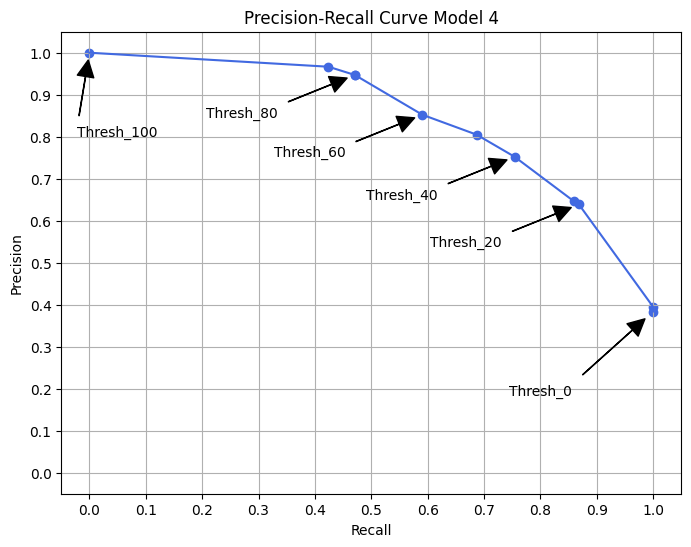

In [113]:
# Plot PR Curve

# Plot size
plt.figure(figsize=(8,6))

# Location of data table
data_table = threshold_performance_metrics_model_4

# Set X and Y
x_data = data_table['Recall']
y_data = data_table['Precision']

# Plot ROC curve
plt.plot(x_data,y_data, color = 'royalblue') # Plot as a line

# Plot as a scatter plot and apply labels to data points
# Format labels and arrows for clarity
plt.scatter(x_data, y_data, color = 'royalblue') 
labels = data_table.index # The threshold labels are in the dataframe index

for i, (x, y, label) in enumerate(zip(x_data, y_data, labels)):
    if i == 0: # Label first data point
        plt.annotate(label, (x, y), xytext=(x  - 0.2, y - 0.2),  # Adjust offsets
              arrowprops=dict(facecolor='black', width = 0.2, shrink = 0.1), ha='center')
        
    elif i == 10: # Label last data point
        plt.annotate(label, (x, y), xytext=(x + 0.05, y - 0.2),  # Adjust offsets
              arrowprops=dict(facecolor='black', width = 0.2, shrink = 0.1), ha='center')
    
    elif i%2 == 0: # Label data point when i is an even number
        plt.annotate(label, (x, y), xytext=(x - 0.2, y - 0.1),  # Adjust offsets
              arrowprops=dict(facecolor='black', width = 0.2, shrink = 0.1), ha='center')

    
# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(-0.05, 1.05) 
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("Precision-Recall Curve Model 4")
plt.xlabel("Recall")
plt.ylabel("Precision")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.show()

The PRC plot for Model 4 may be interpreted in a similar way to the ROC plot previously. By visual inpsection we again see that the Thresh_40 model looks as if it may be the closest of our calculated points to the "ideal" point where both 'precision' and 'recall' are equal to 1. On the PRC plot this point is at the top-right corner of the grid (rather than top-left as we saw with the ROC curve). Again, to confirm that the Thresh_40 model is nearest, we may calculate the distance. Indeed, in our table of metrics that we produced above, there is a column for 'PRC_Dist". Here we see that Thresh_40 has the minimum value of PRC_Dist at 0.349, confirming our findings from the earlier ROC plot where the calcuated ROC_Dist for the Thresh_40 was also at a minimum compared with the other thresholds.

Now, while we are on the subject of 'precision' and 'recall', there is another metric we may calculate. This is called the 'F1 Score', which we now introduce.

# F1 Scores

In our metrics table above, we see a column holding values for the calculated "F1 Score" for each model threshold. This score is derived from the 'harmonic mean' of precision and recall (sensitivity). It is calculated as follows:

> **F1 Score = 2 * (Precision * Recall) / (Precision + Recall)**

So the metric considers both the 'precision' (ie, how many cases labeled as positive were actually positive) and the 'recall' (a reflection of  the model's ability to catch all the actual positive cases) together at the same time. Remember above that the problem with high precision alone is that we risk a large number of false negatives (ie, cases that should be positive). The F1 Score redresses this by also considering how well the model captures those positive cases by incorporating the model's recall.

Let's look at the F1 Score for the "Thresh_40" model. It has a score of 75.3%, which is the highest ranking score in the column. Our original "Thresh_50" model came in with an F1 score of 74.1%, slighly lower. So, it appears that the F1 score is producing results that are now consistent with what we observed on the ROC curve and the PRC curve. We premised that the Thresh_40 model should be the highest 'quality' performer based on having the minimum values for ROC_Dist and PRC_Dist. The F1 score confirms this, and quite frankly it was not too surprising considering that the F1 score derived from the same underlying metrics ('precision' and 'recall') as the PRC_Dist. Perhaps the advantage of the F1 Score over our custom-built metrics 'ROC_Dist' and 'PRC_Dist' is that we are trying to 'maximise' this score (make it larger), which seems a more natural way of thinking about model performance. With ROC_Dist and PRC_Dist we are seeking to 'minimise' these values. Consequently it makes sense that from now on we simply think in terms of using the F1 Score as our primary measure. Indeed, it is a common, standard way of judging a model's performance in terms of 'balance' and 'quality'. 

Now let's examine the table results a little more closely. Our Thresh_40 model comes out tops with an ROC_Dist of 0.29, a PRC_Dist of 0.349 and an F1 score of 74.1%. Now if we just scan across the columns and look at the error matrix (output below), we see some quite remarkable results. The total predicted positive cases were 343, compared with actual positive cases being 342. And the total predicted negative cases were 548, compared with actual postive cases being 549. So, it seems we were almost spot on with the 'quality' of our predictions! However, we succumed to a roughly equal amount of false positives (85) and false negatives (84), hence we did not achieve a near-perfect prediction score overall (and our F1 score shows this).



In [114]:
# View table
thresh_error_matrix_model_4

,TP,TN,FP,FN,Tot_Act_Pos,Tot_Pred_Pos,Tot_Act_Neg,Tot_Pred_Neg,Total
Thresh_0,342,0,549,0,342,891,549,0,891
Thresh_10,342,25,524,0,342,866,549,25,891
Thresh_20,297,381,168,45,342,465,549,426,891
Thresh_30,294,388,161,48,342,455,549,436,891
Thresh_40,258,464,85,84,342,343,549,548,891
Thresh_50,235,492,57,107,342,292,549,599,891
Thresh_60,202,514,35,140,342,237,549,654,891
Thresh_70,161,540,9,181,342,170,549,721,891
Thresh_80,161,540,9,181,342,170,549,721,891
Thresh_90,145,544,5,197,342,150,549,741,891


Notwithstanding the above, however, it is the model's 'accuracy' that remains the key metric for determining its final public score in the Titanic competition.

# Model 4_T40 : Random Forest (Threshold 40%)
Okay, for the sake of completeness, let's now run Model 4 (Threshold 40%) against the test dat set and submit our predictions to the competition to get our public score.

First copy the preliminary Thresh_40 predictions made against the *training* data to our main score card (for later comparison with other models).

In [115]:
# Add the preliminary Thresh_40 predictions to our main score card (for later comparison with other models)
model_name = 'Model_04_T40'
predictions = thresh_predict_model_4['Thresh_40']
score_card.insert(6, model_name, predictions) # Insert new column at index position 6.

# Then recalculate the model score, adding it to the model_scores dictionary
model_scores[model_name] = check_score(model_name, score_card)
model_scores = dict(sorted(model_scores.items())) # Sort the dictionary by keys (just because we can!)

Now let's caclulate the probabilities of survival using Model 4 against the *test* data set.

In [116]:
# Calculate probabilities of survival using Model 4 against the *test* data set

# Model 4
model_name = 'Model_04'
features = ["Pclass", "Sex", "SibSp", "Parch"]

# Calculate probabilities using the function we defined earlier
probs_model_4_test_data = get_random_forest_probs(features, train_data, test_data)

# View results
probs_model_4_test_data

,PassengerId,Predict_Survived,Prob_False,Prob_True
0,892,0,0.879821,0.120179
1,893,1,0.463514,0.536486
2,894,0,0.885587,0.114413
3,895,0,0.879821,0.120179
4,896,1,0.478645,0.521355
...,...,...,...,...
413,1305,0,0.879821,0.120179
414,1306,1,0.038619,0.961381
415,1307,0,0.879821,0.120179
416,1308,0,0.879821,0.120179


We will now calculate the passenger survival predictions based on using a 40% threshold, instead of the default 50% threshold.

In [117]:
# Define function to calculate passenger survival for a single threshold
def get_survival_for_threshold (model_probs, threshold_input):
    
    # Set up new table
    # Grab the PassengerId and Prob_True columns from the calculated probabilities table
    threshold_predictions = model_probs[['PassengerId', 'Prob_True']].copy()
    
    # Caclulate passenger survival based on specified threshold
    # Initialise new column
    new_col_name = f"Thresh_{threshold_input}"
    threshold_predictions[new_col_name] = 0 # Set all values in column to zero
    for i in range (len(threshold_predictions)):
        if threshold_predictions.loc[i, 'Prob_True'] >= threshold_input/100:
            threshold_predictions.loc[i, new_col_name] = 1
                
    return threshold_predictions

In [118]:
# Calculate model predictions for desired threshold value (percentage)
model_4_t40_predictions = get_survival_for_threshold (probs_model_4_test_data, 40) # Specify 40% threshold

# View table
model_4_t40_predictions

,PassengerId,Prob_True,Thresh_40
0,892,0.120179,0
1,893,0.536486,1
2,894,0.114413,0
3,895,0.120179,0
4,896,0.521355,1
...,...,...,...
413,1305,0.120179,0
414,1306,0.961381,1
415,1307,0.120179,0
416,1308,0.120179,0


In [119]:
# Prepare submission file
output = model_4_t40_predictions[['PassengerId', 'Thresh_40']].rename(columns={'Thresh_40': 'Survived'})

# Save the predicted data to a csv file ready for submission
output.to_csv('submission_model_04_t40.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


Okay. The Public score for Model 4 (40% threshold) was 0.75358. As expected, this score is lower than for our original Model 4 (with the default 50% threshold) scored 0.77511. So that's a drop in 'accuracy' performance!

In [120]:
# Add public score to public scores dictionary
model_name = 'Model_04_T40'
public_scores[model_name] = 0.75358
public_scores = dict(sorted(public_scores.items())) # Sort

# Add preliminary and public scores to score_comparison table
prelim_score = model_scores[model_name]
public_score = public_scores [model_name]
score_comparison.loc[model_name] = {'Preliminary': prelim_score, 'Public': public_score}
score_comparison = score_comparison.sort_index()

# View table
score_comparison

,Preliminary,Public
Model_01,0.616162,0.62200
Model_02,0.786756,0.76555
Model_03,0.719416,0.71052
Model_04,0.815937,0.77511
Model_04_T40,0.810325,0.75358
Model_05,0.813692,0.77511
Model_06,0.797980,0.74880


# Interpreting Model Performance
At this stage, it is worth reminding ourselves what the scores in the table above represent. Both the 'preliminary' score and the 'public' score are measures of 'accuracy'. Let's take a closer look at the preliminary 'accuracy' scores in the context of our set of expanded performance metrics for all of the candidate models.

In [121]:
# View extended performance metrics for all submitted models.

# List model names. Grab from score comparison table.
model_names = score_comparison.index

# Location of model predictions
model_predictions = score_card
    
# Initialise a new dictionary to capture the performance metrics
candidate_model_performance_metrics_dict ={}
    
# Generate metrics using our new expanded function
for model_name in model_names:
    performance_metrics = get_performance_metrics(model_name, get_error_matrix(model_name, model_predictions))
    
    # Append the returned performance metrics for each iteration to the main dictionary
    candidate_model_performance_metrics_dict.update(performance_metrics)
    
# Create dataframe from the main dictionary
candidate_model_performance_metrics = pd.DataFrame.from_dict(candidate_model_performance_metrics_dict, orient='index')

# Select required columns for metrics table
roc_columns = ['Accuracy', 'Prevalence', 'Sensitivity', 'Specificity','ROC_Dist']
prc_columns = ['Precision', 'Recall', 'PRC_Dist', 'F1_Score']
error_rates_columns = ['TPR', 'TNR', 'FPR', 'FNR']
error_matrix_columns = ['TP', 'TN', 'FP', 'FN', 'Tot_Act_Pos', 'Tot_Pred_Pos', 'Tot_Act_Neg', 'Tot_Pred_Neg', 'Total']

selected_columns = roc_columns + prc_columns + error_rates_columns

# View data
candidate_model_performance_metrics[selected_columns]

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Model_01,0.616162,0.383838,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
Model_02,0.786756,0.383838,0.681287,0.852459,0.351207,0.742038,0.681287,0.410027,0.710366,0.681287,0.852459,0.147541,0.318713
Model_03,0.719416,0.383838,0.769006,0.688525,0.387782,0.605991,0.769006,0.456729,0.677835,0.769006,0.688525,0.311475,0.230994
Model_04,0.815937,0.383838,0.687135,0.896175,0.329643,0.804795,0.687135,0.368768,0.741325,0.687135,0.896175,0.103825,0.312865
Model_04_T40,0.810325,0.383838,0.754386,0.845173,0.290341,0.752187,0.754386,0.348909,0.753285,0.754386,0.845173,0.154827,0.245614
Model_05,0.813692,0.383838,0.681287,0.896175,0.335198,0.803448,0.681287,0.374447,0.737342,0.681287,0.896175,0.103825,0.318713
Model_06,0.797980,0.383838,0.646199,0.892532,0.369763,0.789286,0.646199,0.411796,0.710611,0.646199,0.892532,0.107468,0.353801


A quick recap on our approach. Earlier we plotted the ROC curve for our Model 4 using a range of probability thresholds to calculate a selection of data points (specificity - sensitivity pairs) along the line. We then analysed this curve to determine at which threshold would we expect to get the best overall 'balanced' performance. We found that the model "Thresh_40" (40% threshold) appeared to be the top candidate in that it should provide an optimum balance of the true positive rate (sensitivity) and the true negative rate (specificity). We then conducted further analysis using the metrics of 'precision' and 'recall' (aka 'sensitivity') to judge model performance using the PRC curve and the derived 'F1 Score'. Again, the "Thresh_40" model came out tops in terms of likely optimal 'quality' performance.

Now, that may have been all well and good if the Kaggle competition was making its assessment of submissions based on, say, the F1 score. However, it is using 'accuracy' as its measure. In which case, while our competion predictions might be deemed to be 'accurate', they would not necessariy be very 'precise' in terms of quality.

Yet, all that being said, it raises the wider question of how we should interpet model performance in practice. The quick answer is: "it depends on our use case". So far we have focused on choosing between either a high 'accuracy' (a crude method) or an 'optimal balance' (a more refined method). In the latter case, this balance respresents the trade-off between sensitivity and specificity on the one hand, and the trade-off between precision and recall on the other. But there may be a practical reason to choose an alternative threshold (or cutoff) value along the ROC curve or the PRC curve, rather than our so-called optimum. For example, this article [The ROC Curve: Application and Interpretation in the Health Context](https://medium.com/@evertongomede/the-roc-curve-application-and-interpretation-in-the-health-context-cc06af05a6ec) by Everton Gomede, PhD describes how "[t]he ROC curve can help identify the optimal threshold for a diagnostic test. Depending on the specific clinical scenario, healthcare providers can choose a threshold that maximizes sensitivity, specificity, or a combination of both, depending on the clinical priorities". So, it's not always a simple matter of choosing the model that provides highest 'accuracy' or the most 'optimal balance'. Context matters!

Anyway, let's continue to perform our analysis, and see what other characteristics we may extract from the modelling of the data.

# Comparison of ROC Curves
So far we have focussed our attention on interpreting the ROC curve for Model 4, calculated using different thresholds. Now we turn to comparing the ROC curves for all of our models so far.

Models 1, 2 and 3 were those models where we applied a "simple" classification algorithm, namely "Nobody Survived" (Model 1), "All Females Survived, All Males Died" (Model 2) and "Women and Children First" (Model 3). Essentially these models categorised the data using a single feature. Whereas Models 4, 5 and 6 used a random forest classifier to create models based on different selections of multiple features. 

As we have already seen with Model 4, the random forest classifer allows us to extract 'probabilities' of survival for each passenger, and assign a corresponding binary prediction (1 = survived, 0 = perished) dependent on the threshold (or cutoff). The default threshold is 50%. By varying the threshold, we may re-assign these binary predictions depending on whether the probabilities for survival are greater than or less than each new threshold. By doing this, we then calculate the 'sensitivity' and 'specificity' of the model at each threshold, and thereby construct an ROC curve from the results.

However, for Models 1, 2 and 3, we do not have an obvious way to extract an equivalent set of probabilities for survival. As we have seen, for each of these models we can only calculate a 'single' data point on an ROC curve. In other words, it seems for now that we can only derive a single value pair of the 'sensitivity' and 'specificity' for each of these simple models (but we shall revisit this later on in our analysis).

With this is mind, let's construct a plot to show a comparison of our models. 

The 'single point' data for Models 1, 2 and 3 may be extracted straight from the table we generated earlier. For Models 4, 5 and 6, we need to extract the probabilites for each model, then calculate the 'sensitivity' and 'specificity' at a range of thresholds. We have already done this for Model 4. Let's do the same for Models 5 and 6. Here, we will define a new helper function (shown in the hidden cell below).

In [122]:
# Define function to get ROC data and other metrics for random forest model

def get_roc_data(model_name, features_input, train_data_input, test_data_input, thresh_range_input):

    # Calculate probabilities using exisitng function
    probs_model = get_random_forest_probs(features_input, train_data_input, test_data_input)

    # Add the Actual Survival data to the table
    probs_model['Actual'] = train_data_input.Survived

    # Calculate model predictions for a range of thresholds
    model_predictions = get_survival_for_threshold_range (probs_model, thresh_range_input)

    # Select columns which will represent our model names for each threshold
    model_names = list(model_predictions.columns[3:]) # Grab column names from index 3 onwards
    
    # Initialise a new dictionary to capture the performance metrics
    thresh_performance_metrics_dict ={}
    
    # Generate metrics using our new expanded function
    for model_name in model_names:
        performance_metrics = get_performance_metrics(model_name, get_error_matrix(model_name, model_predictions))
    
        # Append the returned performance metrics for each iteration to the main dictionary
        thresh_performance_metrics_dict.update(performance_metrics)
    
    # Create dataframe from the main dictionary
    threshold_performance_metrics = pd.DataFrame.from_dict(thresh_performance_metrics_dict, orient='index')

    return threshold_performance_metrics



In [123]:
# Model 5
model_name = 'Model_05'
features = ["Pclass", "Sex", "Family_size"]
thresh_range = (0, 110, 10) # From 0 to 100 in steps of 10%
threshold_performance_metrics_model_5 = get_roc_data(model_name, features, train_data, train_data, thresh_range) # We are testing against the training data

# View results
threshold_performance_metrics_model_5[selected_columns] # We defined the selected_columns list earlier

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Thresh_0,0.383838,0.383838,1.000000,0.000000,1.000000,0.383838,1.000000,0.616162,0.554745,1.000000,0.000000,1.000000,0.000000
Thresh_10,0.445567,0.383838,0.997076,0.102004,0.898001,0.408873,0.997076,0.591134,0.579932,0.997076,0.102004,0.897996,0.002924
Thresh_20,0.759820,0.383838,0.865497,0.693989,0.334266,0.637931,0.865497,0.386245,0.734491,0.865497,0.693989,0.306011,0.134503
Thresh_30,0.760943,0.383838,0.862573,0.697632,0.332133,0.639913,0.862573,0.385420,0.734745,0.862573,0.697632,0.302368,0.137427
Thresh_40,0.811448,0.383838,0.719298,0.868852,0.309828,0.773585,0.719298,0.360635,0.745455,0.719298,0.868852,0.131148,0.280702
Thresh_50,0.813692,0.383838,0.681287,0.896175,0.335198,0.803448,0.681287,0.374447,0.737342,0.681287,0.896175,0.103825,0.318713
Thresh_60,0.810325,0.383838,0.602339,0.939891,0.402178,0.861925,0.602339,0.420950,0.709122,0.602339,0.939891,0.060109,0.397661
Thresh_70,0.794613,0.383838,0.488304,0.985428,0.511903,0.954286,0.488304,0.513734,0.646035,0.488304,0.985428,0.014572,0.511696
Thresh_80,0.794613,0.383838,0.488304,0.985428,0.511903,0.954286,0.488304,0.513734,0.646035,0.488304,0.985428,0.014572,0.511696
Thresh_90,0.786756,0.383838,0.464912,0.987250,0.535240,0.957831,0.464912,0.536747,0.625984,0.464912,0.987250,0.012750,0.535088


In [124]:
# Model 6
model_name = 'Model_06'
features = ["Pclass", "Family_size", "IsWoCh"]
thresh_range = (0, 110, 10) # From 0 to 100 in steps of 10%
threshold_performance_metrics_model_6 = get_roc_data(model_name, features, train_data, train_data, thresh_range) # We are testing against the training data

# View results
threshold_performance_metrics_model_6[selected_columns] # We defined the selected_columns list earlier

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Thresh_0,0.383838,0.383838,1.000000,0.000000,1.000000,0.383838,1.000000,0.616162,0.554745,1.000000,0.000000,1.000000,0.000000
Thresh_10,0.615039,0.383838,0.964912,0.397086,0.603935,0.499244,0.964912,0.501984,0.658026,0.964912,0.397086,0.602914,0.035088
Thresh_20,0.719416,0.383838,0.903509,0.604736,0.406871,0.587452,0.903509,0.423682,0.711982,0.903509,0.604736,0.395264,0.096491
Thresh_30,0.742985,0.383838,0.871345,0.663024,0.360701,0.616977,0.871345,0.404053,0.722424,0.871345,0.663024,0.336976,0.128655
Thresh_40,0.793490,0.383838,0.681287,0.863388,0.346758,0.756494,0.681287,0.401091,0.716923,0.681287,0.863388,0.136612,0.318713
Thresh_50,0.797980,0.383838,0.646199,0.892532,0.369763,0.789286,0.646199,0.411796,0.710611,0.646199,0.892532,0.107468,0.353801
Thresh_60,0.792368,0.383838,0.538012,0.950820,0.464599,0.872038,0.538012,0.479382,0.665461,0.538012,0.950820,0.049180,0.461988
Thresh_70,0.789001,0.383838,0.523392,0.954463,0.478779,0.877451,0.523392,0.492111,0.655678,0.523392,0.954463,0.045537,0.476608
Thresh_80,0.763187,0.383838,0.418129,0.978142,0.582282,0.922581,0.418129,0.586999,0.575453,0.418129,0.978142,0.021858,0.581871
Thresh_90,0.721661,0.383838,0.286550,0.992714,0.713487,0.960784,0.286550,0.714527,0.441441,0.286550,0.992714,0.007286,0.713450


Now let's generate the ROC Comparison plot. Models 4, 5 and 6 are now shown as ROC curves, while Models 1, 2 and 3 remain as single data points (for now).

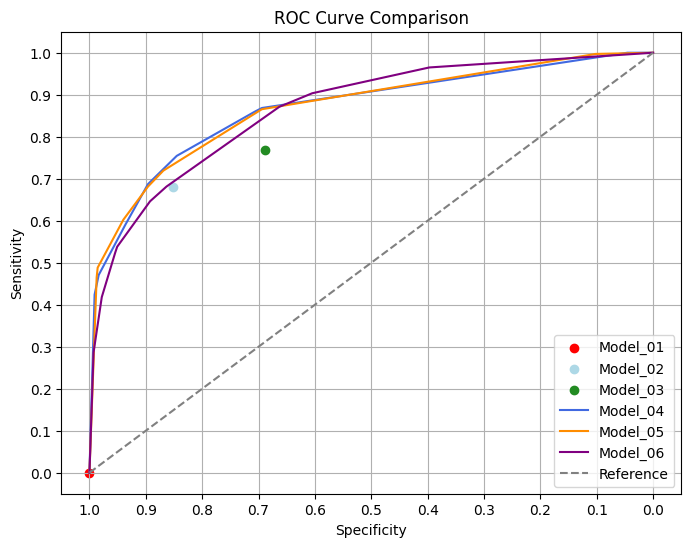

In [125]:
# ROC Comparison Plot

# Configure the plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Location of data (multiple tables)

x_data_model_1 = model_performance_metrics.loc['Model_01','Specificity']
y_data_model_1 = model_performance_metrics.loc['Model_01','Sensitivity']

x_data_model_2 = model_performance_metrics.loc['Model_02','Specificity']
y_data_model_2 = model_performance_metrics.loc['Model_02','Sensitivity']

x_data_model_3 = model_performance_metrics.loc['Model_03','Specificity']
y_data_model_3 = model_performance_metrics.loc['Model_03','Sensitivity']

x_data_model_4 = threshold_performance_metrics_model_4['Specificity']
y_data_model_4 = threshold_performance_metrics_model_4['Sensitivity']

x_data_model_5 = threshold_performance_metrics_model_5['Specificity']
y_data_model_5 = threshold_performance_metrics_model_5['Sensitivity']

x_data_model_6 = threshold_performance_metrics_model_6['Specificity']
y_data_model_6 = threshold_performance_metrics_model_6['Sensitivity']


# Plot data
plt.scatter(x_data_model_1, y_data_model_1, color = 'red', label = "Model_01") # Single data point
plt.scatter(x_data_model_2, y_data_model_2, color = 'lightblue', label = "Model_02") # Single data point
plt.scatter(x_data_model_3, y_data_model_3, color = 'forestgreen', label = "Model_03") # Single data point
plt.plot(x_data_model_4,y_data_model_4, color = 'royalblue', label = "Model_04") # Plot as a line
plt.plot(x_data_model_5,y_data_model_5, color = 'darkorange', label = "Model_05") # Plot as a line
plt.plot(x_data_model_6,y_data_model_6, color = 'purple', label = "Model_06") # Plot as a line

# Plot Reference Curve
# This correspond to a classifier no better than random chance
plt.plot((1,0),(0,1), color= 'grey', linestyle='--', label = "Reference")

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

## Generate ROC Curves using Scikit Learn Metrics Function
Up until now we have been using our own functions (built from scratch) to generate ROC curves. The purpose of this was to get a detailed appreciation of the various calculations required, and a better understanding of how to interpret the associated model performance metrics.

Fortunately, the Scikit Learn library provides a wealth of in-built modules and functions for machine learning using Python. These includes the [sklearn.metrics](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) module that contains numerous score functions, performance metrics, etc to help evaluate ML models. We shall now use the metrics.roc_curve function to generate one of our curves to see how it compares.

In [126]:
# Import the roc_curve function
# from sklearn.metrics import roc_curve

# Use Model 4 as an example

# Grab the actual (ground truth) survival data and calculated probabilities from a table we created earlier
y_true = probs_model_4['Actual']
y_proba_true = probs_model_4['Prob_True']

# Calculate the ROC curve data using the Scikit Learn function
fpr, tpr, thresholds = roc_curve(y_true, y_proba_true)

# Create a table to store the returned data
roc_model_4 = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 
                                'thresholds': thresholds,})
# View the data
roc_model_4

,fpr,tpr,thresholds
0,0.000000,0.000000,1.971918
1,0.000000,0.029240,0.971918
2,0.000000,0.032164,0.968875
3,0.000000,0.116959,0.966443
4,0.001821,0.213450,0.961381
...,...,...,...
58,0.954463,1.000000,0.105616
59,0.965392,1.000000,0.085639
60,0.979964,1.000000,0.063876
61,0.996357,1.000000,0.062552


As we can see, the Scikit Learn metrics roc_curve function returns calculated valus for 'fpr' (false postive rate) and 'tpr' (true positive rate) at a variety of thresholds. So, first question, how does this relate to what we saw previously with our own hand-built functions?

Our own function calculated 'Sensitivity' and 'Specificity' for each threshold. The Scikit Learn function essentially uses different terminology, where:
* TPR = True Positive Rate = Sensitivity
* FPR = False Postive Rate = 1 - TNR (True Negative Rate) = 1 - Specificity

As for the threshold values, these seem rather 'random' in the table above. Previously we 'hard-coded' our own calculations to use a range of thresholds from 0 to 100% in steps of 10%. The Scikit Learn function handles this another way. It decides which thresholds to use based on the supplied series of probabilities (y_proba_true). So, if we take a quick peek at the table containing the probabilites, we will see corresponding values (as shown below). So, the Scikit Learn function simply grabs the series of unique probabilities and performs its calculation of tpr and fpr at each of these thresholds. Finally, it automatically adds a starting point at the beginning of the series for fpr = 0 and tpr = 0 to ensure the curve is closed (so to speak) at the bottom-left corner of the ROC plot.

In [127]:
# List probabilites from our supplied table in descending order
# probs_model_4['Prob_True'].sort_values(ascending=False)

# List unique probabilites from the table in descending order
unique_values = sorted(probs_model_4['Prob_True'].unique(), reverse=True)

# Create a new DataFrame with sorted unique values
df_unique = pd.DataFrame({'unique_values': unique_values})

# View
df_unique

,unique_values
0,0.971918
1,0.968875
2,0.966443
3,0.961381
4,0.954420
...,...
67,0.092370
68,0.085639
69,0.063876
70,0.062552


So, let's now add some columns to the roc_data table to prepare the data for plotting.

In [128]:
# Add column named 'Sensitivity'
roc_model_4['Sensitivity'] = roc_model_4['tpr']

# Caclulate columns for 'Specificity'
roc_model_4['Specificity'] = 1 - roc_model_4['fpr']

#View table
roc_model_4

,fpr,tpr,thresholds,Sensitivity,Specificity
0,0.000000,0.000000,1.971918,0.000000,1.000000
1,0.000000,0.029240,0.971918,0.029240,1.000000
2,0.000000,0.032164,0.968875,0.032164,1.000000
3,0.000000,0.116959,0.966443,0.116959,1.000000
4,0.001821,0.213450,0.961381,0.213450,0.998179
...,...,...,...,...,...
58,0.954463,1.000000,0.105616,1.000000,0.045537
59,0.965392,1.000000,0.085639,1.000000,0.034608
60,0.979964,1.000000,0.063876,1.000000,0.020036
61,0.996357,1.000000,0.062552,1.000000,0.003643


Let's now plot the ROC curve generated by Scikit Learn and compare it with the curve we calculated earlier when using our own functions. The code to create the plot in in the hidden cell below.

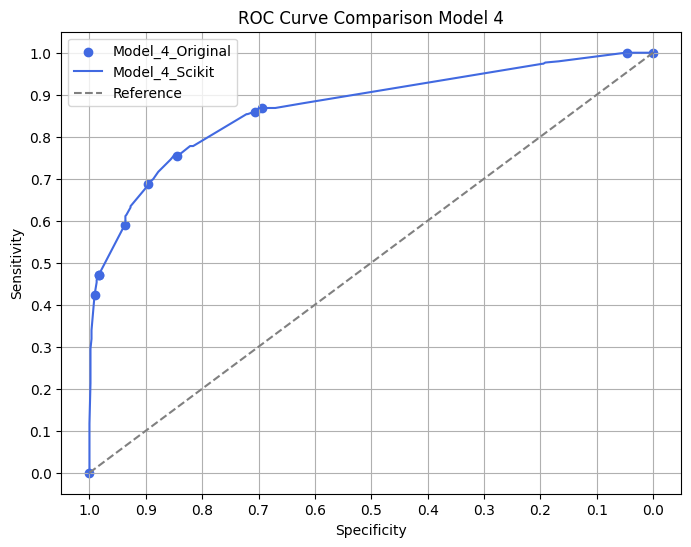

In [129]:
# Prepare data for ROC Comparison plot

# Grab the data from the Scikit Learn function
x_data_model_4_sk = roc_model_4['Specificity']
y_data_model_4_sk = roc_model_4['Sensitivity']

# Grab the data from our original function
x_data_model_4 = threshold_performance_metrics_model_4['Specificity']
y_data_model_4 = threshold_performance_metrics_model_4['Sensitivity']

# Plot size
plt.figure(figsize=(8,6))

# Plot our original values as data points
plt.scatter(x_data_model_4, y_data_model_4, color = 'royalblue', label = "Model_4_Original") # Plot as points
plt.plot(x_data_model_4_sk,y_data_model_4_sk, color = 'royalblue', label = "Model_4_Scikit") # Plot as a line


# Plot Reference Curve
# This correspond to a classifier no better than random chance
plt.plot((1,0),(0,1), color= 'grey', linestyle='--', label = "Reference")

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison Model 4")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

As we can see, the ROC curve (blue line) generated by the Scikit Learn function provides a match against our hand-built function. For clarity, only the data points (blue dots) from our original ROC curve are displayed. Remember that these data points correspond to calculations we performed at threshold values across the range 0% to 100% in steps of 10%.

So, now that we've satisfied ourselves that the Scikit Learn ROC curve function provides us with exactly the same results, then from now on we may confidentally use this function instead of our own, if we so wish. It's likely to be more efficient.

Okay. Let's quickly re-generate the ROC plots for Models 5 and 6 using the Scikit Learn roc_curve function. We will then see how we may also use this function to generate ROC plots for our "simple" (non random forest) models (Models 1, 2 and 3) as well.

Again, we've defined another little helper function to save on code repetition (see hidden cell).

In [130]:
# Define a function to calculate the ROC curve data using the Scikit Learn metrics function
# This function will return the calculated data for "Sensitivity" and "Specificity"

def get_scikit_roc_data (y_true, y_proba_true):
    
    # Calculate the ROC curve data using the Scikit Learn function
    fpr, tpr, thresholds = roc_curve(y_true, y_proba_true)
    
    # Create a table to store the returned data
    roc_curve_data = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 
                                'thresholds': thresholds,})
    
    # Add column named 'Sensitivity'
    roc_curve_data['Sensitivity'] = roc_curve_data['tpr']

    # Caclulate columns for 'Specificity'
    roc_curve_data['Specificity'] = 1 - roc_curve_data['fpr']
    
    return roc_curve_data

In [131]:
# Model 5
model_name = 'Model_05'
features = ["Pclass", "Sex", "Family_size"]

# Calculate probabilities using exisitng function
probs_model_5 = get_random_forest_probs(features, train_data, train_data)

# Add the Actual Survival data to the table
probs_model_5['Actual'] = train_data.Survived

# Grab the Actuals and the Probabilities
y_true = probs_model_5['Actual']
y_proba_true = probs_model_5['Prob_True']

# Generate ROC curve data
roc_model_5 = get_scikit_roc_data(y_true, y_proba_true)

# View results
roc_model_5

,fpr,tpr,thresholds,Sensitivity,Specificity
0,0.000000,0.000000,1.990969,0.000000,1.000000
1,0.000000,0.114035,0.990969,0.114035,1.000000
2,0.000000,0.116959,0.987164,0.116959,1.000000
3,0.000000,0.143275,0.985743,0.143275,1.000000
4,0.000000,0.181287,0.981629,0.181287,1.000000
5,0.001821,0.277778,0.973288,0.277778,0.998179
6,0.001821,0.280702,0.963831,0.280702,0.998179
7,0.001821,0.292398,0.950950,0.292398,0.998179
8,0.003643,0.330409,0.940478,0.330409,0.996357
9,0.007286,0.380117,0.920477,0.380117,0.992714


In [132]:
# Model 6
model_name = 'Model_06'
features = ["Pclass", "Family_size", "IsWoCh"]

# Calculate probabilities using exisitng function
probs_model_6 = get_random_forest_probs(features, train_data, train_data)

# Add the Actual Survival data to the table
probs_model_6['Actual'] = train_data.Survived

# Grab the Actuals and the Probabilities
y_true = probs_model_6['Actual']
y_proba_true = probs_model_6['Prob_True']

# Generate ROC curve data
roc_model_6 = get_scikit_roc_data(y_true, y_proba_true)

# View results
roc_model_6

,fpr,tpr,thresholds,Sensitivity,Specificity
0,0.000000,0.000000,1.952160,0.000000,1.000000
1,0.001821,0.096491,0.952160,0.096491,0.998179
2,0.001821,0.140351,0.944209,0.140351,0.998179
3,0.001821,0.169591,0.939488,0.169591,0.998179
4,0.001821,0.172515,0.936267,0.172515,0.998179
5,0.007286,0.286550,0.928428,0.286550,0.992714
6,0.012750,0.347953,0.893816,0.347953,0.987250
7,0.012750,0.350877,0.886774,0.350877,0.987250
8,0.012750,0.356725,0.857755,0.356725,0.987250
9,0.018215,0.406433,0.856377,0.406433,0.981785


Now let's combine the plots once again.

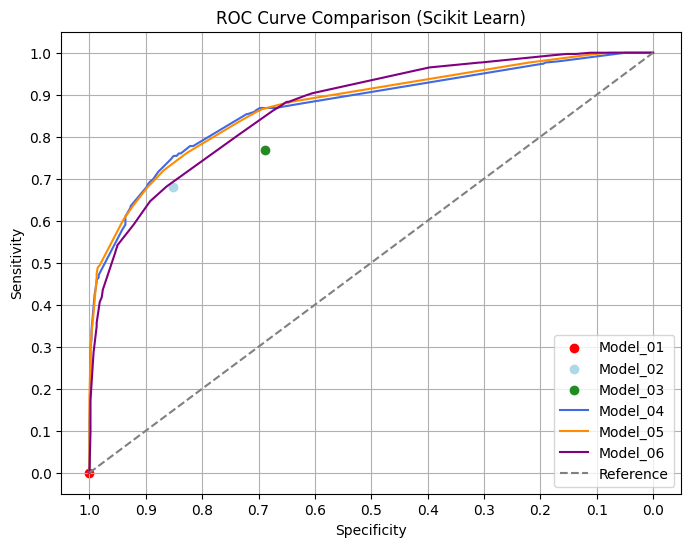

In [133]:
# Prepare data for ROC Comparison plot

# Grab the data for the "simple" models
x_data_model_1 = model_performance_metrics.loc['Model_01','Specificity']
y_data_model_1 = model_performance_metrics.loc['Model_01','Sensitivity']

x_data_model_2 = model_performance_metrics.loc['Model_02','Specificity']
y_data_model_2 = model_performance_metrics.loc['Model_02','Sensitivity']

x_data_model_3 = model_performance_metrics.loc['Model_03','Specificity']
y_data_model_3 = model_performance_metrics.loc['Model_03','Sensitivity']

# Grab the data from the Scikit Learn function
x_data_model_4 = roc_model_4['Specificity']
y_data_model_4 = roc_model_4['Sensitivity']

x_data_model_5 = roc_model_5['Specificity']
y_data_model_5 = roc_model_5['Sensitivity']

x_data_model_6 = roc_model_6['Specificity']
y_data_model_6 = roc_model_6['Sensitivity']


# Plot size
plt.figure(figsize=(8,6))

# Plot the data for the "simple" models
plt.scatter(x_data_model_1, y_data_model_1, color = 'red', label = "Model_01") # Single data point
plt.scatter(x_data_model_2, y_data_model_2, color = 'lightblue', label = "Model_02") # Single data point
plt.scatter(x_data_model_3, y_data_model_3, color = 'forestgreen', label = "Model_03") # Single data point

# Plot the ROC curves
plt.plot(x_data_model_4,y_data_model_4, color = 'royalblue', label = "Model_04") # Plot as a line
plt.plot(x_data_model_5,y_data_model_5, color = 'darkorange', label = "Model_05") # Plot as a line
plt.plot(x_data_model_6,y_data_model_6, color = 'purple', label = "Model_06") # Plot as a line

# Plot Reference Curve
# This correspond to a classifier no better than random chance
plt.plot((1,0),(0,1), color= 'grey', linestyle='--', label = "Reference")

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison (Scikit Learn)")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

So, now we have our comparison of ROC curves for Models 4, 5 and 6, as generated by the Scikit Learn roc_curve function. We have also added our original "single point" values for Models 1, 2 and 3 as we did before. At this stage, we now wonder if it is possible to generate some type of similar ROC curve for each of these single point models?

## ROC Curves for Models 1, 2 and 3
Previously for the random forest models we saw that we could extract 'probabilities' of survival for each passenger, and assign a corresponding binary prediction (1 = survived, 0 = perished) dependent on the threshold (or cutoff). However, for Models 1, 2 and 3, there does not seem to be an obvious way to extract an equivalent set of probabilities for survival. So we will need to approach this differently.

Let's just recap what we already know about Models 1, 2 and 3 in terms of model performance metrics, shown in the table below.

In [134]:
# View data
model_performance_metrics[selected_columns].head(3) # We defined the selected_columns list earlier

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Model_01,0.616162,0.383838,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
Model_02,0.786756,0.383838,0.681287,0.852459,0.351207,0.742038,0.681287,0.410027,0.710366,0.681287,0.852459,0.147541,0.318713
Model_03,0.719416,0.383838,0.769006,0.688525,0.387782,0.605991,0.769006,0.456729,0.677835,0.769006,0.688525,0.311475,0.230994


As we saw on the ROC curve comparison plot, these are displayed as single points. 

Now, let's take Model 2 as an example. This model simply states that "all females survived, all males died". How may we deduce some sort of probability of survival? Well, it turns out that this was one of the first things we considered when performing our early exploration of the data. During our initial data exploration of the training data set, we calculated the following stats:

* Percentage % of women who survived: 74.20382165605095
* Percentage % of men who survived: 18.890814558058924

Hence, we may conclude that with Model 2 a female has a 74.2% chance of survival, and a male has an 18.9% chance of survival. So, let's now apply these probabilities to each of the passengers in the training data set.


In [135]:
# Model 2 - All females survived, all males died

# During initial data exploration we calculated for the training data set:
    # Percentage % of women who survived: 74.20382165605095
    # Percentage % of men who survived: 18.890814558058924
# So, a female has a 74.2% chance of survival, a male has an 18.9% chance of survival

prob_female_true = 0.7420382165605095
prob_male_true = 0.18890814558058924

# Grab the Model 2 Predictions from the score card table
y_predict = score_card['Model_02']

# Create a table for survival probabilites for passengers in the training data set
probs_model_2 = pd.DataFrame({'PassengerId': train_data.PassengerId, 'Sex': train_data.Sex, 'Predict_Survived': y_predict})

# Assign probabilities 
for i in range(len(probs_model_2)):
    if probs_model_2.loc[i, 'Sex'] == 'female':
        probs_model_2.loc[i, 'Prob_True'] = prob_female_true
    elif probs_model_2.loc[i, 'Sex'] == 'male':
        probs_model_2.loc[i, 'Prob_True'] = prob_male_true
        
# Add the Actual Survival data to the table
probs_model_2['Actual'] = train_data.Survived
        
#View results
probs_model_2

,PassengerId,Sex,Predict_Survived,Prob_True,Actual
0,1,male,0,0.188908,0
1,2,female,1,0.742038,1
2,3,female,1,0.742038,1
3,4,female,1,0.742038,1
4,5,male,0,0.188908,0
...,...,...,...,...,...
886,887,male,0,0.188908,0
887,888,female,1,0.742038,1
888,889,female,1,0.742038,0
889,890,male,0,0.188908,1


We have now generated a table of survival probabilities for each passenger based on Model 2. If a passenger is female, the probability is 0.742. If male, the probability is 0.189. Simple.

Now let's pass these data across to the Scikit Learn roc_curve function and generate the data for the ROC plot.

In [136]:
# Grab the Actuals and the Probabilities
y_true = probs_model_2['Actual']
y_proba_true = probs_model_2['Prob_True']

# Generate ROC curve data
roc_model_2 = get_scikit_roc_data(y_true, y_proba_true)

# View results
roc_model_2

,fpr,tpr,thresholds,Sensitivity,Specificity
0,0.000000,0.000000,1.742038,0.000000,1.000000
1,0.147541,0.681287,0.742038,0.681287,0.852459
2,1.000000,1.000000,0.188908,1.000000,0.000000


The generated ROC data shows three data points. The top row is automatically added by the Scikit Learn roc_curve function ("to close the curve"). The middle row is our "single point" that we calculated previously. Compare these fpr, tpr, sensitivity and specificity values with the performance metrics for Model 2 in the table below. 

In passing, however, I've got a question about the threshold values being used. The threshold for the middle row is 0.743082. The threshold for the bottom row is 0.191207. These values seem odd? Where did these values come from? Our supplied probabilities were 0.742038 and 0.188908. So why did it choose otherwise? (As we will see with Model 3 later, we get an exact match between the threshold and supplied probability values).

In [137]:
# View performance metrics
model_performance_metrics[selected_columns].head(3) # We defined the selected_columns list earlier

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Model_01,0.616162,0.383838,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
Model_02,0.786756,0.383838,0.681287,0.852459,0.351207,0.742038,0.681287,0.410027,0.710366,0.681287,0.852459,0.147541,0.318713
Model_03,0.719416,0.383838,0.769006,0.688525,0.387782,0.605991,0.769006,0.456729,0.677835,0.769006,0.688525,0.311475,0.230994


Now let's generate the ROC plot for Model 2.

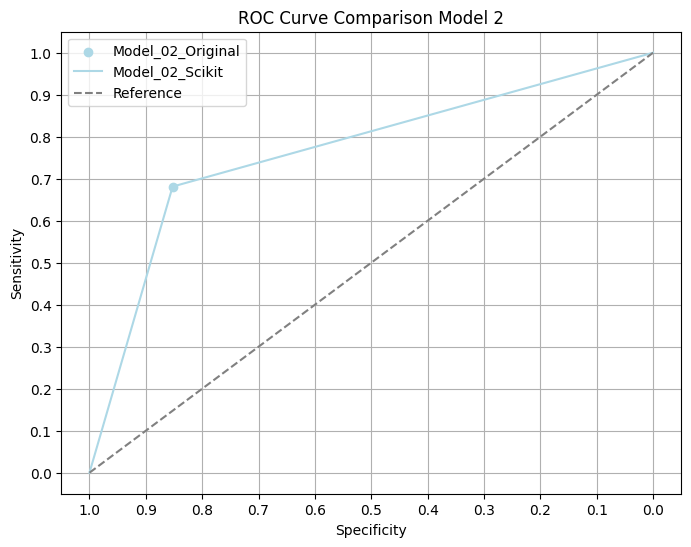

In [138]:
# Grab the data from the Scikit Learn function
x_data_model_2_sk = roc_model_2['Specificity']
y_data_model_2_sk = roc_model_2['Sensitivity']


# Grab the data from our hand-built function (for comparison)
x_data_model_2 = model_performance_metrics.loc['Model_02','Specificity']
y_data_model_2 = model_performance_metrics.loc['Model_02','Sensitivity']

# Plot size
plt.figure(figsize=(8,6))

# Plot our original values as data points
plt.scatter(x_data_model_2, y_data_model_2, color = 'lightblue', label = "Model_02_Original") # Plot as point
plt.plot(x_data_model_2_sk,y_data_model_2_sk, color = 'lightblue', label = "Model_02_Scikit") # Plot as a line


# Plot Reference Curve
# This correspond to a classifier no better than random chance
plt.plot((1,0),(0,1), color= 'grey', linestyle='--', label = "Reference")

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison Model 2")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

The plot shows that the ROC curve for Model 2 is essentially constructed by drawing straight lines from the single calculated data point back to the bottom-left and top-right corners of the plot (again, "to close the curve").

So, why are we bothering to do this? We will answer that a bit later. For now, let's construct a similar plot for Model 3.

In [139]:
# Model 3 - Women and Children First

# During initial data exploration we calculated for the training data set:
    # Percentage % of women and children who survived: 60.59907834101382
    # Percentage % of men aged >21 who survived: 18.91891891891892
    # Percentage % of males with unknown ages who survived: 12.903225806451612
# So, women and children had a 60.6% chance of survival, men over 21 years old had an 18.9% chance of survival
# Males of unknown age had a 12.9% chance of survival

prob_woch_true = 0.6059907834101382
prob_men_true = 0.1891891891891892
prob_unk_true = 0.12903225806451612

# Grab the Model 3 Predictions from the score card table
y_predict = score_card['Model_03'] # Note we predicted that men > 21 years old and males of unknown age did not survive

# Create a table for survival probabilites for passengers in the training data set
probs_model_3 = pd.DataFrame({'PassengerId': train_data.PassengerId, 'IsWoCh': train_data.IsWoCh, 'Predict_Survived': y_predict})

# Assign probabilities 
for i in range(len(probs_model_3)):
    if probs_model_3.loc[i, 'IsWoCh'] == True:
        probs_model_3.loc[i, 'Prob_True'] = prob_woch_true
    elif probs_model_3.loc[i, 'IsWoCh'] == False:
        probs_model_3.loc[i, 'Prob_True'] = prob_men_true
    elif probs_model_3.loc[i, 'IsWoCh'] == 'Unknown':
        probs_model_3.loc[i, 'Prob_True'] = prob_unk_true
        
# Add the Actual Survival data to the table
probs_model_3['Actual'] = train_data.Survived
        
#View results
probs_model_3

,PassengerId,IsWoCh,Predict_Survived,Prob_True,Actual
0,1,False,0,0.189189,0
1,2,True,1,0.605991,1
2,3,True,1,0.605991,1
3,4,True,1,0.605991,1
4,5,False,0,0.189189,0
...,...,...,...,...,...
886,887,False,0,0.189189,0
887,888,True,1,0.605991,1
888,889,True,1,0.605991,0
889,890,False,0,0.189189,1


In [140]:
# Grab the Actuals and the Probabilities
y_true = probs_model_3['Actual']
y_proba_true = probs_model_3['Prob_True']

# Generate ROC curve data
roc_model_3 = get_scikit_roc_data(y_true, y_proba_true)

# View results
roc_model_3

,fpr,tpr,thresholds,Sensitivity,Specificity
0,0.000000,0.000000,1.605991,0.000000,1.000000
1,0.311475,0.769006,0.605991,0.769006,0.688525
2,0.803279,0.953216,0.189189,0.953216,0.196721
3,1.000000,1.000000,0.129032,1.000000,0.000000


For Model 3 we see that the Scikit Learn ROC data has calculated 4 data points. Again the top row is automatically inserted to close the curve. The remaining rows are calculated at threshold values of 0.605991, 0.189189 and 0.129032. The correspond exactly with our supplied probabilities, as expected.

Notice that the fpr, tpr, sensitivity and specificity values for the data in the second row (index = 1) correspond to the values we calculated originally in our performance metrics table. We shall see this on the plot below.

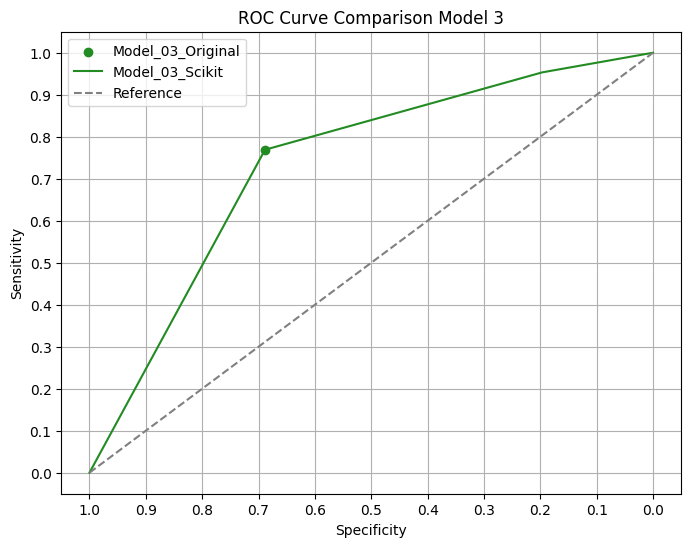

In [141]:
# Grab the data from the Scikit Learn function
x_data_model_3_sk = roc_model_3['Specificity']
y_data_model_3_sk = roc_model_3['Sensitivity']


# Grab the data from our hand-built function (for comparison)
x_data_model_3 = model_performance_metrics.loc['Model_03','Specificity']
y_data_model_3 = model_performance_metrics.loc['Model_03','Sensitivity']

# Plot size
plt.figure(figsize=(8,6))

# Plot our original values as data points
plt.scatter(x_data_model_3, y_data_model_3, color = 'forestgreen', label = "Model_03_Original") # Plot as point
plt.plot(x_data_model_3_sk,y_data_model_3_sk, color = 'forestgreen', label = "Model_03_Scikit") # Plot as a line


# Plot Reference Curve
# This correspond to a classifier no better than random chance
plt.plot((1,0),(0,1), color= 'grey', linestyle='--', label = "Reference")

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison Model 3")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

The ROC curve constructed by Scikit Learn is shown along with the original single point we calculated for Model 3. However, this time, rather than a straight line being extended to the top-right corner of the plot, we see a slight inflection at an intermediary point corresponding to a sensitivity of 0.953 and a specificity of 0.197. This corresponds to the calculation at a threshold of 0.189, which in turn was derived from our supplied survival probability for men over 21 years old. It is from this point that a straight line is then drawn back to the top-left corner of the plot.

How might we interpret this curve, as it stands now? Well, let's just simply consider which point along the curve is nearest to the top-left corner. From visual inspection, that happens to be original calculated point. So our best hope for obtaining good quality performance is to run the model using the threshold at that point (0.606). In essence, this is exactly what we did when we made our predictions with our original simple model. It turned out that women and children had a 60.6% chance of survival.

Now let's deal with Model 1 by which nobody was predicted to survive.

In [142]:
# Model 1 - Nobody Survived

# This is simply the probability of survival being 0% for all passengers
prob_true = 0.0

# Grab the Model 3 Predictions from the score card table
y_predict = score_card['Model_01'] # Note we predicted nobody survived

# Create a table for survival probabilites for passengers in the training data set
probs_model_1 = pd.DataFrame({'PassengerId': train_data.PassengerId, 'Predict_Survived': y_predict})

# Assign probabilities 
# Simply add a column that assigns 0% chance of survival for all passengers
probs_model_1['Prob_True'] = prob_true
        
# Add the Actual Survival data to the table
probs_model_1['Actual'] = train_data.Survived
        
#View results
probs_model_1

,PassengerId,Predict_Survived,Prob_True,Actual
0,1,0,0.0,0
1,2,0,0.0,1
2,3,0,0.0,1
3,4,0,0.0,1
4,5,0,0.0,0
...,...,...,...,...
886,887,0,0.0,0
887,888,0,0.0,1
888,889,0,0.0,0
889,890,0,0.0,1


In [143]:
# Grab the Actuals and the Probabilities
y_true = probs_model_1['Actual']
y_proba_true = probs_model_1['Prob_True']

# Generate ROC curve data
roc_model_1 = get_scikit_roc_data(y_true, y_proba_true)

# View results
roc_model_1

,fpr,tpr,thresholds,Sensitivity,Specificity
0,0.0,0.0,1.0,0.0,1.0
1,1.0,1.0,0.0,1.0,0.0


The ROC data calculated by Scikit Learn shows two data points. Our supplied probability was 0% survival. So this 0% value was used as a threshold on the second row. The first row was automatically added to close the curve (as before).

It is clear from looking at this data that we will simply get a straight line going from the bottom-left corner to the top-right corner of the plot. Let's confirm.

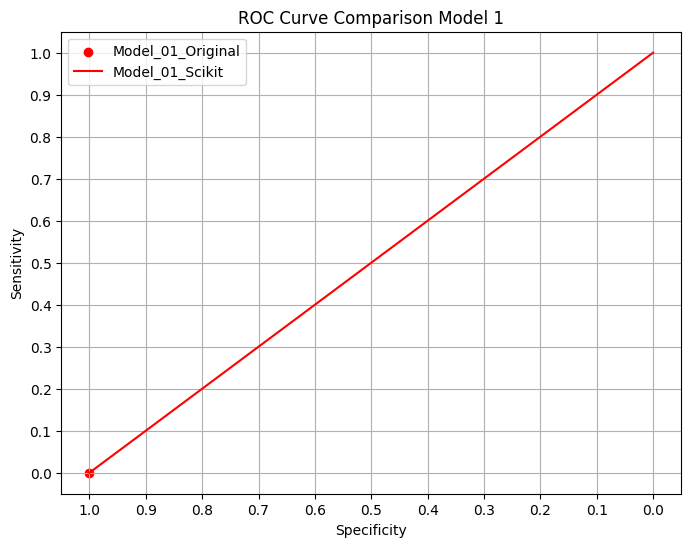

In [144]:
# Grab the data from the Scikit Learn function
x_data_model_1_sk = roc_model_1['Specificity']
y_data_model_1_sk = roc_model_1['Sensitivity']


# Grab the data from our hand-built function (for comparison)
x_data_model_1 = model_performance_metrics.loc['Model_01','Specificity']
y_data_model_1 = model_performance_metrics.loc['Model_01','Sensitivity']

# Plot size
plt.figure(figsize=(8,6))

# Plot our original values as data points
plt.scatter(x_data_model_1, y_data_model_1, color = 'red', label = "Model_01_Original") # Plot as point
plt.plot(x_data_model_1_sk,y_data_model_1_sk, color = 'red', label = "Model_01_Scikit") # Plot as a line


# Plot Reference Curve
# This correspond to a classifier no better than random chance
# plt.plot((1,0),(0,1), color= 'grey', linestyle='--', label = "Reference")

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison Model 1")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

Notice  that the 'reference' line has not been plotted this time. That's because the Model 1 curve exactly overlies the reference line. In other words, just like the reference line, the predictions that are made with Model 1 are "no better than pure chance". 

Okay. So now that we have generated ROC curves for all of our models, we can move on to how we may assess the comparative performance of the models from the ROC curves.

# Area Under Curve (AUC)

In the reference book [Probabilistic Machine Learning: An Introduction](https://www.google.co.uk/books/edition/Probabilistic_Machine_Learning/wrZNEAAAQBAJ?hl=en&gbpv=0), Kevin Murphy includes a section that briefly describes "[s]ummarizing ROC curves as a scalar" (page 171). Here the author writes that "[t]he quality of a ROC curve is often summarized as a single number using the **area under the curve** or **AUC**. Higher AUC scores are better: the maximum is obviously 1". In his [book](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y) David Spiegelhalter adds that "[a] standard way of comparing ROC curves is by measuring the area underneath them, right down to the horizontal - this will be 0.5 for a useless algorithm, and 1 for a perfect one that gets everyone right".

Fortunately, we do not have to calculate the AUC for each curve by hand. Scikit Learn has a convenient function for that. So let's go take a look.

In [145]:
# Calculate the AUC (Area Under the Curve) for each model

# Create empty dictionary
auc_data = {}

# Lists of model names and associated ROC data tables
model_names = ['Model_01', 'Model_02', 'Model_03', 'Model_04', 'Model_05', 'Model_06']
roc_data_tables = [roc_model_1, roc_model_2, roc_model_3, roc_model_4, roc_model_5, roc_model_6]

# Calculate AUC using Scikit Learn 'auc' function
for model_name, roc_data_table in zip(model_names, roc_data_tables):
    fpr = roc_data_table['fpr'] # Grab the fpr values
    tpr = roc_data_table['tpr'] # Grab the tpr values
    roc_auc = auc(fpr, tpr) # Call auc function
    auc_data[model_name] = {'AUC' : roc_auc} # Add result to dictionary
    
# Create table
auc_all_models = pd.DataFrame.from_dict(auc_data, orient='index')

# View table
auc_all_models
    

,AUC
Model_01,0.500000
Model_02,0.766873
Model_03,0.735380
Model_04,0.869316
Model_05,0.873135
Model_06,0.867670


The table above shows the calculation of AUC for each of our models. Note that Model_5 has the highest AUC score at 0.873135. Model_4 comes in second place with an AUC of 0.869316, and Model_6 third with an AUC of 0.867670. Model_1 is the worst perforing model with an AUC of 0.5 (making it "useless" as a classifier, to coin an earlier phrase).

Are these AUC results consistent with other metrics we calculated in terms of model rankings? The short answer is 'no'. But here we need to appreciate that we are *not* comparing "apples with apples". To understand this, let's take a look at our performamce metrics table once again.



In [146]:
# View performance metrics
model_performance_metrics[selected_columns] # We defined the selected_columns list earlier

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Model_01,0.616162,0.383838,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
Model_02,0.786756,0.383838,0.681287,0.852459,0.351207,0.742038,0.681287,0.410027,0.710366,0.681287,0.852459,0.147541,0.318713
Model_03,0.719416,0.383838,0.769006,0.688525,0.387782,0.605991,0.769006,0.456729,0.677835,0.769006,0.688525,0.311475,0.230994
Model_04,0.815937,0.383838,0.687135,0.896175,0.329643,0.804795,0.687135,0.368768,0.741325,0.687135,0.896175,0.103825,0.312865
Model_05,0.813692,0.383838,0.681287,0.896175,0.335198,0.803448,0.681287,0.374447,0.737342,0.681287,0.896175,0.103825,0.318713
Model_06,0.797980,0.383838,0.646199,0.892532,0.369763,0.789286,0.646199,0.411796,0.710611,0.646199,0.892532,0.107468,0.353801


The main thing to bear in mind when looking at this table is that we are simply looking at *one single data point* for each model (remember we made a plot of the single sensitivity and specificity data pairs for each model at the outset of our model performance analysis). The table does not tell us anything about the (area) size or the shape of a corresponding ROC curve that passes through these data points. So that's where the AUC metric comes into play. Its scalar value attempts to characterise the whole ROC curve for a particular model using a single metric. In that way it is then considered possible to determine the highest performing model simply by comparing AUC values between different models.

However, we might conclude that using AUC as a metric on its own does not provide a 'definitive' answer when comparing model performance, especially when some of the models have very similar calculated areas (as in the case with Models 4, 5 and 6). Indeed, as this article ["Applications of Different Parts of an ROC Curve"](https://medium.com/towards-data-science/applications-of-different-parts-of-an-roc-curve-b534b1aafb68) by Prince Glover points out: "[the] AUC is a single number that provides the average information about the overall model’s performance at various threshold settings". And later the author adds "there are many real world problems where a lot of parts of an ROC curve are not of interest, and AUC fails to focus on the region that matters". 

In summary, therefore, it all depends on context and use case as to which performance metric is suitable for our needs. For the Titanic competition, the 'accuracy' score remains the key metric, despite its shortcomings in assessing the quality of the predictions.

Anyway, just to finish up here, let's generate a final plot of our ROC curves annotated with our AUC values for easy reference.

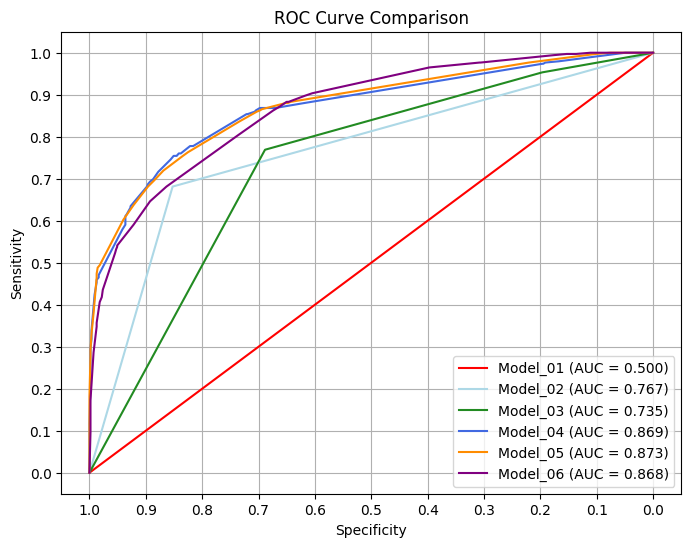

In [147]:
# ROC Comparison Plot with AUC data

# Grab the ROC curve data for each of the models (multiple tables)
x_data_model_1 = roc_model_1['Specificity']
y_data_model_1 = roc_model_1['Sensitivity']

x_data_model_2 = roc_model_2['Specificity']
y_data_model_2 = roc_model_2['Sensitivity']

x_data_model_3 = roc_model_3['Specificity']
y_data_model_3 = roc_model_3['Sensitivity']

x_data_model_4 = roc_model_4['Specificity']
y_data_model_4 = roc_model_4['Sensitivity']

x_data_model_5 = roc_model_5['Specificity']
y_data_model_5 = roc_model_5['Sensitivity']

x_data_model_6 = roc_model_6['Specificity']
y_data_model_6 = roc_model_6['Sensitivity']

# Grab the AUC values
auc_model_1 = auc_all_models.loc['Model_01', 'AUC']
auc_model_2 = auc_all_models.loc['Model_02', 'AUC']
auc_model_3 = auc_all_models.loc['Model_03', 'AUC']
auc_model_4 = auc_all_models.loc['Model_04', 'AUC']
auc_model_5 = auc_all_models.loc['Model_05', 'AUC']
auc_model_6 = auc_all_models.loc['Model_06', 'AUC']

# Plot size
plt.figure(figsize=(8,6))


# Plot the ROC curves
plt.plot(x_data_model_1,y_data_model_1, color = 'red', label = f"Model_01 (AUC = {auc_model_1:.3f})")
plt.plot(x_data_model_2,y_data_model_2, color = 'lightblue', label = f"Model_02 (AUC = {auc_model_2:.3f})")
plt.plot(x_data_model_3,y_data_model_3, color = 'forestgreen', label = f"Model_03 (AUC = {auc_model_3:.3f})")
plt.plot(x_data_model_4,y_data_model_4, color = 'royalblue', label = f"Model_04 (AUC = {auc_model_4:.3f})")
plt.plot(x_data_model_5,y_data_model_5, color = 'darkorange', label = f"Model_05 (AUC = {auc_model_5:.3f})")
plt.plot(x_data_model_6,y_data_model_6, color = 'purple', label = f"Model_06 (AUC = {auc_model_6:.3f})")


# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

Let's also overlay this plot on our accuracy contour map that we developed earlier.

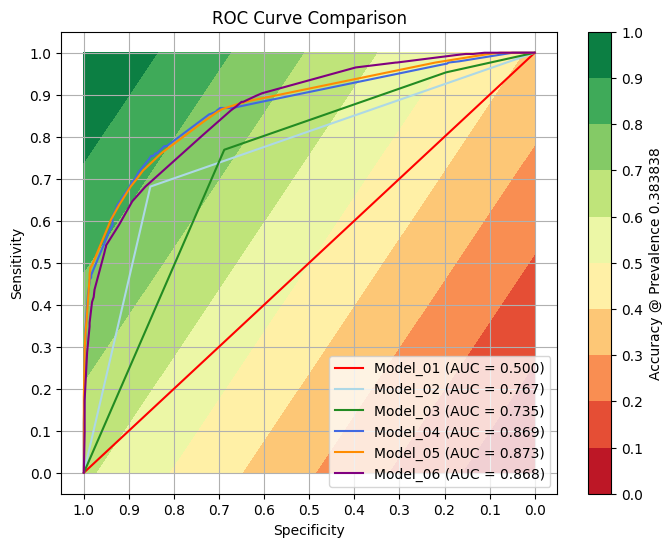

In [148]:
# ROC Comparison Plot with AUC data and Accuracy

# Using the same data from the previous plot 

# Plot size
plt.figure(figsize=(8,6))

# Plot contour map
levels = np.linspace(0,1,11) # Set number of contour levels
plt.contourf(specificity_range, sensitivity_range, accuracy_table, cmap='RdYlGn', levels = levels)
plt.colorbar(label=f"Accuracy @ Prevalence {prevalence}", ticks=np.arange(0, 1.1, 0.1))  # Add a colorbar for legend

# Plot the ROC curves
plt.plot(x_data_model_1,y_data_model_1, color = 'red', label = f"Model_01 (AUC = {auc_model_1:.3f})")
plt.plot(x_data_model_2,y_data_model_2, color = 'lightblue', label = f"Model_02 (AUC = {auc_model_2:.3f})")
plt.plot(x_data_model_3,y_data_model_3, color = 'forestgreen', label = f"Model_03 (AUC = {auc_model_3:.3f})")
plt.plot(x_data_model_4,y_data_model_4, color = 'royalblue', label = f"Model_04 (AUC = {auc_model_4:.3f})")
plt.plot(x_data_model_5,y_data_model_5, color = 'darkorange', label = f"Model_05 (AUC = {auc_model_5:.3f})")
plt.plot(x_data_model_6,y_data_model_6, color = 'purple', label = f"Model_06 (AUC = {auc_model_6:.3f})")


# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

# Additional Random Forest Models
Up until now we have focused our analysis by considering 6 different models. Models 1, 2 and 3 were "simple" models. Models 4, 5 and 6 were random forest models. We explored how we might obtain a set of reliable metrics to gauge the relative performance of each of the models. At a high level, certainly we established that the random forest models were 'better' than the simple models (as borne out by the ROC comparison plot and the AUC values above). But when it came to a more detailed comparison of our various performance metrics for our random forest models, things were not so clear cut, particularly because the calculated metric values were very similar in magnitude. 

Notwithstanding the above, however, for the purpose of the Titanic competition, we will now concentrate on improving our model 'accuracy' score (rather than get too hung up on the detailed metrics). So, let's make another push to achieve a higher public score.

## Feature Selection and Importance (Revisited)
Earlier we touched on how we might assess the 'importance' of each selected feature in terms of its influence on the model predictions. We employed the 'feature importances' attribute that is provided with Scikit-learn's random forest classifier to conduct a superficial analysis on the feature selections for Models 4, 5 and 6.

We shall quickly return to this to conduct a further test. This time we will train a model that uses a wider selection of features in the training data set. We shall then examine the relative importance of each feature, and then whittle down the final list of influencial features accordingly. So let's try this.

In [149]:
# View columns in the training data set
train_data.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_group',
 'Family_size',
 'Fare_group',
 'Title',
 'Title_group',
 'IsWoCh']

In [150]:
# Model 7 - Wide selection of features
model_name = 'Model_07'
features = ["Pclass", "Sex", "SibSp", "Parch", "Age_group", "Family_size", "Fare_group", "Title_group", "IsWoCh"]
run_rf_feature_importance(features, train_data)

,Feature,Importance
21,Title_group_Mr,0.196191
5,Sex_male,0.149368
0,Pclass,0.122550
4,Sex_female,0.118998
25,IsWoCh_True,0.068717
3,Family_size,0.057357
22,Title_group_Mrs,0.042553
1,SibSp,0.037209
18,Fare_group_>30,0.036835
20,Title_group_Miss,0.035796


The table above shows the relative importance of each of our selected features (and classes) on the model predictions when run against the training data set. We will go and take a look at the preliminary model score in just a moment. 

For now, we note that the highest influencers are related to 'Title_group', 'Sex' and 'Pclass'. Next come 'Family_size' and 'IsWoCh'=True. Interestingly, our derived feature of 'Age_group' tends to have little bearing on the outcome, with the majority of its classes at the base of the list. So, perhaps we will drop this 'Age_group' feature from our future modelling? We shall see.

One important consideration at this stage is the risk of **over-fitting** a model. We know that this is especially a problem with 'single' classification trees that start to become 'too deep' and 'too complex'. As David Spiegelhalter puts it in his [book](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y) (page 167), the danger is that we may reach a situation where "[w]e have adpated the tree to the training data to such a degree that its predictive ability has started to decline". He continues: "[b]y making an algorithm too complex, we essentially start fitting the noise rather than the signal". While the use of 'multiple' classification tress in a random forest model helps to substantially reduce the risk of over-fitting, these random forest models can still overfit, for example in the case where the number of trees (forest size) is too large, and / or too many features are considered during the tree creation.

Anyway, out of curiosity, let's see how this model performed in terms of its preliminary accuracy.

In [151]:
# Model 7 - Wide selection of features
model_name = 'Model_07'
features = ["Pclass", "Sex", "SibSp", "Parch", "Age_group", "Family_size", "Fare_group", "Title_group", "IsWoCh"]
score_card[model_name] = run_random_forest(features, train_data, train_data)
model_scores[model_name] = check_score(model_name, score_card)
model_scores

{'Model_01': 0.6161616161616161,
 'Model_02': 0.7867564534231201,
 'Model_03': 0.7194163860830527,
 'Model_04': 0.8159371492704826,
 'Model_04_T40': 0.8103254769921436,
 'Model_05': 0.813692480359147,
 'Model_06': 0.797979797979798,
 'Model_07': 0.8361391694725028}

Hey-ho! We see that Model 7 has indeed gone straight to Number 1 in the hit parade! A preliminary score of 0.836. 

Now, we could just go and submit this to the competition to gets its public score (and, indeed, this might indicate whether we have over-fitted the model on the training data), but let's hold off for the moment. What might be more interesting just now is if we train our model run using a whole bunch of different feature permutations, and try to establish an optimum (not too complex) set of features to use.

## Iterate Feature Combinations
We shall employ a handy iteration library called 'itertools' to derive different combinations of our selected features, and then pass each of these "feature combos" to our rnadom forest model training function, one set at a time. For each trained model, we will calculate its preliminary 'accuracy', and then present a league table that shows the highest performers.

Note that the routine below will take some time to run, because it will be iterating through multiple sets of combos that include two, three, four, etc, features at a time. For this exercise, we will not pass permutations that contain just one feature only. A minimum of two features will be used for each iteration. And we will specify a maximum of 5 features per combo, because ultimately we do not wish to over-fit the model.

In [152]:
from itertools import combinations

def iterate_permutations(features):
  """
  Iterates through all possible permutations of features,
  considering pairs, triplets, etc., excluding single features.

  Args:
      features: A list of features.

  Yields:
      A tuple containing a subset of features (size 2 or more).
  """
  for r in range(2, 5 + 1):  # Loop for subset sizes (2 to len(features)). Only combos with 2 or more features. Maximum 5 features in combo.
    for combo in combinations(features, r):
        yield combo  # The yield keyword allows the function to act as a generator, returning one combination at a time for each iteration
        
# 5 + 1
# len(features) + 1

In [153]:
# Generate predicitons from random forest models using different feature combinations

#### WARNING: This takea a few minutes to run! ####

# Decide which features to consider
features = ["Pclass", "Sex", "SibSp", "Parch", "Age_group", "Family_size", "Fare_group", "Title_group", "IsWoCh"]

# Set initial value for model number
model_number = 1

# Create an empty dictionary to capture model predictions
model_predictions ={}

# Run the random forest classifier for different permutations of features
for permutation in iterate_permutations(features): 
    
    # Convert returned tuple to a list
    feature_permutation = list(permutation)
    
    # Set model name
    model_name = f"Combo_{model_number}"
    
    # Run the random forest model for current permutation of features
    y_predict = run_random_forest(feature_permutation, train_data, train_data)
    
    # Add the feature combo and model predictions to the dictionary
    model_predictions[model_name] = {'Features' : feature_permutation, 'Predict' : y_predict}
    
    # Increment model number
    model_number += 1

print(f"Predictions for all feature combinations successfully completed!")

Predictions for all feature combinations successfully completed!


In [154]:
##### Create 'Combo Scorecard' to store the survival predictions for each model

# Create a new score card table to capture model predictions
combo_score_card = train_data[["PassengerId","Survived"]].copy()

# Rename the copied Survived column
new_col_name = {"Survived":"Actual"} # Dictionary with old name as key and new name as value
combo_score_card.rename(columns=new_col_name, inplace=True)

# Create an empty list for the prediction data
prediction_data_list = []

# Extract prediction data from the model_predictions dictionary into the list
for combo_name, combo_data in model_predictions.items():
    prediction_data_list.append(combo_data['Predict'])
    
# Create a dictionary with column names as keys and prediction data as values
new_data = {f"{combo_name}": data for combo_name, data in zip(model_predictions.keys(), prediction_data_list)}

# Concatenate the new data with the existing DataFrame
combo_score_card = pd.concat([combo_score_card, pd.DataFrame(new_data)], axis=1)

# View scorecard
combo_score_card

,PassengerId,Actual,Combo_1,Combo_2,Combo_3,Combo_4,Combo_5,Combo_6,Combo_7,Combo_8,...,Combo_363,Combo_364,Combo_365,Combo_366,Combo_367,Combo_368,Combo_369,Combo_370,Combo_371,Combo_372
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,3,1,0,0,0,0,0,0,1,0,...,0,1,1,1,1,0,1,1,1,1
3,4,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
887,888,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
888,889,0,0,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,1,1,1
889,890,1,0,1,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


As we can see from the table above, a total of 372 feature combinations were generated from our original selection of features. For each combination, a model was then trained and a corresponding set of survival predictions were calculated. The table columns display the predictions made for each combo. 

We shall now derive the 'accuracy' scores for each set of predictions.

In [155]:
# Calculate Accuracy Scores for each combo model

# Create an empty dictionary to capture scores from all models
all_combo_scores ={}

# Grab list of Combos
model_names = list(combo_score_card.columns[2:]) # Grab column names from index 2 onwards

# Get scores for each model
for model_name in model_names:
    
    # Initialise dictionary 
    combo_score = {}
    
    # Grab feature permutation for the current model. This is available from the model_predictions dictionary.
    combo_features = model_predictions[model_name]['Features']
    
    # Call function to calculate model score
    model_score = check_score(model_name, combo_score_card)
    
    # Collect results for current combo 
    combo_score[model_name] = {'Score' : model_score, 'Features' : combo_features}
    
    # Add combo score to main dictionary
    all_combo_scores.update(combo_score)


# Create dataframe for combo scores
feature_combo_scores = pd.DataFrame.from_dict(all_combo_scores, orient='index')


# Set dataframe display max width to 100 characters (adjust as needed)
pd.set_option('display.max_colwidth', 100)

# View results
feature_combo_scores

,Score,Features
Combo_1,0.786756,"[Pclass, Sex]"
Combo_2,0.690236,"[Pclass, SibSp]"
Combo_3,0.711560,"[Pclass, Parch]"
Combo_4,0.705948,"[Pclass, Age_group]"
Combo_5,0.707071,"[Pclass, Family_size]"
...,...,...
Combo_368,0.801347,"[Parch, Age_group, Family_size, Fare_group, IsWoCh]"
Combo_369,0.831650,"[Parch, Age_group, Family_size, Title_group, IsWoCh]"
Combo_370,0.801347,"[Parch, Age_group, Fare_group, Title_group, IsWoCh]"
Combo_371,0.838384,"[Parch, Family_size, Fare_group, Title_group, IsWoCh]"


Let's now sort the table and show the top performing combo models.

In [156]:
# View the top performing feature combos
feature_combo_scores_sorted = feature_combo_scores.sort_values(by='Score', ascending=False)

feature_combo_scores_sorted.head(15)

,Score,Features
Combo_295,0.849607,"[Pclass, SibSp, Age_group, Fare_group, Title_group]"
Combo_312,0.848485,"[Pclass, Age_group, Family_size, Fare_group, Title_group]"
Combo_154,0.845118,"[Pclass, SibSp, Fare_group, Title_group]"
Combo_173,0.845118,"[Pclass, Family_size, Fare_group, Title_group]"
Combo_289,0.843996,"[Pclass, SibSp, Parch, Fare_group, Title_group]"
Combo_298,0.843996,"[Pclass, SibSp, Family_size, Fare_group, Title_group]"
Combo_305,0.842873,"[Pclass, Parch, Age_group, Fare_group, Title_group]"
Combo_272,0.840629,"[Pclass, Sex, Age_group, Family_size, Fare_group]"
Combo_316,0.840629,"[Pclass, Family_size, Fare_group, Title_group, IsWoCh]"
Combo_308,0.839506,"[Pclass, Parch, Family_size, Fare_group, Title_group]"


The first thing to notice about the top performing models above is that the majority use 5 features to train the model. A couple of the models here just use 4 features (Combo_154 and Combo_170). Models that only used 2 or 3 features do not make it to the top of the rankings.

The highest score (0.8496) was achieved by Combo_295 (5 features). Next Combo_312 (again 5 features) scored 0.8485. Then in joint third place we see Combo_154 which only used 4 features, and Combo_173 that also used 4 features, both scoring a commendable 0.8451.

Interstingly, all of the scores in the top 15 rankings above are greater than 0.838. Our previous best scores were 0.816 (Model_4) and 0.836 (Model_7). As we saw just earlier, this latter model used a total of 9 features for its classification!

Now, let's look at the combos of features themselves. 'Pclass' seems to be our star performer, appearing in all 15 of the top models. So, this confirms that it is a strong influencer on model prediction accuracy. Next, and unexpectedly perhaps, the 'Title_group' feature appears in 14 of the top combos above. This is matched by 'Fare_group', which also appears 14 times. 

'Family_size' plays a fairly significant role, making an appearance 7 times, with its highest ranking in second place. And if we remember that 'Family_size' was derived from combining 'SibSp' and 'Parch', then it becomes clear why these two features are also prominent, especially 'SibSp' which appears 7 times as well. 

Apart from these, we note that 'Age_group' makes it into the top 2 models, but thereafter it only appears 4 other times in our top performers. Perhaps this is consistent with our findings earlier, where we noted that for Model_7 the various 'Age_group' classes were low on the list of feature importance.

So. What do we do now with all this new 'intelligence'? Best go run some stats, I guess!

## Update Preliminary Scores Table
Let's start by adding the preliminary scores for our new models to the main model_scores table. We will also need the score card entries for later calculation of model performance metrics.

In [157]:
##### Model 8 (Combo_295 - 1st place) #####
model_name = 'Model_08' 
score_card[model_name] = combo_score_card['Combo_295'] # Copy from the combo_score_card
model_scores[model_name] = check_score(model_name, score_card)

##### Model 9 (Combo_312 - 2nd place) #####
model_name = 'Model_09'
score_card[model_name] = combo_score_card['Combo_312'] # Copy from the combo_score_card
model_scores[model_name] = check_score(model_name, score_card)

##### Model 10 (Combo_154 - joint 3rd place) #####
model_name = 'Model_10'
score_card[model_name] = combo_score_card['Combo_154'] # Copy from the combo_score_card
model_scores[model_name] = check_score(model_name, score_card)

##### Model 11 (Combo_173 - joint 3rd place) #####
model_name = 'Model_11'
score_card[model_name] = combo_score_card['Combo_173'] # Copy from the combo_score_card
model_scores[model_name] = check_score(model_name, score_card)

# View scores
model_scores

{'Model_01': 0.6161616161616161,
 'Model_02': 0.7867564534231201,
 'Model_03': 0.7194163860830527,
 'Model_04': 0.8159371492704826,
 'Model_04_T40': 0.8103254769921436,
 'Model_05': 0.813692480359147,
 'Model_06': 0.797979797979798,
 'Model_07': 0.8361391694725028,
 'Model_08': 0.8496071829405163,
 'Model_09': 0.8484848484848485,
 'Model_10': 0.8451178451178452,
 'Model_11': 0.8451178451178452}

## Generate ROC Curves
We will now take the top 4 combo models from our table, and see how they compare to our previous models. We already know that the prelimary accuracy score of these models is higher than the earlier models. But, out of interest, let's see how the ROC curves and AUC values for these new models compare.

Note: the rather 'lengthy' code to generate the required ROC data is in the hidden cell below.

In [158]:
################ Generate ROC curve data for Models 7, 8, 9, 10 & 11 ################

##### Model 7 (Wide selection of features) #####
model_name = 'Model_07'
features = ["Pclass", "Sex", "SibSp", "Parch", "Age_group", "Family_size", "Fare_group", "Title_group", "IsWoCh"]

# Calculate probabilities using exisitng function
probs_model_7 = get_random_forest_probs(features, train_data, train_data)

# Add the Actual Survival data to the table
probs_model_7['Actual'] = train_data.Survived

# Grab the Actuals and the Probabilities
y_true = probs_model_7['Actual']
y_proba_true = probs_model_7['Prob_True']

# Generate ROC curve data
roc_model_7 = get_scikit_roc_data(y_true, y_proba_true)

##### Model 8 (Combo_295 - 1st place) #####
model_name = 'Model_08' 
features = ['Pclass', 'SibSp', 'Age_group', 'Fare_group', 'Title_group']

# Calculate probabilities using exisitng function
probs_model_8 = get_random_forest_probs(features, train_data, train_data)

# Add the Actual Survival data to the table
probs_model_8['Actual'] = train_data.Survived

# Grab the Actuals and the Probabilities
y_true = probs_model_8['Actual']
y_proba_true = probs_model_8['Prob_True']

# Generate ROC curve data
roc_model_8 = get_scikit_roc_data(y_true, y_proba_true)

##### Model 9 (Combo_312 - 2nd place) #####
model_name = 'Model_09'
features = ['Pclass', 'Age_group', 'Family_size', 'Fare_group', 'Title_group']

# Calculate probabilities using exisitng function
probs_model_9 = get_random_forest_probs(features, train_data, train_data)

# Add the Actual Survival data to the table
probs_model_9['Actual'] = train_data.Survived

# Grab the Actuals and the Probabilities
y_true = probs_model_9['Actual']
y_proba_true = probs_model_9['Prob_True']

# Generate ROC curve data
roc_model_9 = get_scikit_roc_data(y_true, y_proba_true)

##### Model 10 (Combo_154 - joint 3rd place) #####
model_name = 'Model_10'
features = ['Pclass', 'SibSp', 'Fare_group', 'Title_group']

# Calculate probabilities using exisitng function
probs_model_10 = get_random_forest_probs(features, train_data, train_data)

# Add the Actual Survival data to the table
probs_model_10['Actual'] = train_data.Survived

# Grab the Actuals and the Probabilities
y_true = probs_model_10['Actual']
y_proba_true = probs_model_10['Prob_True']

# Generate ROC curve data
roc_model_10 = get_scikit_roc_data(y_true, y_proba_true)

##### Model 11 (Combo_173 - joint 3rd place) #####
model_name = 'Model_11'
features = ['Pclass', 'Family_size', 'Fare_group', 'Title_group']

# Calculate probabilities using exisitng function
probs_model_11 = get_random_forest_probs(features, train_data, train_data)

# Add the Actual Survival data to the table
probs_model_11['Actual'] = train_data.Survived

# Grab the Actuals and the Probabilities
y_true = probs_model_11['Actual']
y_proba_true = probs_model_11['Prob_True']

# Generate ROC curve data
roc_model_11 = get_scikit_roc_data(y_true, y_proba_true)

Before we plot the ROC curves, let's compare the calculated AUC (Area Under the Curve) for each model.

In [159]:
# Calculate the AUC (Area Under the Curve) for each model

# Lists of model names and associated ROC data tables
model_names = ['Model_07', 'Model_08', 'Model_09', 'Model_10', 'Model_11']
roc_data_tables = [roc_model_7, roc_model_8, roc_model_9, roc_model_10, roc_model_11]

# Calculate AUC using Scikit Learn 'auc' function
for model_name, roc_data_table in zip(model_names, roc_data_tables):
    fpr = roc_data_table['fpr'] # Grab the fpr values
    tpr = roc_data_table['tpr'] # Grab the tpr values
    roc_auc = auc(fpr, tpr) # Call auc function
    auc_data[model_name] = {'AUC' : roc_auc} # Add result to existing dictionary
    
# Recreate table
auc_all_models = pd.DataFrame.from_dict(auc_data, orient='index')

# View table
auc_all_models

,AUC
Model_01,0.500000
Model_02,0.766873
Model_03,0.735380
Model_04,0.869316
Model_05,0.873135
Model_06,0.867670
Model_07,0.901666
Model_08,0.890833
Model_09,0.893363
Model_10,0.886588


In our original set of models (Models 1 thru 6), it was Model_5 that came out on top in terms of its AUC value (0.873135). Now we see that all of our 'new' models (Models 7 thru 11) outperform this model. Model 7 (the one that uses 9 features) is the highest ranked with an AUC value of 0.901666. This is followed by Model_9 (AUC 0.893363), Model_11 (AUC 0.893038) and Model_8 (AUC 0.890833). Model_10 comes in next at a respectable AUC value of 0.886588.

Let's now view the ROC curves for all of our models.

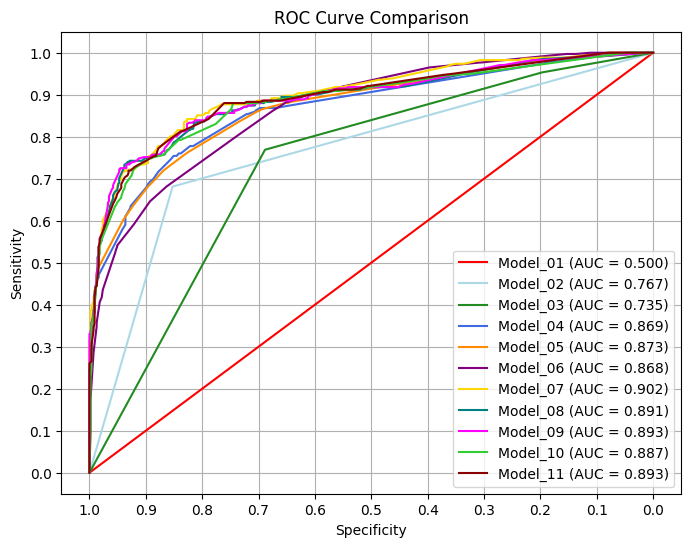

In [160]:
# ROC Comparison Plot with AUC data

# Grab the ROC curve data for each of the models (multiple tables)
x_data_model_1 = roc_model_1['Specificity']
y_data_model_1 = roc_model_1['Sensitivity']

x_data_model_2 = roc_model_2['Specificity']
y_data_model_2 = roc_model_2['Sensitivity']

x_data_model_3 = roc_model_3['Specificity']
y_data_model_3 = roc_model_3['Sensitivity']

x_data_model_4 = roc_model_4['Specificity']
y_data_model_4 = roc_model_4['Sensitivity']

x_data_model_5 = roc_model_5['Specificity']
y_data_model_5 = roc_model_5['Sensitivity']

x_data_model_6 = roc_model_6['Specificity']
y_data_model_6 = roc_model_6['Sensitivity']

x_data_model_7 = roc_model_7['Specificity']
y_data_model_7 = roc_model_7['Sensitivity']

x_data_model_8 = roc_model_8['Specificity']
y_data_model_8 = roc_model_8['Sensitivity']

x_data_model_9 = roc_model_9['Specificity']
y_data_model_9 = roc_model_9['Sensitivity']

x_data_model_10 = roc_model_10['Specificity']
y_data_model_10 = roc_model_10['Sensitivity']

x_data_model_11 = roc_model_11['Specificity']
y_data_model_11 = roc_model_11['Sensitivity']

# Grab the AUC values
auc_model_1 = auc_all_models.loc['Model_01', 'AUC']
auc_model_2 = auc_all_models.loc['Model_02', 'AUC']
auc_model_3 = auc_all_models.loc['Model_03', 'AUC']
auc_model_4 = auc_all_models.loc['Model_04', 'AUC']
auc_model_5 = auc_all_models.loc['Model_05', 'AUC']
auc_model_6 = auc_all_models.loc['Model_06', 'AUC']
auc_model_7 = auc_all_models.loc['Model_07', 'AUC']
auc_model_8 = auc_all_models.loc['Model_08', 'AUC']
auc_model_9 = auc_all_models.loc['Model_09', 'AUC']
auc_model_10 = auc_all_models.loc['Model_10', 'AUC']
auc_model_11 = auc_all_models.loc['Model_11', 'AUC']

# Plot size
plt.figure(figsize=(8,6))

# Plot the ROC curves
plt.plot(x_data_model_1,y_data_model_1, color = 'red', label = f"Model_01 (AUC = {auc_model_1:.3f})")
plt.plot(x_data_model_2,y_data_model_2, color = 'lightblue', label = f"Model_02 (AUC = {auc_model_2:.3f})")
plt.plot(x_data_model_3,y_data_model_3, color = 'forestgreen', label = f"Model_03 (AUC = {auc_model_3:.3f})")
plt.plot(x_data_model_4,y_data_model_4, color = 'royalblue', label = f"Model_04 (AUC = {auc_model_4:.3f})")
plt.plot(x_data_model_5,y_data_model_5, color = 'darkorange', label = f"Model_05 (AUC = {auc_model_5:.3f})")
plt.plot(x_data_model_6,y_data_model_6, color = 'purple', label = f"Model_06 (AUC = {auc_model_6:.3f})")
plt.plot(x_data_model_7,y_data_model_7, color = 'gold', label = f"Model_07 (AUC = {auc_model_7:.3f})")
plt.plot(x_data_model_8,y_data_model_8, color = 'teal', label = f"Model_08 (AUC = {auc_model_8:.3f})")
plt.plot(x_data_model_9,y_data_model_9, color = 'magenta', label = f"Model_09 (AUC = {auc_model_9:.3f})")
plt.plot(x_data_model_10,y_data_model_10, color = 'limegreen', label = f"Model_10 (AUC = {auc_model_10:.3f})")
plt.plot(x_data_model_11,y_data_model_11, color = 'darkred', label = f"Model_11 (AUC = {auc_model_11:.3f})")


# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

All of our new models (Models 7 thru 11) exhibit improved performance over our original models. The ROC curves for these models edge closer to the top-left corner of the plot. This should mean that they will generate better quality predictions in general, compared with our previous models.

In passing, we also observe for our new models that there are a lot of “up and down” variations in the ROC curve (squiggly lines) near the top-left corner of the plot. Apparently (according to a brief chat with Google Gemini), this type of variation can indicate high model discrimination or good classification performance, a sign that the model is effective at distinguishing between positive and negative instances. However, Gemini also warns that  such variations can also be caused by noisy or imbalanced data. So, we shall see.

As for model 'accuracy', well, that depends at which probability threshold we choose to run a particular model. As we have already seen, it depends on which data point we select along the ROC curve for a particular model as to how accurate it might be. Let's try to assess this using our 'accuracy' contour map overlay.

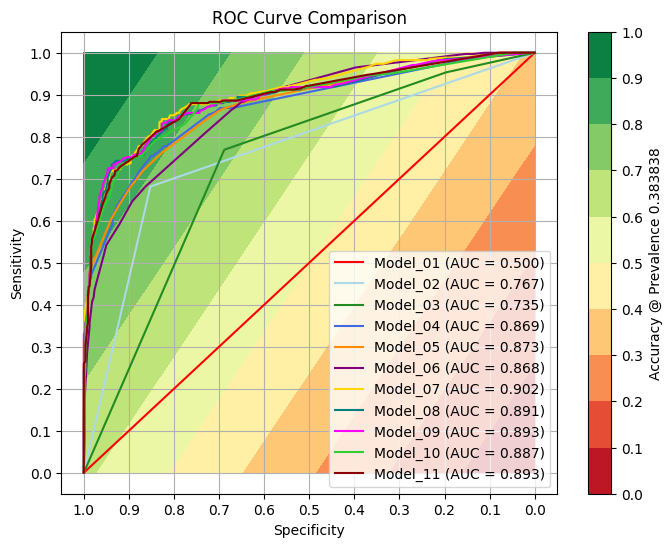

In [161]:
# ROC Comparison Plot with AUC data

# Using the same data as for the previous plot

# Plot size
plt.figure(figsize=(8,6))

# Plot contour map
levels = np.linspace(0,1,11) # Set number of contour levels
plt.contourf(specificity_range, sensitivity_range, accuracy_table, cmap='RdYlGn', levels = levels)
plt.colorbar(label=f"Accuracy @ Prevalence {prevalence}", ticks=np.arange(0, 1.1, 0.1))  # Add a colorbar for legend


# Plot the ROC curves
plt.plot(x_data_model_1,y_data_model_1, color = 'red', label = f"Model_01 (AUC = {auc_model_1:.3f})")
plt.plot(x_data_model_2,y_data_model_2, color = 'lightblue', label = f"Model_02 (AUC = {auc_model_2:.3f})")
plt.plot(x_data_model_3,y_data_model_3, color = 'forestgreen', label = f"Model_03 (AUC = {auc_model_3:.3f})")
plt.plot(x_data_model_4,y_data_model_4, color = 'royalblue', label = f"Model_04 (AUC = {auc_model_4:.3f})")
plt.plot(x_data_model_5,y_data_model_5, color = 'darkorange', label = f"Model_05 (AUC = {auc_model_5:.3f})")
plt.plot(x_data_model_6,y_data_model_6, color = 'purple', label = f"Model_06 (AUC = {auc_model_6:.3f})")
plt.plot(x_data_model_7,y_data_model_7, color = 'gold', label = f"Model_07 (AUC = {auc_model_7:.3f})")
plt.plot(x_data_model_8,y_data_model_8, color = 'teal', label = f"Model_08 (AUC = {auc_model_8:.3f})")
plt.plot(x_data_model_9,y_data_model_9, color = 'magenta', label = f"Model_09 (AUC = {auc_model_9:.3f})")
plt.plot(x_data_model_10,y_data_model_10, color = 'limegreen', label = f"Model_10 (AUC = {auc_model_10:.3f})")
plt.plot(x_data_model_11,y_data_model_11, color = 'darkred', label = f"Model_11 (AUC = {auc_model_11:.3f})")


# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("ROC Curve Comparison")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines

plt.legend()

plt.show()

The plot is starting to look a bit "busy", perhaps becoming difficult to decipher. Let's hone in on the "business end" of the plot.

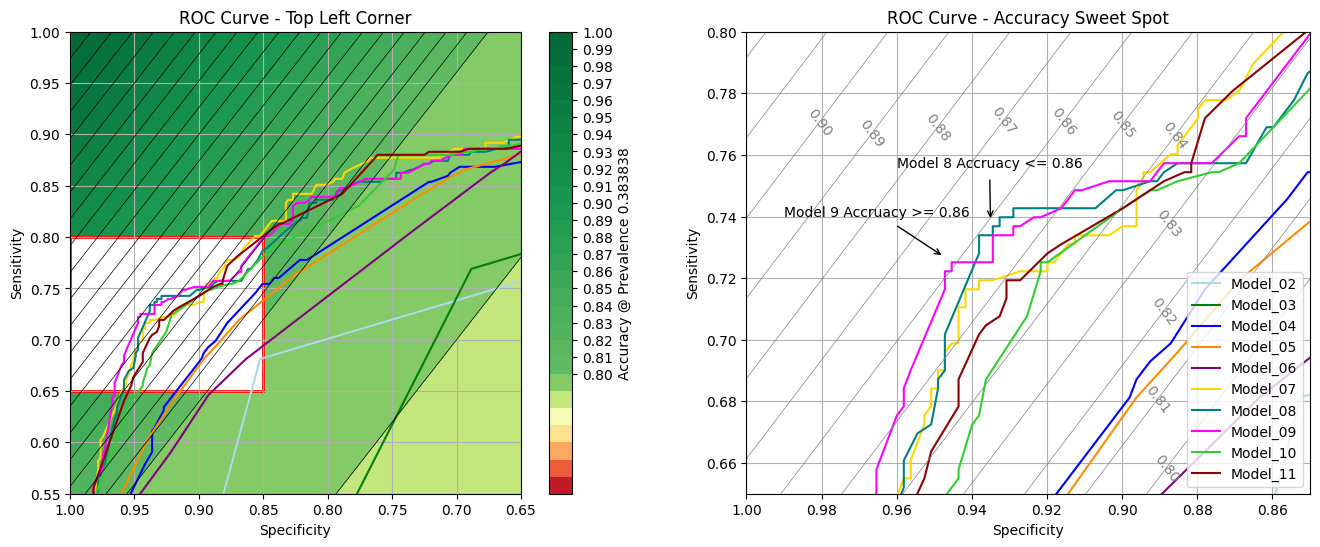

In [162]:
# Zoom in on ROC plot

# Using the same data as for the previous plot

# Create a figure and subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16,6))
ax1 = axes[0]
ax2 = axes[1]


###### Plot the ROC curve data on both subplots #####

# Loop through each subplot and plot the data
for ax in axes.flat:  # Flattens the 2D array into a 1D iterator for easier looping
    ax.plot(x_data_model_2,y_data_model_2, color = 'lightblue', label = "Model_02")
    ax.plot(x_data_model_3,y_data_model_3, color = 'green', label = "Model_03") 
    ax.plot(x_data_model_4,y_data_model_4, color = 'blue', label = "Model_04") 
    ax.plot(x_data_model_5,y_data_model_5, color = 'darkorange', label = "Model_05") 
    ax.plot(x_data_model_6,y_data_model_6, color = 'purple', label = "Model_06") 
    ax.plot(x_data_model_7,y_data_model_7, color = 'gold', label = "Model_07") 
    ax.plot(x_data_model_8,y_data_model_8, color = 'teal', label = "Model_08") 
    ax.plot(x_data_model_9,y_data_model_9, color = 'magenta', label = "Model_09")
    ax.plot(x_data_model_10,y_data_model_10, color = 'limegreen', label = "Model_10") 
    ax.plot(x_data_model_11,y_data_model_11, color = 'darkred', label = "Model_11") 
    
    # Set labels
    ax.set_xlabel("Specificity")
    ax.set_ylabel("Sensitivity")

    # Plot gridlines
    ax.grid(True)  # Add gridlines
    
    
###### Left subplot with contour color map ######

### Contour map ###

# Define contour levels - increase resolution between 0.8 and 1.0
levels = np.concatenate([np.linspace(0, 0.7, 7), np.linspace(0.8, 1.0, 21)])

# Plot contour map
contourf = ax1.contourf(specificity_range, sensitivity_range, accuracy_table, cmap='RdYlGn', levels = levels)
fig.colorbar(contourf, label=f"Accuracy @ Prevalence {prevalence}", ticks=np.arange(0.8, 1.1, 0.01))  # Add a colorbar for legend

# Add contour lines
ax1.contour(sensitivity_range, specificity_range, accuracy_table, levels=levels, linewidths=0.5, colors='black')

# Set the x-axis and y-axis ranges
ax1.set_xlim(1.00, 0.65) # By tradition the Specificity is plotted in reverse from 1 to 0
ax1.set_ylim(0.55, 1.00) 

ax1.set_title("ROC Curve - Top Left Corner")

### Rectangle ###

# Add a rectangle to highlight sweet spot area on plot

# Rectangle properties
xy = (0.85, 0.65) # Bottom left of rectangle
width = 0.15
height = 0.15
angle = 0  # No rotation

# Create rectangle patch (using Matplotlib patches Rectangle method)
rect = Rectangle(xy, width, height, angle=angle)

# Add rectangle to ax1
ax1.add_patch(rect)

# Customize rectangle appearance
rect.set_facecolor('white')
rect.set_edgecolor('red')
# rect.set_linestyle('--')
rect.set_linewidth(2)
# rect.set_alpha(0.7)

###### Right subplot without contour color map ######

### Contour Lines and Labels ###

# Add contour lines and define contour set CS
CS = ax2.contour(sensitivity_range, specificity_range, accuracy_table, levels=np.linspace(0.80, 0.92, 13), linewidths=0.5, colors='grey')

# Apply contour labels to contour set
label_positions = [(0.89,0.66), (0.89, 0.68), (0.89, 0.71), (0.89, 0.74), (0.89, 0.77),
                  (0.90, 0.77), (0.92, 0.775), (0.93, 0.77), (0.95, 0.77), (0.97, 0.77),
                  (0.98, 0.77), (1,1), (1,1)]

ax2.clabel(CS, manual = label_positions, inline=False, fontsize=10, fmt="%.2f", colors='grey',)  # Adjust as needed


# Set the x-axis and y-axis ranges
ax2.set_xlim(1.00, 0.85) # By tradition the Specificity is plotted in reverse from 1 to 0
ax2.set_ylim(0.65, 0.80) 

ax2.set_title("ROC Curve - Accuracy Sweet Spot")

### Add annotations ###

# Define annotation text and coordinates
roc_model_9_text = "Model 9 Accruacy >= 0.86"
xy_point_1 = (0.945, 0.725)  # Point to annotate
xy_text_1 = (0.99, 0.74)  # Position of the annotation text

roc_model_8_text = "Model 8 Accruacy <= 0.86"
xy_point_2 = (0.935, 0.735)  # Point to annotate
xy_text_2 = (0.96, 0.756)  # Position of the annotation text


# Define arrow properties
arrow_props = dict(
    facecolor='black',  # Color of the arrow
    shrinkA=5,  # Shrink arrow at start point
    shrinkB=10,  # Shrink arrow at end point (head)
    arrowstyle='->'  # Arrow style (other options like '->-')
)

# Add annotation with arrow
ax2.annotate(
    roc_model_9_text,
    xy=xy_point_1,
    xytext=xy_text_1,
    arrowprops=arrow_props
)

ax2.annotate(
    roc_model_8_text,
    xy=xy_point_2,
    xytext=xy_text_2,
    arrowprops=arrow_props
)

##### Show plot #####
plt.legend(loc='lower right')

plt.show()

The above two plots zoom in on the area of interest on the main ROC curve plot. The left-side plot hones in on the top-left corner of the main plot. The right-side plot zooms in even further to show the highlighted "sweet spot" area in more detail. Here the 'accuracy' contours and corresponding values are shown in grey.

The 'sweet spot" plot shows us which of our models would result in the maximum 'accuracy' for the training data set. We see that there is a close competition between Model_8 and Model_9. Both of these models have locations on their respective ROC curve where the expected accuracy would be around the 0.86 mark. However, it looks as if Model_9 would just sneak into first place, actually crossing the 0.86 accuracy contour line at the approximate location where specificity = 0.95 and sensitivity = 0.725, or thereabouts. However, note how the accuracy of Model_9 swiftly drops either side of this point. So unless we can identify this point precisely then we might not achieve the targeted accuracy score of 0.86. Contrast this with the ROC curve for Model_8, where we see a broader range of high accuracy scores (just under 0.86) in the specificity range 0.93 to 0.94, outperforming Model_9 over this same zone. Maybe that area offers a better chance of achieving a high score, especially when we come to run the model against the test dat set?

Of course, we are now starting to get into the realms of 'over-fitting'. We should keep reminding oursleves that the above ROC curves are generated for the *training* data set. They are unlikely to produce the same results when run against the *test* data set, so we should not dwell too much on this level of model performance detail (other than for the reason that it's rather fun!).

Let's just remind ourselves of the preliminary scores we calculated for these models earlier.

In [163]:
# View model scores
model_scores

{'Model_01': 0.6161616161616161,
 'Model_02': 0.7867564534231201,
 'Model_03': 0.7194163860830527,
 'Model_04': 0.8159371492704826,
 'Model_04_T40': 0.8103254769921436,
 'Model_05': 0.813692480359147,
 'Model_06': 0.797979797979798,
 'Model_07': 0.8361391694725028,
 'Model_08': 0.8496071829405163,
 'Model_09': 0.8484848484848485,
 'Model_10': 0.8451178451178452,
 'Model_11': 0.8451178451178452}

We see that the preliminary score for Model_8 is 0.84961, and for Model_9 is 0.84848. As we learned earlier, we know that the survival predictions made by the random forest classifier uses a probability threshold of 50% by default. So that is what these preliminary scores are based on.

However, having now inpected the ROC curves for these two models, we see that there are some 'extra pickings" to be had in terms of accuracy. The 'sweet spot' plot showed us that we could achieve up to around 0.86 in accuracy, if we just select the right position along the ROC curve to generate our predictions. So we should now try to determine the threshold value that will yield the higher accuracy for each of these two models. 

Accordingly, let's calculate the threshold performance metrics for each of these models. 

## Threshold Performance Metrics for Model 8 and Model 9

We will use a threshold interval of 1% across a focussed range of range 40% to 60%, so that we can get the required level of detail around our accuracy sweet spots.

In [164]:
# Model 8 (Combo_295 - 1st place)
model_name = 'Model_08'
features = ['Pclass', 'SibSp', 'Age_group', 'Fare_group', 'Title_group']
thresh_range = (40, 61, 1) # From 40 to 60 in steps of 1%
threshold_performance_metrics_model_8 = get_roc_data(model_name, features, train_data, train_data, thresh_range) # We are testing against the training data

# View results
threshold_performance_metrics_model_8[selected_columns] # We defined the selected_columns list earlier

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Thresh_40,0.824916,0.383838,0.769006,0.859745,0.270240,0.773529,0.769006,0.323492,0.771261,0.769006,0.859745,0.140255,0.230994
Thresh_41,0.824916,0.383838,0.757310,0.867031,0.276730,0.780120,0.757310,0.327484,0.768546,0.757310,0.867031,0.132969,0.242690
Thresh_42,0.824916,0.383838,0.757310,0.867031,0.276730,0.780120,0.757310,0.327484,0.768546,0.757310,0.867031,0.132969,0.242690
Thresh_43,0.824916,0.383838,0.757310,0.867031,0.276730,0.780120,0.757310,0.327484,0.768546,0.757310,0.867031,0.132969,0.242690
Thresh_44,0.824916,0.383838,0.757310,0.867031,0.276730,0.780120,0.757310,0.327484,0.768546,0.757310,0.867031,0.132969,0.242690
Thresh_45,0.828283,0.383838,0.757310,0.872495,0.274146,0.787234,0.757310,0.322750,0.771982,0.757310,0.872495,0.127505,0.242690
Thresh_46,0.829405,0.383838,0.757310,0.874317,0.273303,0.789634,0.757310,0.321173,0.773134,0.757310,0.874317,0.125683,0.242690
Thresh_47,0.836139,0.383838,0.757310,0.885246,0.268453,0.804348,0.757310,0.311734,0.780120,0.757310,0.885246,0.114754,0.242690
Thresh_48,0.837262,0.383838,0.751462,0.890710,0.271506,0.810726,0.751462,0.312404,0.779970,0.751462,0.890710,0.109290,0.248538
Thresh_49,0.843996,0.383838,0.742690,0.907104,0.273566,0.832787,0.742690,0.306869,0.785162,0.742690,0.907104,0.092896,0.257310


Firstly, the performance metrics table for Model 8 shows us that at a threshold of 50% (the default threshold), we obtain an accuracy value of 0.849607. This is the same as the model's preliminary score that we calculated above.

We also observe that the highest accuracy (0.858586) is achieved using a threshold of 54% or 55%. We also can see that there is quite a broad range of threshold values (between 51% and 57%) that result in accuracy values that all exceed 0.85. Indeed, we noticed this broad zone when examining our honed-in ROC plot earlier.

In passing, we also see that the maximum F1 score of 0.800 was obtained at threshold values 53%, 54% and 55%. So, in this case, the F1 score ranking appears to be consistent with the accuracy score ranking. Interesting! Yet, thinking about this some more, this 'convergence' of similar rankings between 'accuracy' and 'F1 score' will become increasingly likely the further we move 'north-west' on the ROC plot. Ultimately, for a 'perfect classifier', we would achieve unity (100%) values for each of the metrics 'accuracy', 'specificity', 'sensitivity' and 'F1 score', etc, at the same time.

Let's now consider Model 9.

In [165]:
# Model 9 (Combo_312 - 2nd place)
model_name = 'Model_09'
features = ['Pclass', 'Age_group', 'Family_size', 'Fare_group', 'Title_group']
thresh_range = (40, 61, 1) # From 40 to 60 in steps of 1%
threshold_performance_metrics_model_9 = get_roc_data(model_name, features, train_data, train_data, thresh_range) # We are testing against the training data

# View results
threshold_performance_metrics_model_9[selected_columns] # We defined the selected_columns list earlier

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Thresh_40,0.830527,0.383838,0.771930,0.867031,0.264001,0.783383,0.771930,0.314546,0.777614,0.771930,0.867031,0.132969,0.228070
Thresh_41,0.830527,0.383838,0.757310,0.876138,0.272470,0.792049,0.757310,0.319597,0.774290,0.757310,0.876138,0.123862,0.242690
Thresh_42,0.831650,0.383838,0.757310,0.877960,0.271647,0.794479,0.757310,0.318021,0.775449,0.757310,0.877960,0.122040,0.242690
Thresh_43,0.831650,0.383838,0.757310,0.877960,0.271647,0.794479,0.757310,0.318021,0.775449,0.757310,0.877960,0.122040,0.242690
Thresh_44,0.835017,0.383838,0.757310,0.883424,0.269237,0.801858,0.757310,0.313303,0.778947,0.757310,0.883424,0.116576,0.242690
Thresh_45,0.837262,0.383838,0.757310,0.887067,0.267679,0.806854,0.757310,0.310168,0.781297,0.757310,0.887067,0.112933,0.242690
Thresh_46,0.838384,0.383838,0.754386,0.890710,0.268832,0.811321,0.754386,0.309719,0.781818,0.754386,0.890710,0.109290,0.245614
Thresh_47,0.838384,0.383838,0.751462,0.892532,0.270778,0.813291,0.751462,0.310856,0.781155,0.751462,0.892532,0.107468,0.248538
Thresh_48,0.839506,0.383838,0.751462,0.894353,0.270060,0.815873,0.751462,0.309312,0.782344,0.751462,0.894353,0.105647,0.248538
Thresh_49,0.841751,0.383838,0.751462,0.897996,0.268656,0.821086,0.751462,0.306237,0.784733,0.751462,0.897996,0.102004,0.248538


Similarly, the performance metrics table for Model 9 shows us that at a threshold of 50% (the default threshold), we obtain an accuracy value of 0.848485, the same as the model's preliminary score that we calculated above.

The highest accuracy (0.860831) is achieved using a threshold of 56% or 57%, just over the 0.86 contour line that we saw on our ROC plot above. Either side of these threshold values, the accuracy tends to drop quite sharply down to around the 0.85 mark (although this is still a good performance!). Again, we noticed this sharp fall in accuracy when we analysed our honed-in ROC plot earlier.

For Model 9, a maximum F1 score of 0.800 was obtained at a threshold value of 56%. So, once moree, the F1 score ranking appears to be consistent with the accuracy score ranking, just as with Model 8.

Okay. At this stage, therefore, we have some additional model contenders. We shall select Model 8 at a threshold of 54% (accuracy 0.858586, F1 score 0.800), and Model 9 at a threshold of 56% (accuracy 0.860831, F1 score 0.800). In due course we shall see how well these models perform against the *test* data set.

Before we move on, however, it  might be interesting at this stage to consider the thresholds at which we obtain a maximum preliminary score across *all* of our random forest models. So, for each model, let's find the model threshold variation that yields the highest accuracy.

# Find Model Thresholds that yield Maximum Accuracy

First let's create a dictionary to hold our list of selected features for each model.

In [166]:
# Create a dictionary to hold the model features
rf_model_features = {}

rf_model_features['Model_04'] = ["Pclass", "Sex", "SibSp", "Parch"]
rf_model_features['Model_05'] = ["Pclass", "Sex", "Family_size"]
rf_model_features['Model_06'] = ["Pclass", "Family_size", "IsWoCh"]
rf_model_features['Model_07'] = ["Pclass", "Sex", "SibSp", "Parch", "Age_group", "Family_size", "Fare_group", "Title_group", "IsWoCh"]
rf_model_features['Model_08'] = ['Pclass', 'SibSp', 'Age_group', 'Fare_group', 'Title_group']
rf_model_features['Model_09'] = ['Pclass', 'Age_group', 'Family_size', 'Fare_group', 'Title_group']
rf_model_features['Model_10'] = ['Pclass', 'SibSp', 'Fare_group', 'Title_group']
rf_model_features['Model_11'] = ['Pclass', 'Family_size', 'Fare_group', 'Title_group']

Now let's define a function to find the threshold at which we achieve the highest accruacy for a particular model. This is shown in the hidden cell below.

In [167]:
# Function to select the threshold at which maximum 'accuracy' is achieved for a model
def get_thresh_max_accuracy (model_name, features_input, train_data_input, test_data_input, thresh_range_input):
    
    # Calculate threshold performance metrics
    threshold_performance_metrics = get_roc_data(model_name, features_input, train_data_input, test_data_input, thresh_range_input)

    # Row index with highest accuracy value (first row if more than one row with max value)
    thresh_with_max_accuracy = threshold_performance_metrics['Accuracy'].idxmax()
    
    # Check to see if this row has a higher accuracy than the row at the default threshold of 50%
    if threshold_performance_metrics.loc['Thresh_50', 'Accuracy'] == threshold_performance_metrics.loc[thresh_with_max_accuracy, 'Accuracy']:
        thresh_with_max_accuracy = 'Thresh_50' # We will just take the default threshold rather than the 'first' threshold found
    
    # Dump the row values to a dictionary
    row_dict = threshold_performance_metrics.loc[thresh_with_max_accuracy].to_dict()
    
    # Assign model name
    short_thresh_name = thresh_with_max_accuracy.replace('hresh_', "") # eg 'Thresh_40' becomes "T40"
    new_model_name = f"{model_name}_{short_thresh_name}"
    
    # Create new dictionary with new_model_name as an index
    new_dict = {new_model_name : row_dict}
    
    
    return new_dict

Okay. For each random forest model, let's calculate the threshold at which maximum accuracy is achieved. We will assume the maximum accuracy for a model occurs in a threshold range of 40% to 60%. This will keep the runtime shorter. 

If the function finds that the maximum accuracy occurs at multiple threshold values, then it will select the first of these threshold values it finds. However, the function also performs a check on the accuracy for the default threshold value of 50%. If this accuracy value is the same as the maximum accuracy, the function will choose the row at 50% threshold (ie, "Thresh_50"), rather than any earlier rows. This will keeps things neater!

In [168]:
# For each random forest model, calculate the threshold at which maximum accuracy is achieved
# We will assume maximum accuracy occurs in a threshold range of 40% to 60%. This will keep the runtime shorter.

####### WARNING: This code takes a couple of minutes to run. ######

# Set threshold range
thresh_range = (40, 61, 1) # From 40 to 60 in steps of 1%

# Create a master dictionary to store the returned results
model_max_accuracy_thresh_dict = {}

# Iterate through the rf_model_features dictionary
for model_name, features in rf_model_features.items():
    
    # Call function to find the threshold at which maximum accuracy is obtained. Returns a dictionary with row values.
    thresh_max_acc_dict = get_thresh_max_accuracy (model_name, features, train_data, train_data, thresh_range)
    
    # Append the returned dictionary to the master dictionary
    model_max_accuracy_thresh_dict.update(thresh_max_acc_dict)
    
# Create dataframe from master dictionary
model_max_accuracy_thresholds = pd.DataFrame.from_dict(model_max_accuracy_thresh_dict, orient='index')

# View table
model_max_accuracy_thresholds[selected_columns] # We defined the selected_columns list earlier

,Accuracy,Prevalence,Sensitivity,Specificity,ROC_Dist,Precision,Recall,PRC_Dist,F1_Score,TPR,TNR,FPR,FNR
Model_04_T50,0.815937,0.383838,0.687135,0.896175,0.329643,0.804795,0.687135,0.368768,0.741325,0.687135,0.896175,0.103825,0.312865
Model_05_T50,0.813692,0.383838,0.681287,0.896175,0.335198,0.803448,0.681287,0.374447,0.737342,0.681287,0.896175,0.103825,0.318713
Model_06_T50,0.797980,0.383838,0.646199,0.892532,0.369763,0.789286,0.646199,0.411796,0.710611,0.646199,0.892532,0.107468,0.353801
Model_07_T59,0.855219,0.383838,0.716374,0.941712,0.289553,0.884477,0.716374,0.306250,0.791599,0.716374,0.941712,0.058288,0.283626
Model_08_T54,0.858586,0.383838,0.736842,0.934426,0.271205,0.875000,0.736842,0.291337,0.800000,0.736842,0.934426,0.065574,0.263158
Model_09_T56,0.860831,0.383838,0.725146,0.945355,0.280233,0.892086,0.725146,0.295279,0.800000,0.725146,0.945355,0.054645,0.274854
Model_10_T50,0.845118,0.383838,0.725146,0.919854,0.286300,0.849315,0.725146,0.313449,0.782334,0.725146,0.919854,0.080146,0.274854
Model_11_T54,0.848485,0.383838,0.719298,0.928962,0.289551,0.863158,0.719298,0.312281,0.784689,0.719298,0.928962,0.071038,0.280702


So, the above table shows which threshold variation of each model will yield the highest preliminary accuracy. Model variations with the suffix 'T50' are those run at the default threshold of 50%. So, in our case, the table entries for Models 04, 05, 06 and 10 all report the same accuracy values that we saw earlier. 

The table also shows the Model_08_T54 and Model_09_T56 variations, which we derived above. But now we have also identified the model variations for Models 07 and 11 that will produce the highest accuracy scores.

So, let's view this table in order of accuracy ranking. We will whittle down the number of columns displayed to make things clearer.

In [169]:
# Select columns from dataframe
columns = ['Accuracy', 'F1_Score']
rank_max_thresh_scores = model_max_accuracy_thresholds[columns]

# Rank models by maximum preliminary scores
rank_max_thresh_scores = rank_max_thresh_scores.sort_values(by='Accuracy', ascending=False)

# View table
rank_max_thresh_scores

,Accuracy,F1_Score
Model_09_T56,0.860831,0.800000
Model_08_T54,0.858586,0.800000
Model_07_T59,0.855219,0.791599
Model_11_T54,0.848485,0.784689
Model_10_T50,0.845118,0.782334
Model_04_T50,0.815937,0.741325
Model_05_T50,0.813692,0.737342
Model_06_T50,0.797980,0.710611


The ranked table confirms that Model 09 (threshold 56%) and Model 08 (threshold 54%) are the top contenders. Model 07 (threshold 59%) comes in third place, followed by Model 11 (threshold 54%) and Model 10 (default threshold 50%). Then there is a clear separation in preliminary accuracy scores between these top 5 models and the remaining models lower down the table, with Models 04, 05 and 06 yielding much lower accuracy values in the range 0.79 to 0.82.

So, should we expect a similar score ranking when we come to run these models against the *test* data set? Well, perhaps, or perhaps not! And certainly not at this level of calculated precision. Let's show the same table but with the scores presented to 2 decimal places.

In [170]:
# View table with values set to 2 decimal places
rank_max_thresh_scores.round(2)

,Accuracy,F1_Score
Model_09_T56,0.86,0.80
Model_08_T54,0.86,0.80
Model_07_T59,0.86,0.79
Model_11_T54,0.85,0.78
Model_10_T50,0.85,0.78
Model_04_T50,0.82,0.74
Model_05_T50,0.81,0.74
Model_06_T50,0.80,0.71


The table now reveals that, from a more practical viewpoint, it is likely to be a close run contest at the top when it comes to running the models against the test data. All we can possibly forecast at this stage is that the top 5 models are likely to perform better the bottom 3 models, because there is a marked difference in the scores between these two groups. However, when we enter the realms of the top 5 ranking, the scores are really too close to call. Indeed, a quick glance of the plot below shows how closely bunched these data points really are! Any of these 5 models might end up becoming the highest ranked when run against the test data set. Of course, we shall see in due course.

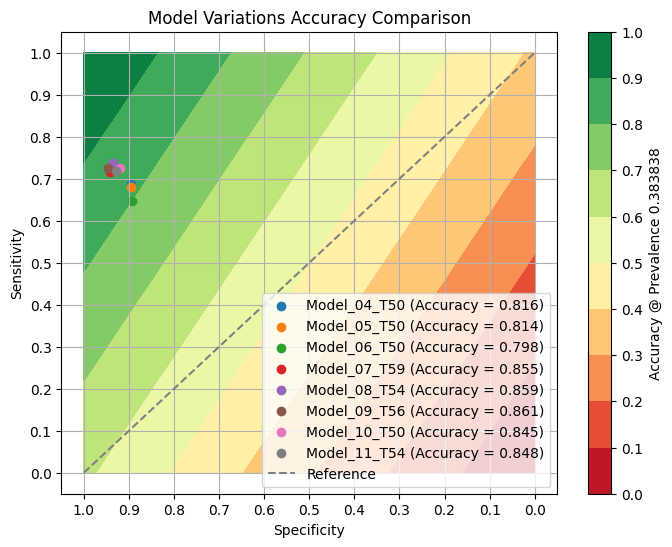

In [171]:
# Plot data points for model variations that yield the highest accuracy score

# Specify figure size
plt.figure(figsize=(8,6))

# Configure contour map
levels = np.linspace(0,1,11) # Set number of contour levels
plt.contourf(specificity_range, sensitivity_range, accuracy_table, cmap='RdYlGn', levels = levels)
plt.colorbar(label=f"Accuracy @ Prevalence {prevalence}", ticks=np.arange(0, 1.1, 0.1))  # Add a colorbar for legend

# Location of data table
data_table = model_max_accuracy_thresholds

# Iterate through data table
for model_name in data_table.index:
    x_data = data_table.loc[model_name, 'Specificity']
    y_data = data_table.loc[model_name, 'Sensitivity']
    accuracy = data_table.loc[model_name, 'Accuracy']
    plt.scatter(x_data, y_data, label = f"{model_name} (Accuracy = {accuracy:.3f})") # Single data point
    
# Plot Reference Curve
# This correspond to a classifier no better than random chance
plt.plot((1,0),(0,1), color= 'grey', linestyle='--', label = "Reference")

# Set the x-axis and y-axis ranges
# Add +/- 0.05 padding to each range to make the plot easier to read
plt.xlim(1.05, -0.05) # By tradition the Specificity is plotted in reverse from 1 to 0
plt.ylim(-0.05, 1.05) 

# Set labels
plt.title("Model Variations Accuracy Comparison")
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")

# Set grid lines
# Create ticks at intervals of 0.1 using numpy arrange
ticks = np.arange(0, 1.1, 0.1)  # Includes 1.0 for full range
plt.xticks(ticks)  # Major ticks at intervals of 0.1
plt.yticks(ticks)  # Major ticks at intervals of 0.1
plt.grid(True)  # Add gridlines



plt.legend()

plt.show()

Okay. Let's update our central model_scores table with the preliminary scores for our new model variations.

              Accuracy
Model_01      0.616162
Model_02      0.786756
Model_03      0.719416
Model_04      0.815937
Model_04_T40  0.810325
Model_05      0.813692
Model_06      0.797980
Model_07      0.836139
Model_07_T59  0.855219
Model_08      0.849607
Model_08_T54  0.858586
Model_09      0.848485
Model_09_T56  0.860831
Model_10      0.845118
Model_11      0.845118
Model_11_T54  0.848485


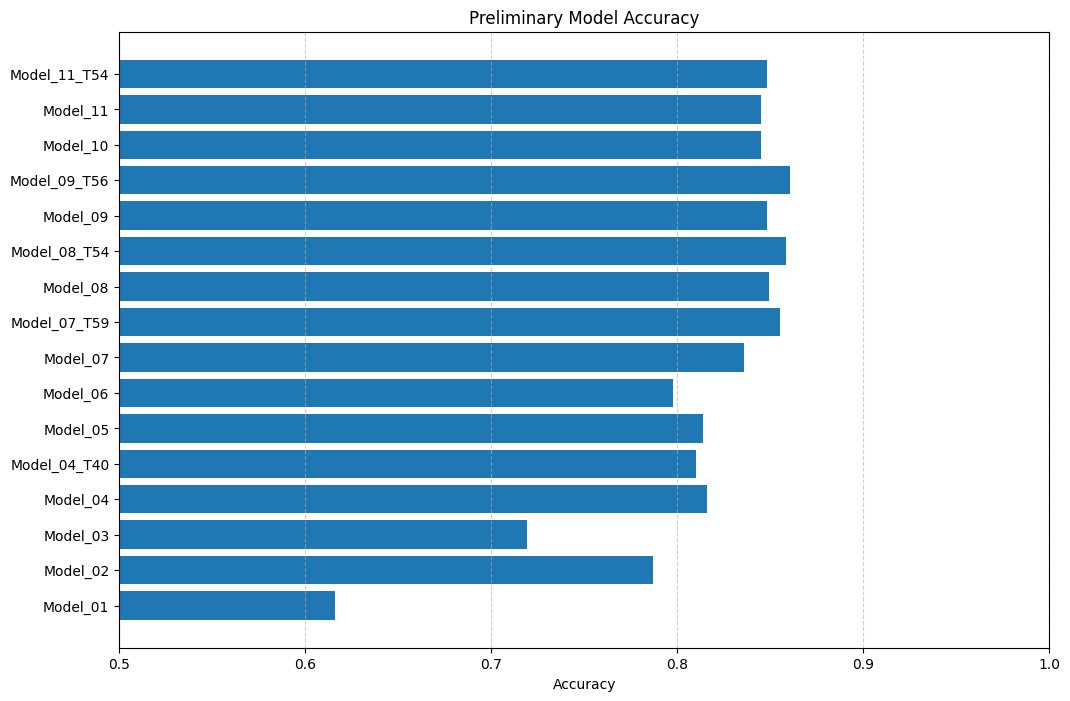

In [172]:
# Add the preliminary predictions to our main score card (for later comparison with other models)
# We do not need to make entries for the 'T50' variations. These are the default models already in the socre card table.

###### Model 7 Threshold 59 % ######
model_name = 'Model_07_T59'
probs_table = probs_model_7
threshold = 59 # Specify 59% threshold
predictions_column = f"Thresh_{threshold}"
predictions_table = get_survival_for_threshold (probs_table, threshold) 
score_card[model_name] = predictions_table[predictions_column] # Grab the predictions column
model_scores[model_name] = check_score(model_name, score_card) # Recalculate model score

###### Model 8 Threshold 54 % ######
model_name = 'Model_08_T54'
probs_table = probs_model_8
threshold = 54 # Specify 54% threshold
predictions_column = f"Thresh_{threshold}"
predictions_table = get_survival_for_threshold (probs_table, threshold) 
score_card[model_name] = predictions_table[predictions_column] # Grab the predictions column
model_scores[model_name] = check_score(model_name, score_card) # Recalculate model score

###### Model 9 Threshold 56 % ######
model_name = 'Model_09_T56'
probs_table = probs_model_9
threshold = 56 # Specify 56% threshold
predictions_column = f"Thresh_{threshold}"
predictions_table = get_survival_for_threshold (probs_table, threshold) 
score_card[model_name] = predictions_table[predictions_column] # Grab the predictions column
model_scores[model_name] = check_score(model_name, score_card) # Recalculate model score

###### Model 11 Threshold 54 % ######
model_name = 'Model_11_T54'
probs_table = probs_model_11
threshold = 54 # Specify 54% threshold
predictions_column = f"Thresh_{threshold}"
predictions_table = get_survival_for_threshold (probs_table, threshold) 
score_card[model_name] = predictions_table[predictions_column] # Grab the predictions column
model_scores[model_name] = check_score(model_name, score_card) # Recalculate model score

# Sort the dictionary
model_scores = dict(sorted(model_scores.items())) # Sort the dictionary by keys

# Plot the comparison of model scores
plot_model_scores(model_scores, "Preliminary Model Accuracy")

Let's also tabulate the key performance metrics for all of the candidate models, then rank these by accuracy score.

In [173]:
######## Calculate extended performance metrics ########

# List model names
model_names = ('Model_07', 'Model_07_T59', 'Model_08', 'Model_08_T54', 'Model_09', 'Model_09_T56', 'Model_10', 'Model_11', 'Model_11_T54')

# Location of model predictions
model_predictions = score_card
    
# Generate metrics using our expanded function
for model_name in model_names:
    performance_metrics = get_performance_metrics(model_name, get_error_matrix(model_name, model_predictions))
    
    # Append the returned performance metrics for each iteration to the main dictionary
    candidate_model_performance_metrics_dict.update(performance_metrics)
    
# Create dataframe from the main dictionary (wipe out original version)
candidate_model_performance_metrics = pd.DataFrame.from_dict(candidate_model_performance_metrics_dict, orient='index')

# Select required columns for metrics table
selected_columns = ['Accuracy', 'Prevalence','Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1_Score'] 

# Rank table by accuracy
candidate_models_metrics_summary = candidate_model_performance_metrics[selected_columns]
candidate_models_metrics_summary = candidate_models_metrics_summary.sort_values(by='Accuracy', ascending=False)

# View table
candidate_models_metrics_summary

,Accuracy,Prevalence,Sensitivity,Specificity,Precision,Recall,F1_Score
Model_09_T56,0.860831,0.383838,0.725146,0.945355,0.892086,0.725146,0.800000
Model_08_T54,0.858586,0.383838,0.736842,0.934426,0.875000,0.736842,0.800000
Model_07_T59,0.855219,0.383838,0.716374,0.941712,0.884477,0.716374,0.791599
Model_08,0.849607,0.383838,0.742690,0.916211,0.846667,0.742690,0.791277
Model_09,0.848485,0.383838,0.748538,0.910747,0.839344,0.748538,0.791345
Model_11_T54,0.848485,0.383838,0.719298,0.928962,0.863158,0.719298,0.784689
Model_10,0.845118,0.383838,0.725146,0.919854,0.849315,0.725146,0.782334
Model_11,0.845118,0.383838,0.730994,0.916211,0.844595,0.730994,0.783699
Model_07,0.836139,0.383838,0.739766,0.896175,0.816129,0.739766,0.776074
Model_04,0.815937,0.383838,0.687135,0.896175,0.804795,0.687135,0.741325


So, our current lead contender is Model_09_T56, with a preliminary accuracy score of 0.860831 and an F1 score of 0.8000. This is closely followed by Model_08_T54 with accuracy 0.858586 and an equal F1 score 0.8000. 

We will now see how all of our new models perform against the *test* data set. Firstly, however, we will need to prepare the test data set.

## Prepare Test Data Set
A quick check on the columns in the test data set shows us that we have yet to complete our generation of derived features as we did for the training data set. We need to calculate columns for 'Age_group', 'Fare_group', and 'Title_group'. So let's sort this out now.

In [174]:
# Check list of columns in the test data set
test_data.columns.tolist()

['PassengerId',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'IsWoCh',
 'Family_size']

In [175]:
# Add 'Age_group' feature (column) to test data set

# First we define the age ranges and corresponding labels
bins = [0, 11, 21, 31, 41, 51, 61, 71, 81, 100]  # Adjust the bins according to your desired age groups
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60','61-70','71-80', 'Unknown']

# Now add the new column. We use the pd.cut function to categorise the Age based on the Age Group bins.
test_data['Age_group'] = pd.cut(test_data['Age'], bins=bins, labels=labels, right=False)

# Check for Nulls
# Here we simply replace the null Age Group values with "Unknown".
test_data['Age_group'] = test_data['Age_group'].fillna('Unknown')

# Quick check on the resulting Age Group column and corresponding Age values. Remark out if not needed.
columns = ['Age_group', 'Age']
test_data[columns]

,Age_group,Age
0,31-40,34.5
1,41-50,47.0
2,61-70,62.0
3,21-30,27.0
4,21-30,22.0
...,...,...
413,Unknown,NaN
414,31-40,39.0
415,31-40,38.5
416,Unknown,NaN


In [176]:
# Add 'Fare_group' feature (column) to test data set

# First we define the fare ranges and corresponding labels
bins = [0, 8, 15, 30, 600]  # Same as used for the train data set
labels = ['0-8', '9-15', '16-30', '>30']

# Now add a new column. We use the pd.cut function to categorise the Fare based on the Fare Group bins.
test_data['Fare_group'] = pd.cut(test_data['Fare'], bins=bins, labels=labels, right=False)

# Quick check on the resulting Age Group column and corresponding Age values. Remark out if not needed.
columns = ['Fare_group', 'Fare']
test_data[columns]

,Fare_group,Fare
0,0-8,7.8292
1,0-8,7.0000
2,9-15,9.6875
3,9-15,8.6625
4,9-15,12.2875
...,...,...
413,9-15,8.0500
414,>30,108.9000
415,0-8,7.2500
416,9-15,8.0500


In [177]:
# Check for null values in the Fare_group column
test_data[test_data['Fare_group'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsWoCh,Family_size,Age_group,Fare_group
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,False,1,51-60,NaN


In [178]:
# The above passenger (located at row index 152) is in passenger ticket class (Pclass) = 3
# So we shall assume a Fare_group of '0-8'
test_data.loc[152, 'Fare_group'] = '0-8'
test_data.query('PassengerId == 1044')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsWoCh,Family_size,Age_group,Fare_group
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,False,1,51-60,0-8


In [179]:
# Extract titles from the Name column and place in a new column called 'Title'
for i in range(len(test_data)):
    idx_1 = test_data.loc[i,'Name'].find(',') # find the index of the first comma (",") in the Name string
    idx_2 = test_data.loc[i,'Name'].find('.') # find the index of the first full stop (".") in the Name string
    if idx_2 > idx_1: # which should be the case for all of the Name data
        test_data.loc[i,'Title'] = test_data.loc[i,'Name'][idx_1+1:idx_2].strip() # Slice the string and strip any whitespace

# test_data['Title'].head(10)

# Check unique titles
# test_data['Title'].unique()

# Check for nulls in Title column
# test_data[test_data['Title'].isnull()]


# Normalise Titles using a new column called Title_group

for i in range(len(test_data)):
    if test_data.loc[i,'Title'] == 'Mr':
        test_data.loc[i,'Title_group'] = 'Mr'  
    elif test_data.loc[i,'Title'] == 'Master':
        test_data.loc[i,'Title_group'] = 'Master'
    elif test_data.loc[i,'Title'] in ('Mrs','Mme'):
        test_data.loc[i,'Title_group'] = 'Mrs'
    elif test_data.loc[i,'Title'] in ('Miss','Mlle', 'Ms'):
        test_data.loc[i,'Title_group'] = 'Miss'
    else:
        test_data.loc[i,'Title_group'] = 'Rare Title'
        
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsWoCh,Family_size,Age_group,Fare_group,Title,Title_group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,False,1,31-40,0-8,Mr,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,True,2,41-50,0-8,Mrs,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,False,1,61-70,9-15,Mr,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,False,1,21-30,9-15,Mr,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,True,3,21-30,9-15,Mrs,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Unknown,1,Unknown,9-15,Mr,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,True,1,31-40,>30,Dona,Rare Title
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,False,1,31-40,0-8,Mr,Mr
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Unknown,1,Unknown,9-15,Mr,Mr


Okay. Having prepared the test data set, we are now ready to generate survival predictions.

## Generate Predictions against Test Data

We shall now generate survival predictions for each of our new models using the *test* data set. We will then submit these to the Kaggle competition to obtain the public scores. Let's see how we get on.

In [180]:
# Prepare predictions submission file for a model

def prep_prediction_submission (model_name, features_input, train_data_input, test_data_input, threshold_input):
    
    # Calculate probabilities using existing function
    probs_table = get_random_forest_probs(features_input, train_data_input, test_data_input)

    # Calculate model predictions for the input threshold value (percentage)
    predictions = get_survival_for_threshold (probs_table, threshold_input)
    
    # Grab predictions column
    predictions_column = f"Thresh_{threshold}"

    # Prepare submission file
    output = predictions[['PassengerId', predictions_column]].rename(columns={predictions_column: 'Survived'})

    # Save the predicted data to a csv file ready for submission
    output_file_name = f"submission_{model_name.lower()}.csv"
    output.to_csv(output_file_name, index=False)
    print(f"Your {output_file_name} file was successfully saved!")
    
    return output

In [181]:
# Model 7 - Wide selection of features
model_name = 'Model_07'
features = ["Pclass", "Sex", "SibSp", "Parch", "Age_group", "Family_size", "Fare_group", "Title_group", "IsWoCh"]
threshold = 50 # Note that 50% is the default threshold for a random forest model
predictions_model_7 = prep_prediction_submission (model_name, features, train_data, test_data, threshold)

# Model 7 (Threshold 59%)
model_name = 'Model_07_T59'
features = ["Pclass", "Sex", "SibSp", "Parch", "Age_group", "Family_size", "Fare_group", "Title_group", "IsWoCh"]
threshold = 59 # Threshold 59%
predictions_model_7_t59 = prep_prediction_submission (model_name, features, train_data, test_data, threshold)

##### Model 8 (Combo_295 - 1st place) #####
model_name = 'Model_08' 
features = ['Pclass', 'SibSp', 'Age_group', 'Fare_group', 'Title_group']
threshold = 50 # Note that 50% is the default threshold for a random forest model
predictions_model_8 = prep_prediction_submission (model_name, features, train_data, test_data, threshold)

##### Model 8 (Threshold 54%) #####
model_name = 'Model_08_T54' 
features = ['Pclass', 'SibSp', 'Age_group', 'Fare_group', 'Title_group']
threshold = 54 # Threshold 54%
predictions_model_8_t54 = prep_prediction_submission (model_name, features, train_data, test_data, threshold)

##### Model 9 (Combo_312 - 2nd place) #####
model_name = 'Model_09'
features = ['Pclass', 'Age_group', 'Family_size', 'Fare_group', 'Title_group']
threshold = 50 # Note that 50% is the default threshold for a random forest model
predictions_model_9 = prep_prediction_submission (model_name, features, train_data, test_data, threshold)

##### Model 9 (Threshold 56%) #####
model_name = 'Model_09_T56'
features = ['Pclass', 'Age_group', 'Family_size', 'Fare_group', 'Title_group']
threshold = 56 # Threshold 56%
predictions_model_9_t56 = prep_prediction_submission (model_name, features, train_data, test_data, threshold)

##### Model 10 (Combo_154 - joint 3rd place) #####
model_name = 'Model_10'
features = ['Pclass', 'SibSp', 'Fare_group', 'Title_group']
threshold = 50 # Note that 50% is the default threshold for a random forest model
predictions_model_10 = prep_prediction_submission (model_name, features, train_data, test_data, threshold)

##### Model 11 (Combo_173 - joint 3rd place) #####
model_name = 'Model_11'
features = ['Pclass', 'Family_size', 'Fare_group', 'Title_group']
threshold = 50 # Note that 50% is the default threshold for a random forest model
predictions_model_11 = prep_prediction_submission (model_name, features, train_data, test_data, threshold)

##### Model 11 (Threshold 54%) #####
model_name = 'Model_11_T54'
features = ['Pclass', 'Family_size', 'Fare_group', 'Title_group']
threshold = 54 # Threshold 54%
predictions_model_11_t54 = prep_prediction_submission (model_name, features, train_data, test_data, threshold)

Your submission_model_07.csv file was successfully saved!
Your submission_model_07_t59.csv file was successfully saved!
Your submission_model_08.csv file was successfully saved!
Your submission_model_08_t54.csv file was successfully saved!
Your submission_model_09.csv file was successfully saved!
Your submission_model_09_t56.csv file was successfully saved!
Your submission_model_10.csv file was successfully saved!
Your submission_model_11.csv file was successfully saved!
Your submission_model_11_t54.csv file was successfully saved!


# Public vs Preliminary Score Rankings
So, here are the results from the Kaggle jury.

              Accuracy
Model_01       0.62200
Model_02       0.76555
Model_03       0.71052
Model_04       0.77511
Model_04_T40   0.75358
Model_05       0.77511
Model_06       0.74880
Model_07       0.77990
Model_07_T59   0.78468
Model_08       0.77033
Model_08_T54   0.77272
Model_09       0.77751
Model_09_T56   0.78468
Model_10       0.76794
Model_11       0.76794
Model_11_T54   0.76794


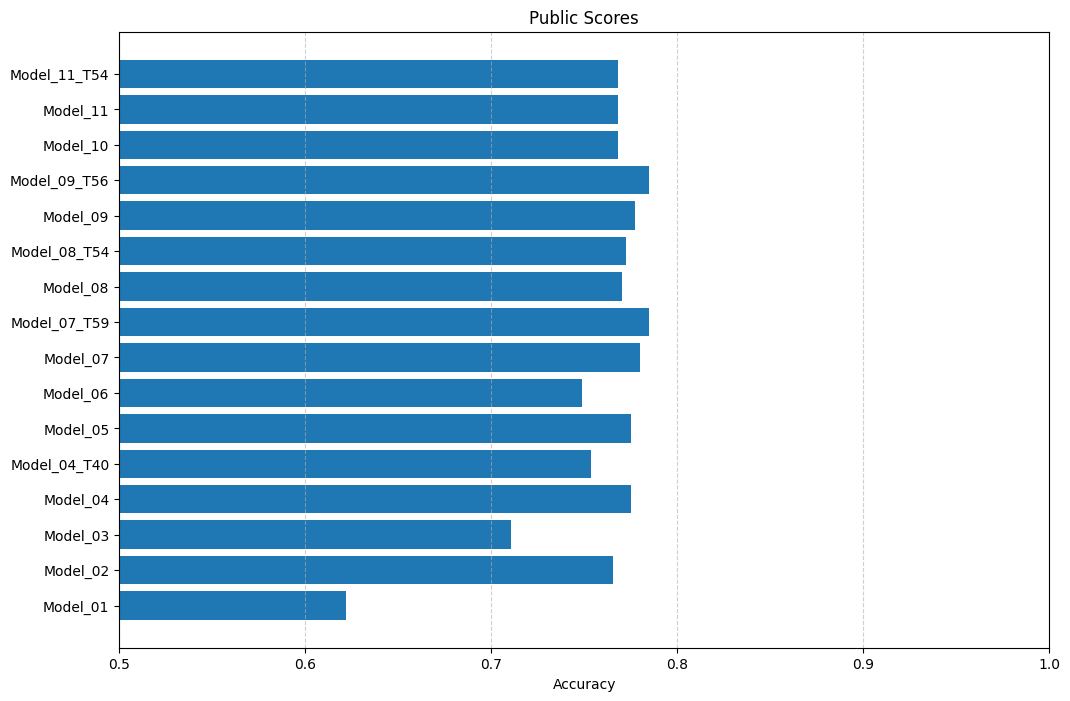

In [182]:
# Add public scores to dictionary

public_scores["Model_07"] = 0.77990       # Random Forest - Pclass, Sex, SibSp, Parch, Age_group, Family_size, Fare_group, Title_group, IsWoCh
public_scores["Model_07_T59"] = 0.78468   # Random Forest - Pclass, Sex, SibSp, Parch, Age_group, Family_size, Fare_group, Title_group, IsWoCh
public_scores["Model_08"] = 0.77033       # Random Forest - Pclass, SibSp, Age_group, Fare_group, Title_group
public_scores["Model_08_T54"] = 0.77272   # Random Forest - Pclass, SibSp, Age_group, Fare_group, Title_group - Threshold 54%
public_scores["Model_09"] = 0.77751       # Random Forest - Pclass, Age_group, Family_size, Fare_group, Title_group
public_scores["Model_09_T56"] = 0.78468   # Random Forest - Pclass, Age_group, Family_size, Fare_group, Title_group - Threshold 56%
public_scores["Model_10"] = 0.76794       # Random Forest - Pclass, SibSp, Fare_group, Title_group
public_scores["Model_11"] = 0.76794       # Random Forest - Pclass, Family Size, Fare_group, Title_group
public_scores["Model_11_T54"] = 0.76794    # Random Forest - Pclass, Family Size, Fare_group, Title_group

# Plot the public scores using our predefined function
plot_model_scores(public_scores, "Public Scores")

As expected, once again, the public scores (derived from running the models against the test data set) are of lower magnitude than the equivalent preliminary scores (derived from the training data set). Let's now look at the rankings. The first table below is the ranking by public score. The second table is the ranking by preliminary score.

In [183]:
# Rank public scores
rank_public_scores = pd.DataFrame({'Public': public_scores}).sort_values(by='Public', ascending=False)

# View table
rank_public_scores

,Public
Model_07_T59,0.78468
Model_09_T56,0.78468
Model_07,0.77990
Model_09,0.77751
Model_04,0.77511
Model_05,0.77511
Model_08_T54,0.77272
Model_08,0.77033
Model_10,0.76794
Model_11,0.76794


In [184]:
# Rank preliminary scores
rank_preliminary_scores = pd.DataFrame({'Preliminary': model_scores}).sort_values(by='Preliminary', ascending=False)

# View table
rank_preliminary_scores

,Preliminary
Model_09_T56,0.860831
Model_08_T54,0.858586
Model_07_T59,0.855219
Model_08,0.849607
Model_09,0.848485
Model_11_T54,0.848485
Model_10,0.845118
Model_11,0.845118
Model_07,0.836139
Model_04,0.815937


Comparing the two tables above, we see an interesting shift in the rankings of the models. Earlier, we conjectured that we should at least be able to predict which models should make it to the top 5 based on their preliminary scores. Our 'forecast' suggested it would be a close call between the 'optimised' variants of Models 07, 08, 09, 10 and 11. The preliminary scores for the other random forest models (Models 04, 05 and 06) were noticeably lower than these.

Well, the public scores table shows that we were partly right. Certainly, Models 07 and 09 (especially their variants) swept the board, so to speak, taking joint 1st place.  Model 08 (one of our potential high performers) slipping down the rankings somewhat, just above Models 10 and 11. But the real surprise is that Models 04 and 05 (from our original set of models) remain as star performers when run against the test data set, giving Models 07 and 09 a good run for their money!

So, our predicted rankings based on preliminary accuracy score were not totally reliable. Indeed, it appears to be anyone's guess as to how a particular model will actually perform on the test data set in terms of final rankings? Perhaps there is a clue to be found with our other preliminary metrics? For example, let's look at the F1 score rankings below.

In [185]:
# Rank F1 scores
f1_scores_df = pd.DataFrame({'F1_Score': candidate_model_performance_metrics['F1_Score']})
rank_f1_scores = f1_scores_df.sort_values(by='F1_Score', ascending=False)

# View table
rank_f1_scores

,F1_Score
Model_09_T56,0.800000
Model_08_T54,0.800000
Model_07_T59,0.791599
Model_09,0.791345
Model_08,0.791277
Model_11_T54,0.784689
Model_11,0.783699
Model_10,0.782334
Model_07,0.776074
Model_04_T40,0.753285


A quick cross-check finds that the F1 score rankings are "roughly" in the same order as the preliminary score rankings. In other words, the F1 score ranking has exactly the same problem in that it does not act as a predictor for the ranking of final public scores.

What about AUC values for the ROC curves? The ranked values are below.

In [186]:
# Rank AUC values
rank_auc_values = auc_all_models.sort_values(by='AUC', ascending=False)
rank_auc_values

,AUC
Model_07,0.901666
Model_09,0.893363
Model_11,0.893038
Model_08,0.890833
Model_10,0.886588
Model_05,0.873135
Model_04,0.869316
Model_06,0.867670
Model_02,0.766873
Model_03,0.735380


We see that the top two models in terms of their AUC values are Model_07 and Model_09. Arguably, this at least shows some resemblance to the ranking in the public scores table. However, it all falls apart after that, especially with the AUC ranking of Models 04 and 05, which does not reflect their final elevated positions in the public table.

Anyway, let's press on. We will now make one last final foray to see if we can improve on our public scores before closing out this analysis (it's time to start calling it a day!).

# Optimise Random Forest Hyperparameters

We will now turn our attention to random forest 'hyperparameters'. In their book [Practical Statistics for Data Scientists](https://www.google.co.uk/books/edition/Practical_Statistics_for_Data_Scientists/k2XcDwAAQBAJ?hl=en&gbpv=0) (page 269), the authors explain that "[t]he random forest, as with many statistical machine learning algorithms, can be considered a black-box algorithm with knobs to adjust how the box works. These knobs are called *hyperparameters*, which are parameters that you need to set before fitting a  model; they are not optimised as part of the training process". They also warn that "the hyperparameters for random forest are ... critical, especially to avoid overfitting", and further advise that while "[i]t may be tempting to ignore these parameters and simply go with the default values", this may "lead to  overfitting when you apply the random forest to noisy data".

So, let's explore this. For all of our random forest model runs up until now, we have simply used these settings for the following hyperparameters for the Scikit Learn classifier:

> n_estimators = 100 (Specifies the number of decision trees to use in the forest. Default value 100.)

> max_depth = 5 (Specifies the maximum depth for each individual tree. Default value None.)

There are also a bunch of other hyperparameters that may be tweaked. According to our reference book authors, "[i]n particular, the two most important hyperparameters for the random forest are":

> min_samples_leaf (This refers to the minimum number of samples allowed in a leaf node. Default 1.)

> max_leaf_nodes (This restricts the maximum number of leaf nodes per tree. If None (default), there is no limit).

So let's take a quick look at what we can do here. We will not spend too much time diving into detail (we will leave that for another day). Let's just see if we might "squeeze out" some additional accuracy scores from our models.

First we need to modify some of our previous functions to allow the passing of different combinations of model hyperparameters to these functions. Here, we could go back and simply update our existing functions, but then we would need to modify all of our earlier code that calls these functions. Instead we will simply make renamed copies of the pertinent functions, and then modify them accordingly. The three main functions that we require are shown in the hidden cells below. 

The first function is used to train a random forest model and to extract the calculated the survival probabilities for each passenger based on that model. 

In [187]:
# Define a function to train a random forest model and extract probabilities
# Also allows some hyperparameters to be passed to the function

def get_random_forest_probs_hyper(features_input, train_data_input, test_data_input, hyperparams_input):
    
    # Set target variable
    y_train = train_data_input["Survived"]
    
    # Grab the list of features and perform one-hot encoding
    X_train = pd.get_dummies(train_data_input[features_input])
    X_test = pd.get_dummies(test_data_input[features_input])
    
    # Extract model hyperparameters from the input tuple
    n_estimators_input = hyperparams_input[0]
    max_depth_input = hyperparams_input[1]
    min_samples_leaf_input = hyperparams_input[2]
    max_leaf_nodes_input = hyperparams_input[3]
    
    model = RandomForestClassifier(n_estimators = n_estimators_input, 
                                   max_depth = max_depth_input, 
                                   min_samples_leaf =  min_samples_leaf_input,
                                   max_leaf_nodes = max_leaf_nodes_input,
                                   random_state=1)
    
    # Train the model
    
    model.fit(X_train, y_train)
    
    # Predict class labels (Survived = 0 or Surived = 1) as we have done previously
    # This is performed at the default 50% cutoff threshold.
    y_predict = model.predict(X_test)
    
    # Predict probabilities using 'proba' argument.
    y_proba_false = model.predict_proba(X_test)[:, 0] # The first column (index 0) of the output array
    y_proba_true = model.predict_proba(X_test)[:, 1] # The second column (index 1) of the output array
    
    # Store the results in a dataframe along with PassengerId and Actual Survival data.
    model_probs = pd.DataFrame({'PassengerId': test_data_input.PassengerId, 'Predict_Survived': y_predict, 
                                'Prob_False': y_proba_false, 'Prob_True': y_proba_true})
    
    return model_probs

The second function in the hidden cell below takes the generated table of survival probabilites from above, and uses it to generate a table of binary survival predictions (either 1 or 0) for the passengers across a specified range of thresholds that is passed to the function. It then calculates the corresponding model performance metrics (eg, accuracy, sensitivity, specificity, error matrix, etc) for each threshold iteration.

In [188]:
# Define function to get ROC data and other metrics for random forest model
# Also allows some hyperparameters to be passed to the function

def get_roc_data_hyper(model_name, features_input, train_data_input, test_data_input, thresh_range_input, hyperparams_input):

    # Calculate probabilities using exisitng function
    probs_model = get_random_forest_probs_hyper(features_input, train_data_input, test_data_input, hyperparams_input)

    # Add the Actual Survival data to the table
    probs_model['Actual'] = train_data_input.Survived

    # Calculate model predictions for a range of thresholds
    model_predictions = get_survival_for_threshold_range (probs_model, thresh_range_input)

    # Select columns which will represent our model names for each threshold
    model_names = list(model_predictions.columns[3:]) # Grab column names from index 3 onwards
    
    # Initialise a new dictionary to capture the performance metrics
    thresh_performance_metrics_dict ={}
    
    # Generate metrics using our new expanded function
    for model_name in model_names:
        performance_metrics = get_performance_metrics(model_name, get_error_matrix(model_name, model_predictions))
    
        # Append the returned performance metrics for each iteration to the main dictionary
        thresh_performance_metrics_dict.update(performance_metrics)
    
    # Create dataframe from the main dictionary
    threshold_performance_metrics = pd.DataFrame.from_dict(thresh_performance_metrics_dict, orient='index')

    return threshold_performance_metrics

The third of our main functions determines the threshold iteration at which the model achieved the maximum preliminary 'accuracy' score.

In [189]:
# Function to select the threshold at which maximum 'accuracy' is achieved for a model
# Also allows some hyperparameters to be passed to the function

def get_thresh_max_accuracy_hyper(model_name, features_input, train_data_input, test_data_input, thresh_range_input, hyperparams_input):
    
    # Calculate threshold performance metrics
    threshold_performance_metrics = get_roc_data_hyper(model_name, features_input, train_data_input, test_data_input, thresh_range_input, hyperparams_input)

    # Row index with highest accuracy value (first row if more than one row with max value)
    thresh_with_max_accuracy = threshold_performance_metrics['Accuracy'].idxmax()
    
    # Check to see if this row has a higher accuracy than the row at the default threshold of 50%
    if threshold_performance_metrics.loc['Thresh_50', 'Accuracy'] == threshold_performance_metrics.loc[thresh_with_max_accuracy, 'Accuracy']:
        thresh_with_max_accuracy = 'Thresh_50' # We will just take the default threshold rather than the 'first' threshold found
    
    # Dump the row values to a dictionary
    row_dict = threshold_performance_metrics.loc[thresh_with_max_accuracy].to_dict()
    
    # Add parent model name to the dictionary (to make for easy querying later)
    row_dict['Parent_Model'] = model_name
    
    # Add hyperparameters to the dictionary
    row_dict['n_estimators'] = hyperparams_input[0]
    row_dict['max_depth'] = hyperparams_input[1]
    row_dict['min_samples_leaf'] = hyperparams_input[2]
    row_dict['max_leaf_nodes'] = hyperparams_input[3]
    
    # Assign model name for index
    short_thresh_name = thresh_with_max_accuracy.replace('hresh_', "") # eg 'Thresh_40' becomes "T40"
    hyper_indicator = "_".join(map(str, hyperparams_input)) # Convert tuple values to a string
    new_model_name = f"{model_name}_{short_thresh_name}_{hyper_indicator}"
    
    # Create new dictionary with new_model_name as an index
    new_dict = {new_model_name : row_dict}
    
    return new_dict

Now we get to our main code. Firstly we specify the range of threshold values to consider in each iteration loop. Just as before, we assume that the maximum accuracy that a model can achieve is at a threshold in the range from 40% to 60%. 

We then set up an iteration loop for the model hyperparameters. We specify a set of values for each of our hyperparameters, then we use the itertools 'product' method to generate different combinations of hyperparameter settings that are then passed through to our modified functions for processing. 

So, for example, in the setup we have below, we will be iterating through 3 values for the 'n_estimators' hyperparameter, 3 values for 'max_depth' and, again, 3 values for 'min_samples_leaf'. We will keep the setting for 'max_leaf_node' at its default value 'None' for all iterations. That gives us a total number of hyperparameter combinations of 3 x 3 x 3 x 1 = 27 combinations. Then for each combination we train each of our random forest models. We have 8 'parent' models in total (Model 04 thru Model 11). So that means we generate a total of 8 x 27 = 216 model variations. Finally, for each model variation we then calculate the model performance metrics across a total of 21 threshold values (40% to 60% inclusive). Thus, behind the scenes, we will have generated a total of 216 x 21 = 4,536 rows of performance metrics values. However, we are only interested in the threshold value at which we achieve maximum 'accuracy' for each particular model variation, so we only grab 1 row out of the 21 thresholds that were considered. This means that our final returned table will just contain a total of 216 rows. Approximate time to run this code is of the order of 17 minutes.



In [190]:
# For each model calculate the threshold value for which maximum accuracy is obtained.
# We assume that maximum accuracy is achived in the treshold range 40% to 60%.
# Repeat this for different combinations of model hyperparameters

# Set threshold range
thresh_range = (40, 61, 1) # From 40 to 60 in steps of 1%

##### WARNING: this iteration code below takes a long time to run ######
# For example, 9 combinations will take around 17 minutes total time to run.

# Capture start time
start_time = time.time()  

# Specify model hyperparameter values to evaluate
# Keep lists small in length.
n_estimators_list = [50, 100, 150,]
max_depth_list = [4, 5, 6,]
min_samples_leaf_list = [1, 2, 3]
max_leaf_nodes_list = [None] # Keep as default

# Set up iterator
all_combinations = product(n_estimators_list, max_depth_list, min_samples_leaf_list, max_leaf_nodes_list)

# Create a master dictionary to store the returned results
model_max_accuracy_summary_dict = {}

# Iterate through each combination of hyperparameters
for combination in all_combinations:
    n_estimators, max_depth, min_samples_leaf, max_leaf_nodes = combination # Unpack the values
    hyperparams = (n_estimators, max_depth, min_samples_leaf, max_leaf_nodes) # Assign values to tuple

    # Iterate through the rf_model_features dictionary
    for model_name, features in rf_model_features.items():
    
        # Call function to find the threshold at which maximum accuracy is obtained. Returns a dictionary with row values.
        thresh_max_acc_dict = get_thresh_max_accuracy_hyper(model_name, features, train_data, train_data, thresh_range, hyperparams)
    
        # Append the returned dictionary to the master dictionary
        model_max_accuracy_summary_dict.update(thresh_max_acc_dict)
    

# Capture end time and calculate executuion time    
end_time = time.time()  # Capture end time
execution_time = end_time - start_time # total execution time in seconds
    
##### Generate table of results
    
# Create dataframe from master dictionary
model_max_accuracy_summary = pd.DataFrame.from_dict(model_max_accuracy_summary_dict, orient='index')

# Select columns to display
key_metrics_columns = ['Accuracy', 'Prevalence', 'Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1_Score']
parent_model_column = ['Parent_Model']
hyper_columns = ['n_estimators', 'max_depth', 'min_samples_leaf', 'max_leaf_nodes']
selected_columns = key_metrics_columns + parent_model_column + hyper_columns

# View table
model_max_accuracy_summary[selected_columns]

# Make a copy of the table of each run
# run_1 = model_max_accuracy_summary.copy()
# run_2 = model_max_accuracy_summary.copy()

,Accuracy,Prevalence,Sensitivity,Specificity,Precision,Recall,F1_Score,Parent_Model,n_estimators,max_depth,min_samples_leaf,max_leaf_nodes
Model_04_T50_50_4_1_None,0.813692,0.383838,0.678363,0.897996,0.805556,0.678363,0.736508,Model_04,50,4,1,None
Model_05_T50_50_4_1_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,50,4,1,None
Model_06_T43_50_4_1_None,0.795735,0.383838,0.637427,0.894353,0.789855,0.637427,0.705502,Model_06,50,4,1,None
Model_07_T60_50_4_1_None,0.836139,0.383838,0.725146,0.905282,0.826667,0.725146,0.772586,Model_07,50,4,1,None
Model_08_T52_50_4_1_None,0.843996,0.383838,0.722222,0.919854,0.848797,0.722222,0.780411,Model_08,50,4,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...
Model_07_T59_150_6_3_None,0.849607,0.383838,0.710526,0.936248,0.874101,0.710526,0.783871,Model_07,150,6,3,None
Model_08_T55_150_6_3_None,0.852974,0.383838,0.733918,0.927140,0.862543,0.733918,0.793049,Model_08,150,6,3,None
Model_09_T55_150_6_3_None,0.854097,0.383838,0.730994,0.930783,0.868056,0.730994,0.793651,Model_09,150,6,3,None
Model_10_T55_150_6_3_None,0.843996,0.383838,0.719298,0.921676,0.851211,0.719298,0.779715,Model_10,150,6,3,None


Let's now rank the table by 'accuracy' and look at the top 20 model variations.

In [191]:
# Rank the results by accuracy
rank_model_max_accuracy_summary = model_max_accuracy_summary.sort_values(by='Accuracy', ascending=False)

# View table
rank_model_max_accuracy_summary[selected_columns].head(20)

,Accuracy,Prevalence,Sensitivity,Specificity,Precision,Recall,F1_Score,Parent_Model,n_estimators,max_depth,min_samples_leaf,max_leaf_nodes
Model_09_T57_150_6_1_None,0.865320,0.383838,0.733918,0.947177,0.896429,0.733918,0.807074,Model_09,150,6,1,None
Model_08_T54_50_6_1_None,0.864198,0.383838,0.736842,0.943534,0.890459,0.736842,0.806400,Model_08,50,6,1,None
Model_09_T58_50_6_1_None,0.863075,0.383838,0.730994,0.945355,0.892857,0.730994,0.803859,Model_09,50,6,1,None
Model_09_T58_100_6_1_None,0.863075,0.383838,0.730994,0.945355,0.892857,0.730994,0.803859,Model_09,100,6,1,None
Model_08_T55_150_6_1_None,0.863075,0.383838,0.733918,0.943534,0.890071,0.733918,0.804487,Model_08,150,6,1,None
Model_08_T53_100_6_1_None,0.863075,0.383838,0.736842,0.941712,0.887324,0.736842,0.805112,Model_08,100,6,1,None
Model_09_T56_100_5_1_None,0.860831,0.383838,0.725146,0.945355,0.892086,0.725146,0.800000,Model_09,100,5,1,None
Model_09_T57_100_6_2_None,0.860831,0.383838,0.730994,0.941712,0.886525,0.730994,0.801282,Model_09,100,6,2,None
Model_09_T58_150_6_2_None,0.859708,0.383838,0.730994,0.939891,0.883392,0.730994,0.800000,Model_09,150,6,2,None
Model_09_T54_50_6_2_None,0.859708,0.383838,0.733918,0.938069,0.880702,0.733918,0.800638,Model_09,50,6,2,None


Just as before, we see that the Model 09 and Model 08 variations dominate the top of the league table. Model 07 also creeps in lower down in the top 20. 

Before we dive in a little deeper, let's just see how the top model variant for each 'parent' model compares with the others. Here, we find the model variation that gives the highest accuracy. If there are multiple model variations with the same high accuracy score, then we find the 'simplest' model variation. We define the 'simplest' model as the one with the least values for n_estimators and max_depth, and the highest value for min_samples.

In [192]:
# For each parent model, find the model variation that gives the highest accuracy
# If there are multiple model variations with the same high accuracy score, then return the 'simplest' model.
# A 'simple' model is one with the least values for n_estimators and max_depth, and the highest value for min_samples.
# We need the following 3 functions.
# In our main code, the output of the first function gets passed to the second function. Then the output of the second function gets passed to the third function.

def get_max_score_per_parent(df):
  
    # Group the dataframe by the parent model
    grouped_df = df.groupby('Parent_Model')
  
    # Create an empty list to store results
    result_list = []

    # Loop through each group
    for name, group in grouped_df:
    
        # Find the maximum accuracy score for the group
        max_score = group['Accuracy'].max()
    
        # Define a function to create the mask for the group
        def create_mask(group_df, max_score):
            return (group_df['Parent_Model'] == group_df['Parent_Model']) & (group_df['Accuracy'] == max_score)

        # Apply the function and filter the group dataframe
        mask = create_mask(group, max_score)
        result_df = group[mask]
    
        # Append the filtered dataframe to the results list
        result_list.append(result_df)

    # Concatenate the results into a single dataframe
    result_df = pd.concat(result_list)
  
    return result_df
    
    
def get_min_params_per_parent(df):
    
    # Add new column to calculate combined values of n_estimators and max_depth
    df['combo_params'] = df['n_estimators'] + df['max_depth']
    
    # Group the dataframe by the parent model
    grouped_df = df.groupby('Parent_Model')
    
    # Create an empty list to store results
    result_list = []

    # Loop through each group
    for name, group in grouped_df:
        
        # Find the minimum value for combo_params for the group
        min_combo = group['combo_params'].min()
    
        # Define a function to create the mask for the group
        def create_mask(group_df, min_combo):
            return (group_df['Parent_Model'] == group_df['Parent_Model']) & (group_df['combo_params'] == min_combo)

        # Apply the function and filter the group dataframe
        mask = create_mask(group, min_combo)
        result_df = group[mask]
    
        # Append the filtered dataframe to the results list
        result_list.append(result_df)

    # Concatenate the results into a single dataframe
    result_df = pd.concat(result_list)
    
    # Drop the combo_params column
    result_df.drop('combo_params', axis=1)
  
    return result_df

def get_high_min_samples_per_parent(df):
    
    # Group the dataframe by the parent model
    grouped_df = df.groupby('Parent_Model')
    
    # Create an empty list to store results
    result_list = []

    # Loop through each group
    for name, group in grouped_df:
        
        # Find the highest value for min_samples_leaf for the group
        high_min_sample = group['min_samples_leaf'].max()
    
        # Define a function to create the mask for the group
        def create_mask(group_df, high_min_sample):
            return (group_df['Parent_Model'] == group_df['Parent_Model']) & (group_df['min_samples_leaf'] == high_min_sample)

        # Apply the function and filter the group dataframe
        mask = create_mask(group, high_min_sample)
        result_df = group[mask]
    
        # Append the filtered dataframe to the results list
        result_list.append(result_df)

    # Concatenate the results into a single dataframe
    result_df = pd.concat(result_list)
  
    return result_df




### Main Code ####    

# Chain the above functions to generate an increasingly filtered dataframe. 
max_accuracy_by_model = get_high_min_samples_per_parent(get_min_params_per_parent(get_max_score_per_parent(model_max_accuracy_summary)))

# Sort table
rank_highest_accuracy_for_parent_model = max_accuracy_by_model.sort_values(by='Accuracy', ascending=False)

# View table
rank_highest_accuracy_for_parent_model[selected_columns]

,Accuracy,Prevalence,Sensitivity,Specificity,Precision,Recall,F1_Score,Parent_Model,n_estimators,max_depth,min_samples_leaf,max_leaf_nodes
Model_09_T57_150_6_1_None,0.865320,0.383838,0.733918,0.947177,0.896429,0.733918,0.807074,Model_09,150,6,1,None
Model_08_T54_50_6_1_None,0.864198,0.383838,0.736842,0.943534,0.890459,0.736842,0.806400,Model_08,50,6,1,None
Model_07_T59_150_6_1_None,0.858586,0.383838,0.722222,0.943534,0.888489,0.722222,0.796774,Model_07,150,6,1,None
Model_11_T52_50_6_1_None,0.852974,0.383838,0.733918,0.927140,0.862543,0.733918,0.793049,Model_11,50,6,1,None
Model_10_T47_50_6_1_None,0.849607,0.383838,0.739766,0.918033,0.848993,0.739766,0.790625,Model_10,50,6,1,None
Model_04_T45_50_6_1_None,0.817059,0.383838,0.716374,0.879781,0.787781,0.716374,0.750383,Model_04,50,6,1,None
Model_05_T50_50_4_3_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,50,4,3,None
Model_06_T50_50_5_1_None,0.797980,0.383838,0.646199,0.892532,0.789286,0.646199,0.710611,Model_06,50,5,1,None


Firstly, let's remind ourselves of our original default set of hyperparameters. The original models were configured with 100 trees (n_estimators), a max_depth of 5, and a min_samples_leaf of 1.

In our generated table above, we now see that for each parent model we would achieve higher (or at least equal) accuracy values if we altered these default hyperparameter settings. For example,the top Model 09 variant was achieved using 150 trees (n_estimators) at a max_depth of 6. Similarly for the top Model 07 variant. Intuitively, this appears to makes sense. We are adding 50 additional trees and one extra layer to each model, which would tend to make the model 'more sophisticated' in its decision making. Of course, the danger of adding more complexity here is that we risk overfitting these models to the training data. The higher accuracy performance will not necessarily translate to the test data set.

Now, what is really interesting is the 'optimised' hyperparameter settings for the other models in the table above. Rather surprisingly, it appears that if we actually *reduce* the number of trees in each random forest to 50 (instead of the default 100), we get either an increase in accuracy performance or at least the same level of performance as the model variants that use 100 trees! Note that in most cases we would also need to increase the number of tree levels (max_depth) from 5 to 6 to achieve the higher score. The exceptions are the Model 06 variant, which retains the default max_depth value of 5, and the Model 05 variant, which actually performs better (or at least the same) if the max_depth value is reduced to 4. Of course, once again, all of this is conjecture, because we should not expect to see the same behaviour when we come to run the models against the test data set. We shall soon find out.

Okay. So, how much potential additional accuracy are we squeezing out here? Let's consider all the variants for Model 09, for example.

In [193]:
# View Model 9 variations
rank_model_max_accuracy_summary[selected_columns].query("Parent_Model == 'Model_09'")

,Accuracy,Prevalence,Sensitivity,Specificity,Precision,Recall,F1_Score,Parent_Model,n_estimators,max_depth,min_samples_leaf,max_leaf_nodes
Model_09_T57_150_6_1_None,0.865320,0.383838,0.733918,0.947177,0.896429,0.733918,0.807074,Model_09,150,6,1,None
Model_09_T58_50_6_1_None,0.863075,0.383838,0.730994,0.945355,0.892857,0.730994,0.803859,Model_09,50,6,1,None
Model_09_T58_100_6_1_None,0.863075,0.383838,0.730994,0.945355,0.892857,0.730994,0.803859,Model_09,100,6,1,None
Model_09_T56_100_5_1_None,0.860831,0.383838,0.725146,0.945355,0.892086,0.725146,0.800000,Model_09,100,5,1,None
Model_09_T57_100_6_2_None,0.860831,0.383838,0.730994,0.941712,0.886525,0.730994,0.801282,Model_09,100,6,2,None
Model_09_T58_150_6_2_None,0.859708,0.383838,0.730994,0.939891,0.883392,0.730994,0.800000,Model_09,150,6,2,None
Model_09_T54_50_6_2_None,0.859708,0.383838,0.733918,0.938069,0.880702,0.733918,0.800638,Model_09,50,6,2,None
Model_09_T53_50_5_1_None,0.859708,0.383838,0.733918,0.938069,0.880702,0.733918,0.800638,Model_09,50,5,1,None
Model_09_T57_150_5_1_None,0.859708,0.383838,0.725146,0.943534,0.888889,0.725146,0.798712,Model_09,150,5,1,None
Model_09_T55_50_5_2_None,0.856341,0.383838,0.728070,0.936248,0.876761,0.728070,0.795527,Model_09,50,5,2,None


In the above ranking table for Model 09, our previous top model variant run against the default set of hyperparameters is now labelled as "Model_09_T56_100_5_1_None". It ranks in 4th place in the table with an accuracy of 0.860831. This is now surpassed by variant "Model_09_T57_150_6_1_None" with an accuracy of 0.865320, an increase of around 0.005. Perhaps this is not really something to "write home about", especially as all we have done is to increase the structural 'complexity' of the model, exposing us to an increased chance of overfitting.

Now how about considering the models that originally ranked lower in the preliminary scores table, but ended up in a respectable place in the public scores ranking table, namely Model 04 and Model 05. Here are the variants for Model 04:


In [194]:
# View Model 4 variations
rank_model_max_accuracy_summary[selected_columns].query("Parent_Model == 'Model_04'")

,Accuracy,Prevalence,Sensitivity,Specificity,Precision,Recall,F1_Score,Parent_Model,n_estimators,max_depth,min_samples_leaf,max_leaf_nodes
Model_04_T45_50_6_1_None,0.817059,0.383838,0.716374,0.879781,0.787781,0.716374,0.750383,Model_04,50,6,1,None
Model_04_T47_100_6_1_None,0.817059,0.383838,0.713450,0.881603,0.789644,0.713450,0.749616,Model_04,100,6,1,None
Model_04_T46_150_6_1_None,0.817059,0.383838,0.713450,0.881603,0.789644,0.713450,0.749616,Model_04,150,6,1,None
Model_04_T50_100_5_1_None,0.815937,0.383838,0.687135,0.896175,0.804795,0.687135,0.741325,Model_04,100,5,1,None
Model_04_T47_150_5_1_None,0.815937,0.383838,0.692982,0.892532,0.800676,0.692982,0.742947,Model_04,150,5,1,None
Model_04_T50_50_5_1_None,0.815937,0.383838,0.692982,0.892532,0.800676,0.692982,0.742947,Model_04,50,5,1,None
Model_04_T46_150_6_3_None,0.814815,0.383838,0.707602,0.881603,0.788274,0.707602,0.745763,Model_04,150,6,3,None
Model_04_T46_150_6_2_None,0.814815,0.383838,0.707602,0.881603,0.788274,0.707602,0.745763,Model_04,150,6,2,None
Model_04_T46_100_6_3_None,0.814815,0.383838,0.707602,0.881603,0.788274,0.707602,0.745763,Model_04,100,6,3,None
Model_04_T46_150_5_2_None,0.814815,0.383838,0.707602,0.881603,0.788274,0.707602,0.745763,Model_04,150,5,2,None


Our original Model 04 variant is labelled "Model_04_T50_100_5_1_None" (with the default 50% threshold and the default set of hyperparameters). It is 4th place in the table with an accuracy of 0.815937. But then we note that the 3 variants higher up in the table all come in with the same (higher) accuracy value of 0.817059, representing an increase of around 0.001 or thereabouts (again, rather underwhelming!). The 'simplest' of these top 3 model variants is "Model_04_T45_50_6_1_None", which achieves its score using just 50 trees. So that might be an intersting model to try out on the test data set.

Now, let's take a look at the Model 5 variants in the table below. All variants give exactly the same accuracy score of 0.813692. So Model 5 seems to be insensitive to changes in the model hyperparameters (at least across the selection of parameters that we analysed). So, in which case, we should just take the 'simplest' model variant as a candidate for running against the test data set. That way we would likely reduce computation time (although its hardly going to make a significant difference on such a small set of data). Moreover, we might actually get better preformance when running the model against the test data set, because maybe by "loosening up" the decision-making rules of the algorithm, we possibly make it more flexible in its predictive response on 'unknown' data sets? Again, we shall see.

In [195]:
# View Model 5 variations
rank_model_max_accuracy_summary[selected_columns].query("Parent_Model == 'Model_05'")

,Accuracy,Prevalence,Sensitivity,Specificity,Precision,Recall,F1_Score,Parent_Model,n_estimators,max_depth,min_samples_leaf,max_leaf_nodes
Model_05_T50_150_6_2_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,150,6,2,None
Model_05_T50_100_4_1_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,100,4,1,None
Model_05_T50_50_4_1_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,50,4,1,None
Model_05_T50_150_5_2_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,150,5,2,None
Model_05_T50_100_5_2_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,100,5,2,None
Model_05_T50_100_4_3_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,100,4,3,None
Model_05_T50_50_6_3_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,50,6,3,None
Model_05_T50_150_5_3_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,150,5,3,None
Model_05_T50_50_4_3_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,50,4,3,None
Model_05_T50_100_4_2_None,0.813692,0.383838,0.681287,0.896175,0.803448,0.681287,0.737342,Model_05,100,4,2,None


# Submit Predicitons for Optimised Models

We shall now take the new 'optimised' set of model variants and run these against the test data set. After which we shall submit the survival predictions to the Kaggle competiton for scoring.

First let's create a table to collect the required data for each new model variant.

In [196]:
# Create dictionary of model variants and hyperparameters
model_variants_dict = rank_highest_accuracy_for_parent_model[['Parent_Model','n_estimators', 'max_depth', 'min_samples_leaf', 'max_leaf_nodes']].to_dict()

# Create list of model variants
model_names = rank_highest_accuracy_for_parent_model.index.tolist()

# Tidy up model variant names. Remove the "_None" substring (last 5 characters) from each item.
# new_model_names = [item[:-5] for item in model_names]

# Create new dataframe from the dictionary.
# model_variants = pd.DataFrame(model_variants_dict).reset_index(drop=True)
model_variants = pd.DataFrame(model_variants_dict)

# Reset the index with new model variant names
# model_variants.index = [idx for idx in new_model_names]

# Grab the threshold value for each model variant from the row index
model_variants['threshold'] = pd.to_numeric(model_variants.index.str[10:12]) # Convert to numeric

# Grab the list of features for each model from the rf_model_features dictionary
model_variants['features'] = model_variants['Parent_Model'].map(rf_model_features)

model_variants

,Parent_Model,n_estimators,max_depth,min_samples_leaf,max_leaf_nodes,threshold,features
Model_09_T57_150_6_1_None,Model_09,150,6,1,None,57,"[Pclass, Age_group, Family_size, Fare_group, Title_group]"
Model_08_T54_50_6_1_None,Model_08,50,6,1,None,54,"[Pclass, SibSp, Age_group, Fare_group, Title_group]"
Model_07_T59_150_6_1_None,Model_07,150,6,1,None,59,"[Pclass, Sex, SibSp, Parch, Age_group, Family_size, Fare_group, Title_group, IsWoCh]"
Model_11_T52_50_6_1_None,Model_11,50,6,1,None,52,"[Pclass, Family_size, Fare_group, Title_group]"
Model_10_T47_50_6_1_None,Model_10,50,6,1,None,47,"[Pclass, SibSp, Fare_group, Title_group]"
Model_04_T45_50_6_1_None,Model_04,50,6,1,None,45,"[Pclass, Sex, SibSp, Parch]"
Model_05_T50_50_4_3_None,Model_05,50,4,3,None,50,"[Pclass, Sex, Family_size]"
Model_06_T50_50_5_1_None,Model_06,50,5,1,None,50,"[Pclass, Family_size, IsWoCh]"


Now, as we did before for all of our previous model submissions, let's add the preliminary predictions for these new variants to our main score card for later comparison.

                           Accuracy
Model_01                   0.616162
Model_02                   0.786756
Model_03                   0.719416
Model_04                   0.815937
Model_04_T40               0.810325
Model_04_T45_50_6_1_None   0.817059
Model_05                   0.813692
Model_05_T50_50_4_3_None   0.813692
Model_06                   0.797980
Model_06_T50_50_5_1_None   0.797980
Model_07                   0.836139
Model_07_T59               0.855219
Model_07_T59_150_6_1_None  0.858586
Model_08                   0.849607
Model_08_T54               0.858586
Model_08_T54_50_6_1_None   0.864198
Model_09                   0.848485
Model_09_T56               0.860831
Model_09_T57_150_6_1_None  0.865320
Model_10                   0.845118
Model_10_T47_50_6_1_None   0.849607
Model_11                   0.845118
Model_11_T52_50_6_1_None   0.852974
Model_11_T54               0.848485


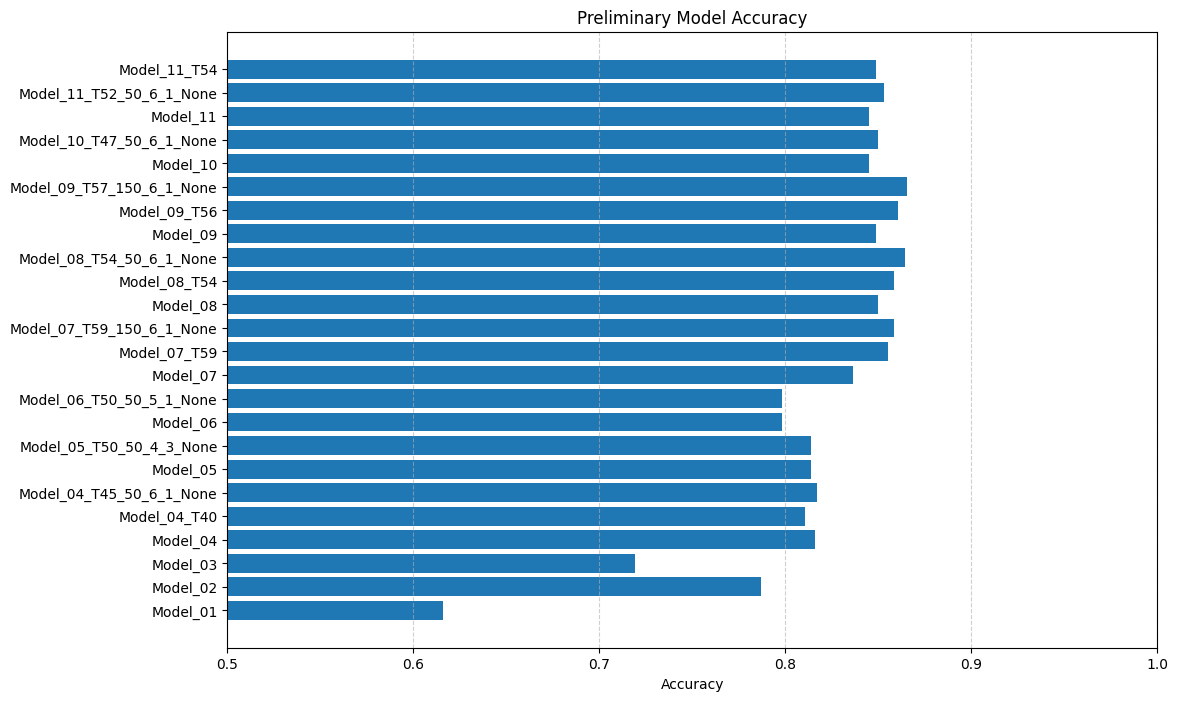

In [197]:
# Run each model variant against the train_data and update main score card with preliminary scores

for model_name, row in model_variants.iterrows():
    threshold = row['threshold']
    features = row['features']
    hyperparams = (row['n_estimators'], row['max_depth'], row['min_samples_leaf'], row['max_leaf_nodes']) # Create tuple
    
    probs_table = get_random_forest_probs_hyper(features, train_data, train_data, hyperparams) # Test against train_data
    predictions_column = f"Thresh_{threshold}"
    predictions_table = get_survival_for_threshold (probs_table, threshold) 
    score_card[model_name] = predictions_table[predictions_column] # Grab the predictions column
    model_scores[model_name] = check_score(model_name, score_card) # Recalculate model score
    
# Sort the dictionary
model_scores = dict(sorted(model_scores.items())) # Sort the dictionary by keys

# Plot the comparison of model scores
plot_model_scores(model_scores, "Preliminary Model Accuracy")

And let's again tabulate  the key performance metrics for all of the candidate models, then rank these by accuracy score.

In [198]:
######## Calculate extended performance metrics ########

# List model names
model_names = model_variants.index.tolist()

# Location of model predictions
model_predictions = score_card
    
# Generate metrics using our expanded function
for model_name in model_names:
    performance_metrics = get_performance_metrics(model_name, get_error_matrix(model_name, model_predictions))
    
    # Append the returned performance metrics for each iteration to the main dictionary
    candidate_model_performance_metrics_dict.update(performance_metrics)
    
# Create dataframe from the main dictionary (wipe out original version)
candidate_model_performance_metrics = pd.DataFrame.from_dict(candidate_model_performance_metrics_dict, orient='index')

# Select required columns for metrics table
selected_columns = ['Accuracy', 'Prevalence','Sensitivity', 'Specificity', 'Precision', 'Recall', 'F1_Score'] 

# Rank table by accuracy
candidate_models_metrics_summary = candidate_model_performance_metrics[selected_columns]
candidate_models_metrics_summary = candidate_models_metrics_summary.sort_values(by='Accuracy', ascending=False)

# View table
candidate_models_metrics_summary

,Accuracy,Prevalence,Sensitivity,Specificity,Precision,Recall,F1_Score
Model_09_T57_150_6_1_None,0.865320,0.383838,0.733918,0.947177,0.896429,0.733918,0.807074
Model_08_T54_50_6_1_None,0.864198,0.383838,0.736842,0.943534,0.890459,0.736842,0.806400
Model_09_T56,0.860831,0.383838,0.725146,0.945355,0.892086,0.725146,0.800000
Model_08_T54,0.858586,0.383838,0.736842,0.934426,0.875000,0.736842,0.800000
Model_07_T59_150_6_1_None,0.858586,0.383838,0.722222,0.943534,0.888489,0.722222,0.796774
Model_07_T59,0.855219,0.383838,0.716374,0.941712,0.884477,0.716374,0.791599
Model_11_T52_50_6_1_None,0.852974,0.383838,0.733918,0.927140,0.862543,0.733918,0.793049
Model_10_T47_50_6_1_None,0.849607,0.383838,0.739766,0.918033,0.848993,0.739766,0.790625
Model_08,0.849607,0.383838,0.742690,0.916211,0.846667,0.742690,0.791277
Model_09,0.848485,0.383838,0.748538,0.910747,0.839344,0.748538,0.791345


Now let's proceed to run our new model variants against the test data set and submit the survival predictions to Kaggle to get the public scores.

First we need to modify another of our functions to allow for the passing of hyperparameters. Just as previously, we will use a renamed copy of the original function and adjust accordingly.

In [199]:
# Prepare predictions submission file for a model
# Also allows some hyperparameters to be passed to the function

def prep_prediction_submission_hyper(model_name, features_input, train_data_input, test_data_input, threshold_input, hyperparams_input):
    
    # Calculate probabilities using existing function
    probs_table = get_random_forest_probs_hyper(features_input, train_data_input, test_data_input, hyperparams_input)

    # Calculate model predictions for the input threshold value (percentage)
    predictions = get_survival_for_threshold (probs_table, threshold_input)
    
    # Grab predictions column
    predictions_column = f"Thresh_{threshold}"

    # Prepare submission file
    output = predictions[['PassengerId', predictions_column]].rename(columns={predictions_column: 'Survived'})

    # Save the predicted data to a csv file ready for submission
    output_file_name = f"submission_{model_name.lower()}.csv"
    output.to_csv(output_file_name, index=False)
    print(f"Your {output_file_name} file was successfully saved!")
    
    return output

In [200]:
# Generate survival predictions for our new model variants against the *test* data set

for model_name, row in model_variants.iterrows():
    threshold = row['threshold']
    features = row['features']
    hyperparams = (row['n_estimators'], row['max_depth'], row['min_samples_leaf'], row['max_leaf_nodes']) # Create tuple
    prep_prediction_submission_hyper(model_name, features, train_data, test_data, threshold, hyperparams) # Call function to prepare submission file

Your submission_model_09_t57_150_6_1_none.csv file was successfully saved!
Your submission_model_08_t54_50_6_1_none.csv file was successfully saved!
Your submission_model_07_t59_150_6_1_none.csv file was successfully saved!
Your submission_model_11_t52_50_6_1_none.csv file was successfully saved!
Your submission_model_10_t47_50_6_1_none.csv file was successfully saved!
Your submission_model_04_t45_50_6_1_none.csv file was successfully saved!
Your submission_model_05_t50_50_4_3_none.csv file was successfully saved!
Your submission_model_06_t50_50_5_1_none.csv file was successfully saved!


# Final Public Scores

So, after submission of each of these files, here are the public scores.

                           Accuracy
Model_01                    0.62200
Model_02                    0.76555
Model_03                    0.71052
Model_04                    0.77511
Model_04_T40                0.75358
Model_04_T45_50_6_1_None    0.77033
Model_05                    0.77511
Model_05_T50_50_4_3_None    0.77511
Model_06                    0.74880
Model_06_T50_50_5_1_None    0.74880
Model_07                    0.77990
Model_07_T59                0.78468
Model_07_T59_150_6_1_None   0.77511
Model_08                    0.77033
Model_08_T54                0.77272
Model_08_T54_50_6_1_None    0.77511
Model_09                    0.77751
Model_09_T56                0.78468
Model_09_T57_150_6_1_None   0.78229
Model_10                    0.76794
Model_10_T47_50_6_1_None    0.76794
Model_11                    0.76794
Model_11_T52_50_6_1_None    0.76794
Model_11_T54                0.76794


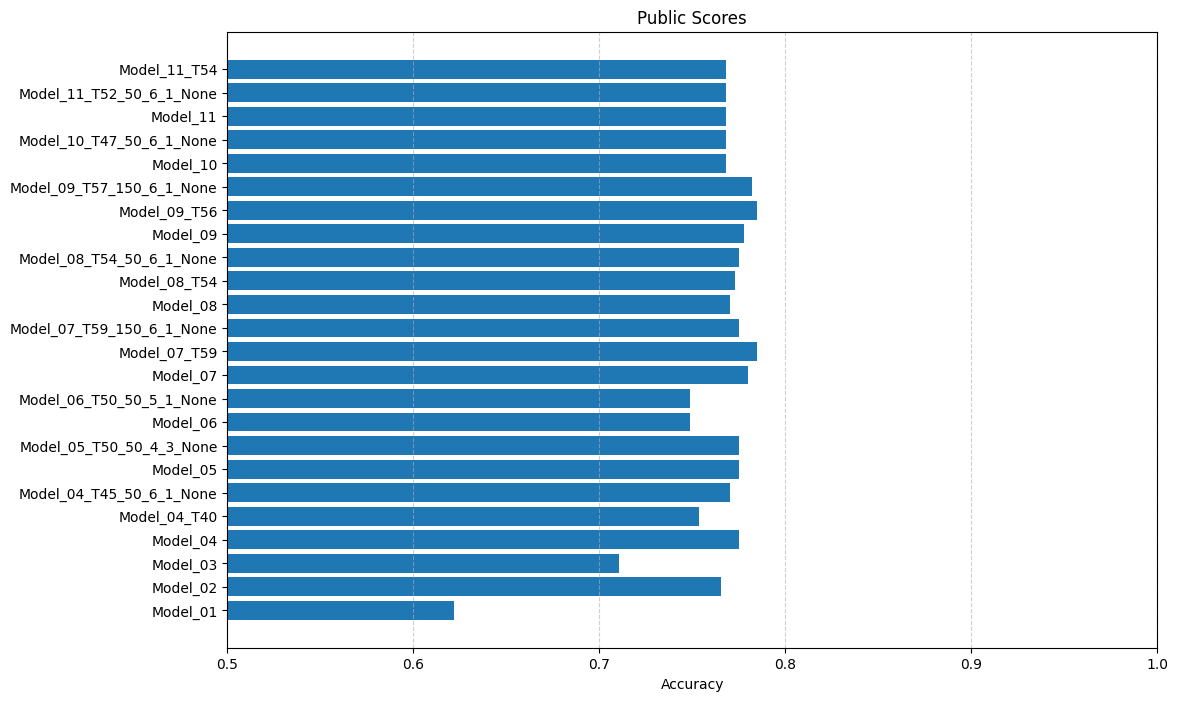

In [201]:
# Add public scores to dictionary

public_scores["Model_04_T45_50_6_1_None"] = 0.77033
public_scores["Model_05_T50_50_4_3_None"] = 0.77511
public_scores["Model_06_T50_50_5_1_None"] = 0.74880
public_scores["Model_07_T59_150_6_1_None"] = 0.77511       
public_scores["Model_08_T54_50_6_1_None"] = 0.77511   
public_scores["Model_09_T57_150_6_1_None"] = 0.78229       
public_scores["Model_10_T47_50_6_1_None"] = 0.76794       
public_scores["Model_11_T52_50_6_1_None"] = 0.76794      

# Sort the dictionary
public_scores = dict(sorted(public_scores.items())) # Sort the dictionary by keys

# Plot the public scores using our predefined function
plot_model_scores(public_scores, "Public Scores")

Well. Taking a quick glance at the public scores plot, nothing much has changed. There was no dramatic improvement with any of our new model variants!

In fact, if we look at the public scores for the variants 'Model_07_T59_150_6_1_None' and 'Model_09_T57_150_6_1_None', both of which were configured with 150 trees and a max_depth of 6, we actually observe a *decrease* in performance from their counterparts that only used 100 trees and a max_depth of 5. This is symptomatic of overfitting the model variants on the training data set.

As for the other variants that were configured with just 50 trees, most of these resulted in exactly the same performance as the original versions. In other words, at least there was no loss in performance. This was true for the variants of Model 05, Model 06, Model 10 and Model 11. However, the Model 04 variant saw a decrease in its public score against the original parent model. Only the new Model 08 variant succeeded in squeezing out some extra performance compared with its predecessors.

So, let's look at the final public score rankings.

In [202]:
# Rank public scores
rank_public_scores = pd.DataFrame({'Public': public_scores}).sort_values(by='Public', ascending=False)

# View table
rank_public_scores

,Public
Model_07_T59,0.78468
Model_09_T56,0.78468
Model_09_T57_150_6_1_None,0.78229
Model_07,0.77990
Model_09,0.77751
Model_05_T50_50_4_3_None,0.77511
Model_08_T54_50_6_1_None,0.77511
Model_07_T59_150_6_1_None,0.77511
Model_05,0.77511
Model_04,0.77511


So, our joint winners ended up being 'Model_07_T59' and 'Model_09_T56' with a score of 0.78468. Arguably, however, we might consider that Model 09 achieved a 'moral victory' in that it only needed to consider a total of 5 features for its classification versus the 9 features used by Model 07.

Anyway, at this stage, we shall leave arguments and any further detailed analysis of the final results for another day. It's now time to wrap this all up. So let's close out this notebook exercise with a summary of our key thoughts and findings.

# Wrap Up

Well, that turned out to be rather an epic adventure! But, I must say, a thoroughly enjoyable one. Definitely I learned a whole bunch of stuff, and managed to gain a greater appreciation of some of the various tools and techniques that may be used for machine learning analysis. Sure, my focus was soley on the use of random forest classification as an ML model, but there were plenty of things to discover from this type of model alone.

Now, as I close out this notebook, I wish to avoid becoming repetitive with a lot of the details. Instead, I'll just brain dump some of my thoughts from a higher-level perspective. Here are the key points:

- **Data Exploration and Clean-up:** This is a vital first step on the road to develop any sort of reliable classification model. With the benefit of hindsight, I should have spent more time working on this. For example, I did notice some anomalies in the provided data set (such as the family of 11 people travelling in 3rd class who seemingly all paid a fare of 69.55 each for a ticket). However, for the most part, I chose *not* to make any sort of classification corrections, mainly in the interests of time and effort (aka 'laziness'?).

- **Feature Selection and Importance:** Again, an essential area for developing a more robust model. Here, I really only touched the surface in my analysis. Undoubtedly, feature selection and the relative importance of one feature versus another relies on there being a cleaned-up data set in the first place. Otherwise we end up with spurious inter-relationships and poorer predictions as a consequence. Also, there are more sophisticated tools available (such as libraries like SHAP) to perform this kind of analysis, yet I opted not to explore these.

- **Performance Metrics:** It proved useful to first run some 'simple' (trivial) models against the data to get some baseline scores. The purpose here was to gauge how well our more sophisticated models would perform in comparison. In fact, it turns out that the performance one of these simple models (Model 2) actually was not far behind one of our initial random forest models (Model 4) in the earlier part of our analysis. However, this illustrates the problem with using 'accuracy' as a measurement. As David Spiegelhalter observes in his [book](https://books.google.co.uk/books/about/The_Art_of_Statistics.html?id=O7ULvgEACAAJ&redir_esc=y) (page 175), "[t]he high accuracy of the naive rule 'All females survive, all males do not', which either beats or is close behind more complex algorithms, demonstatres the inadequacy of crude 'accuracy' as a measure of performance". This issue is also highlighted in the book [Practical Statistics for Data Scientists](https://www.google.co.uk/books/edition/Practical_Statistics_for_Data_Scientists/k2XcDwAAQBAJ?hl=en&gbpv=0), where the authors conclude that "[a]ccuracy (the percent of preicted classifications that are correct) is but a first step in evaluating a model" (page 229). Here they suggest that "[o]ther metrics (recall, specificity, precision) focus on more specific performance characteristics (eg, recall measures how good a model is at correctly identifying 1s)". It was for this very reason that I took the opportunity to explore other, more meaningful, metrics that focused on the 'balance' and 'quality' of the model predictions. By building up my understanding of these by working through examples from the ground up, this proved to be very instructive, and should serve me well for future projects.

- **ROC Curves:** The switch to thinking about the models as being founded on 'probabilities' and 'cut-off thresholds' was, for me, a key moment in the analysis. A 'golden nugget, if you will. Again, by working from scratch, I used these concepts to manually build both ROC curves and their PRC (precision-recall) counterparts, thus gaining a better 'feel' and understanding of what they had to offer in terms of characterising model performance. Admittedly, afterwards I did get a bit carried away with with my analysis of these curves and their associated performance metrics, mainly because I found them all so fascinating!

- **Model Optimisation:** Having explored the world of performance metrics and ROC curves, the focus then returned to improving model 'accuracy' (after all, 'thems the rules' for this competition!). And thinking about it now, this is where I began to get 'stuck in the weeds'. By attempting to optimse the models in order to squeeze out marginal gains in 'accuracy', I perhaps lost sight of the bigger picture. The only real achievement here was that I came to better appreciate what 'overfitting' means! So maybe I should have explored using a 'cross validation' technique here to help avoid this? Alternatively, and by taking a step back from the detail, it might have been more worthwhile at this stage to have revisited data quality and feature selection in my quest for a step-change in performance against the test data set? But, alas, all of that is for another time.


Right. That's about it from me! 

Overall, a very interesting learning exercise. Okay, I didn't manage to get my public score across the 0.80 mark. But, hey-ho, never mind. On the positive side, though, I certainly know a lot more now that when I started, so that's gotta be a good thing, right?

Thank you for watching!

Cheers,
Mike
